*** STEP 1: IMPORTING LIBRARIES ***  

In [197]:
# IMPORT ESSENTIAL LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_class_weight
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import LinearDiscriminantAnalysis as LDA, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import warnings


warnings.filterwarnings("ignore")


In [199]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Nadimul haque\Desktop\Final dissertation datasets\creditcard.csv")


In [201]:
df.head()

Time    V1    V2   V3    V4    V5    V6    V7    V8    V9  ...   V21   V22  \
0  0.00 -1.36 -0.07 2.54  1.38 -0.34  0.46  0.24  0.10  0.36  ... -0.02  0.28   
1  0.00  1.19  0.27 0.17  0.45  0.06 -0.08 -0.08  0.09 -0.26  ... -0.23 -0.64   
2  1.00 -1.36 -1.34 1.77  0.38 -0.50  1.80  0.79  0.25 -1.51  ...  0.25  0.77   
3  1.00 -0.97 -0.19 1.79 -0.86 -0.01  1.25  0.24  0.38 -1.39  ... -0.11  0.01   
4  2.00 -1.16  0.88 1.55  0.40 -0.41  0.10  0.59 -0.27  0.82  ... -0.01  0.80   

    V23   V24   V25   V26   V27   V28  Amount  Class  
0 -0.11  0.07  0.13 -0.19  0.13 -0.02  149.62      0  
1  0.10 -0.34  0.17  0.13 -0.01  0.01    2.69      0  
2  0.91 -0.69 -0.33 -0.14 -0.06 -0.06  378.66      0  
3 -0.19 -1.18  0.65 -0.22  0.06  0.06  123.50      0  
4 -0.14  0.14 -0.21  0.50  0.22  0.22   69.99      0  

[5 rows x 31 columns]

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [205]:
df.shape

(284807, 31)

In [207]:
# CHECK FOR DUPLICATE ROWS IN THE DATASET
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 1081


*** STEP 2: DATA PREPROCESSING ***

In [209]:
# CHECKING FOR MISSING VALUES
print("Checking for missing values in the dataset...\n")

# Count of missing (NULL) values in each column
print("Missing NULL values (using .isnull().sum()):")
print(df.isnull().sum())

print("-" * 80)

# Count of missing (N/A) values in each column
print("Missing N/A values (using .isna().sum()):")
print(df.isna().sum())

Checking for missing values in the dataset...

Missing NULL values (using .isnull().sum()):
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
--------------------------------------------------------------------------------
Missing N/A values (using .isna().sum()):
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [211]:
# Display the unique class categories in the 'Class' column
unique_classes = df['Class'].unique()
print("Unique class categories:", unique_classes)

# Count the number of records for each class
class_counts = df['Class'].value_counts()

# Display the count for each class
print("Number of records with Class 0 (non-fraud):", class_counts.get(0, 0))
print("Number of records with Class 1 (fraud):", class_counts.get(1, 0))

# Display percentage distribution
class_percentages = (class_counts / len(df)) * 100
print("\nClass distribution in percentages:")
print(class_percentages.round(2).astype(str) + ' %')


Unique class categories: [0 1]
Number of records with Class 0 (non-fraud): 284315
Number of records with Class 1 (fraud): 492

Class distribution in percentages:
Class
0    99.83 %
1     0.17 %
Name: count, dtype: object


In [213]:
summary = df.describe(include='all').T

summary['Data Type'] = df.dtypes
summary['Missing Values'] = df.isnull().sum()
summary['% Missing'] = (summary['Missing Values'] / len(df)) * 100
summary['Unique Values'] = df.nunique()
summary['% Unique'] = (summary['Unique Values'] / len(df)) * 100

summary = summary[[
    'Data Type', 'count', 'Unique Values', '% Unique',
    'Missing Values', '% Missing', 'mean', 'std', 'min', 'max'
]].round(2)

styled_summary = summary.style \
    .background_gradient(cmap='YlGnBu', subset=['% Missing', '% Unique']) \
    .bar(subset=['mean'], color='lightgreen') \
    .bar(subset=['max'], color='coral') \
    .bar(subset=['min'], color='skyblue') \
    .set_caption("Dataset Feature Summary") \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([
        {'selector': 'th', 'props': [('font-size', '12px'), ('text-align', 'center')]},
        {'selector': 'caption', 'props': [('caption-side', 'top'), ('font-size', '16px'), ('font-weight', 'bold')]}
    ])

styled_summary

*** STEP 3: EXPLORATORY DATA ANALYSIS ***

In [215]:
# For numerical columns, we'll fill missing values with the median of each column
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())

print(numerical_columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


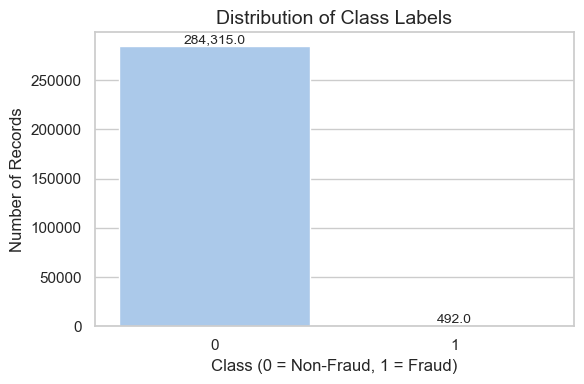

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Set figure size
plt.figure(figsize=(6, 4))

# Create the count plot
ax = sns.countplot(x='Class', data=df, palette='pastel')

# Add value annotations on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

# Set titles and labels
plt.title('Distribution of Class Labels', fontsize=14)
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

*** STEP 4:  FEATURE SELECTION ***

In [219]:
# Step 4 - Feature Selection based on correlation with the target variable

# Calculate correlation of all features with 'Class'
correlations = df.corr()['Class'].sort_values(ascending=False)

# Display top 30 features most correlated with 'Class'
top_30 = correlations[:30]
print("Top 30 features most correlated with the target variable 'Class':")
print(top_30)


Top 30 features most correlated with the target variable 'Class':
Class     1.00
V11       0.15
V4        0.13
V2        0.09
V21       0.04
V19       0.03
V20       0.02
V8        0.02
V27       0.02
V28       0.01
Amount    0.01
V26       0.00
V25       0.00
V22       0.00
V23      -0.00
V15      -0.00
V13      -0.00
V24      -0.01
Time     -0.01
V6       -0.04
V5       -0.09
V9       -0.10
V1       -0.10
V18      -0.11
V7       -0.19
V3       -0.19
V16      -0.20
V10      -0.22
V12      -0.26
V14      -0.30
Name: Class, dtype: float64


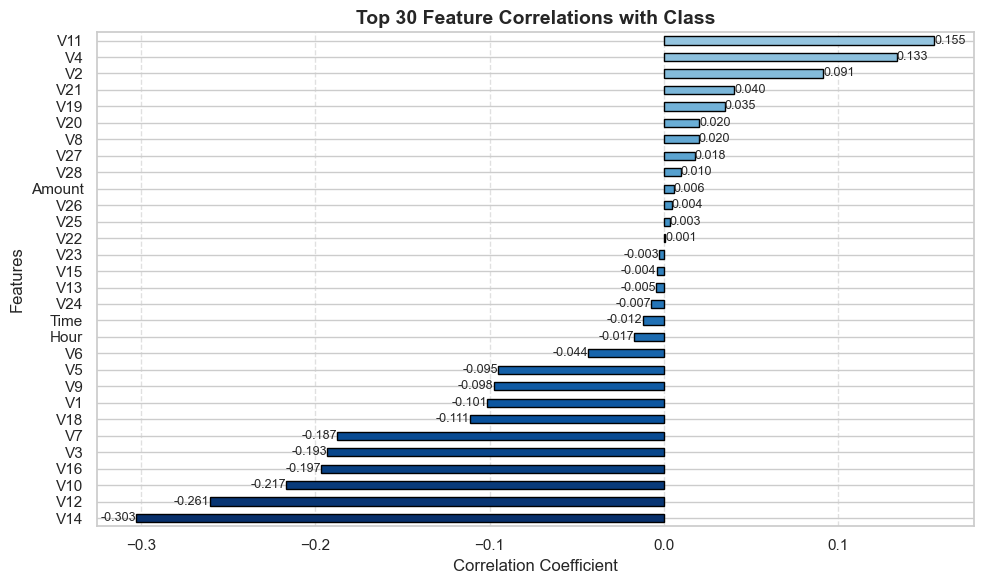

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Compute correlations with 'Class' and get top 30 (excluding 'Class')
correlations = df.corr(numeric_only=True)['Class'].sort_values(ascending=False)
top_30 = correlations.drop('Class').head(30)


plt.figure(figsize=(10, 6))


colors = plt.cm.Blues(np.linspace(0.4, 1, len(top_30)))

top_30.plot(kind='barh', color=colors, edgecolor='black')


plt.title('Top 30 Feature Correlations with Class', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)


for i, value in enumerate(top_30.values):
    plt.text(value, i, f'{value:.3f}', va='center',
             ha='left' if value > 0 else 'right', fontsize=9)

plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()


plt.savefig("top30_feature_correlations_enhanced.png", dpi=300)
plt.show()

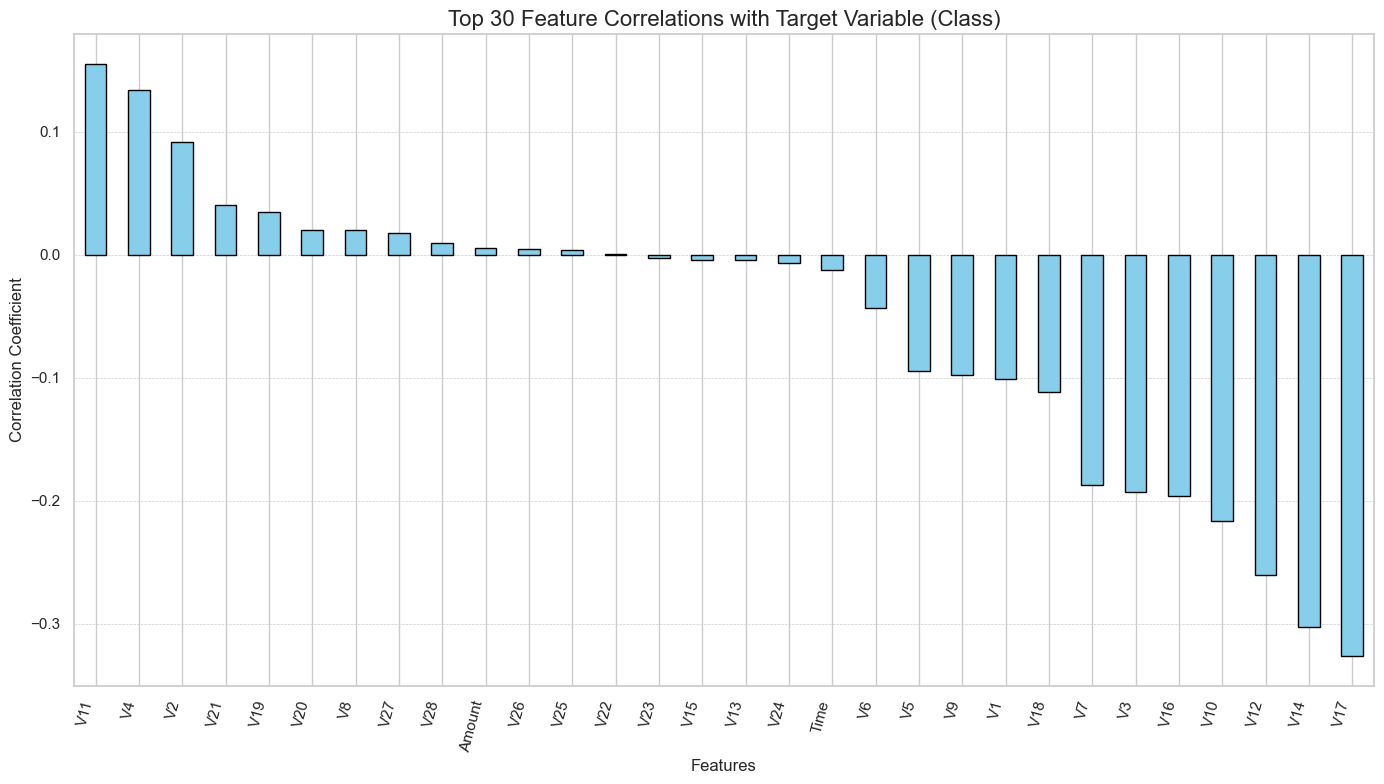

In [223]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Compute correlations with the target variable 'Class'
correlation_with_class = df.corr()['Class'].drop('Class').sort_values(ascending=False)

# Step 2: Select the top 30 features most correlated with 'Class'
top_30_features = correlation_with_class.head(30)

# Step 3: Plot the top 30 correlations
plt.figure(figsize=(14, 8))
top_30_features.plot(kind='bar', color='skyblue', edgecolor='black')

# Step 4: Customize the plot
plt.title('Top 30 Feature Correlations with Target Variable (Class)', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(rotation=75, ha='right')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Step 5: Show the plot
plt.show()

*** Some features show very little correlation with the target variable and will be removed in the following steps. Before that, we’ll take a closer look at how the features are correlated with each other. ***

'Time' → Outliers: 0


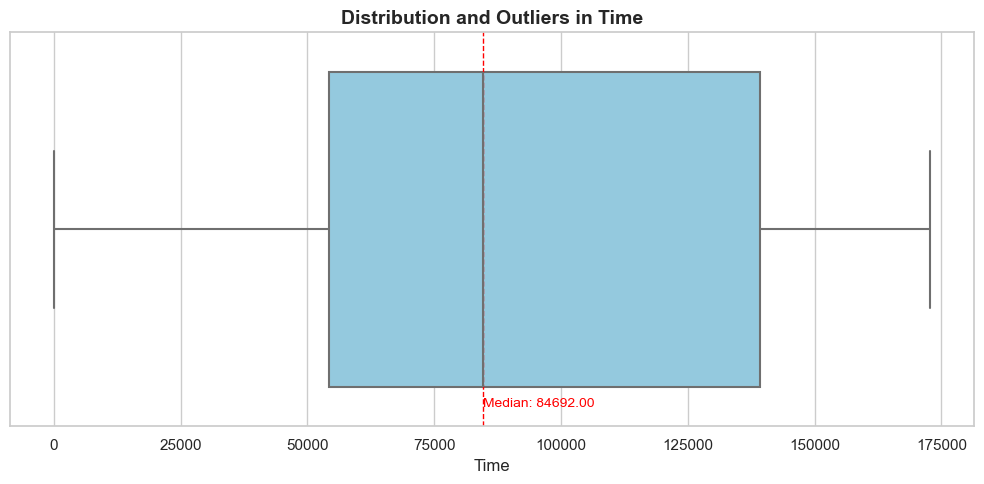

'V1' → Outliers: 7062


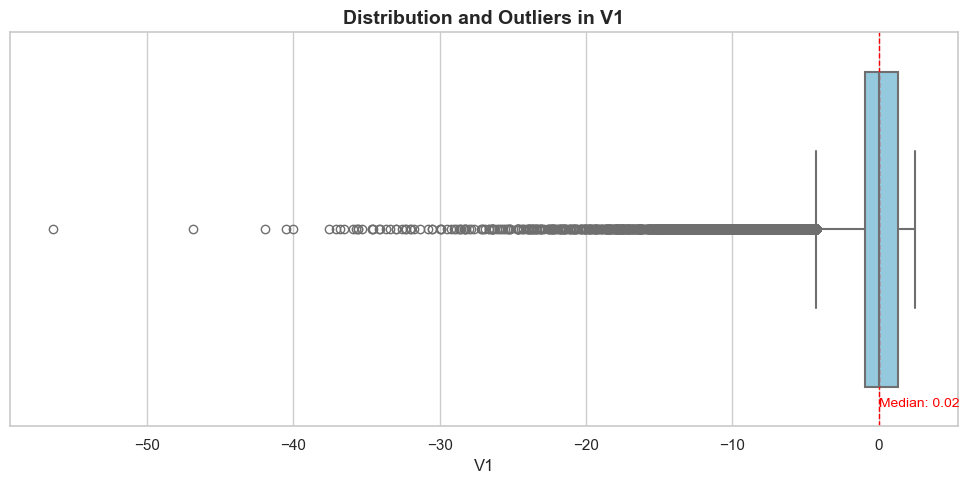

'V2' → Outliers: 13526


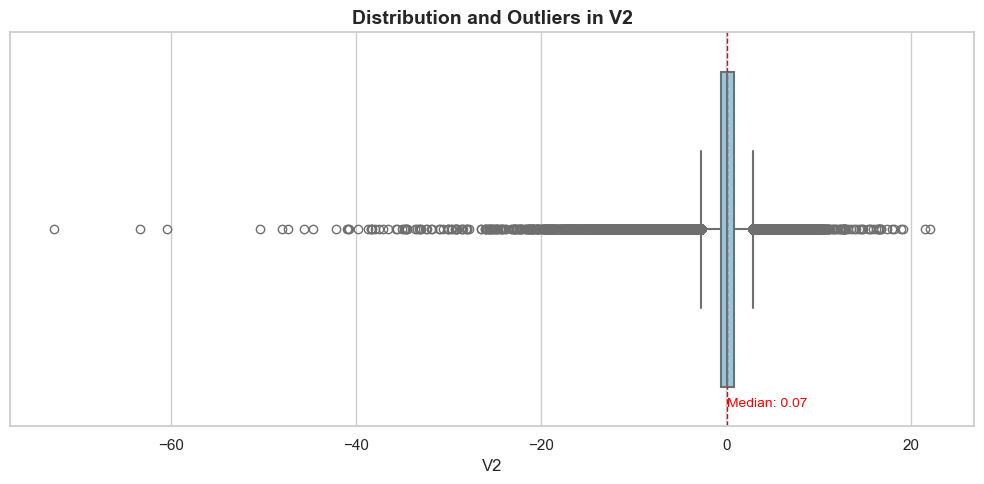

'V3' → Outliers: 3363


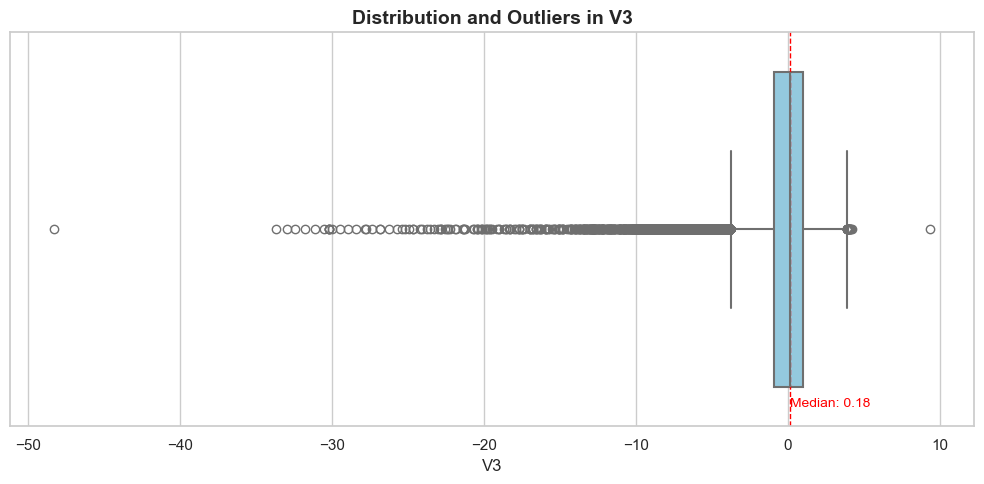

'V4' → Outliers: 11148


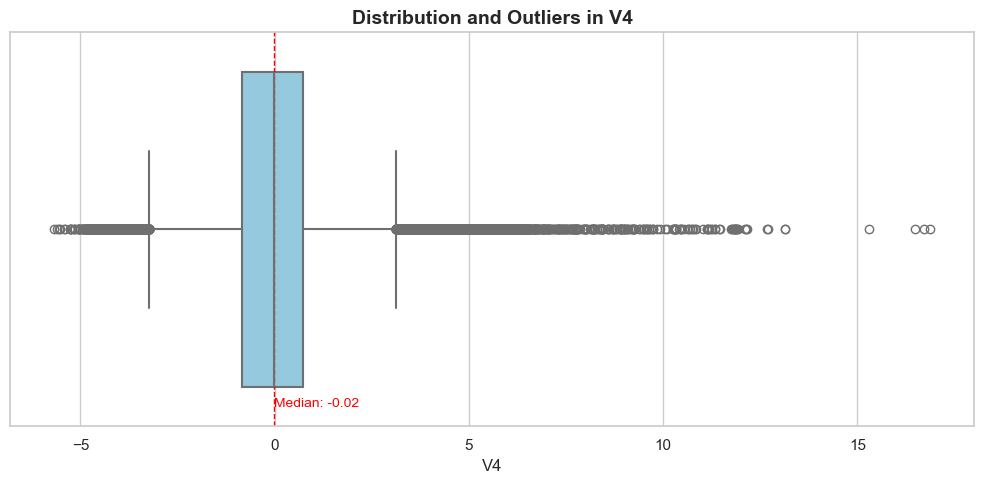

'V5' → Outliers: 12295


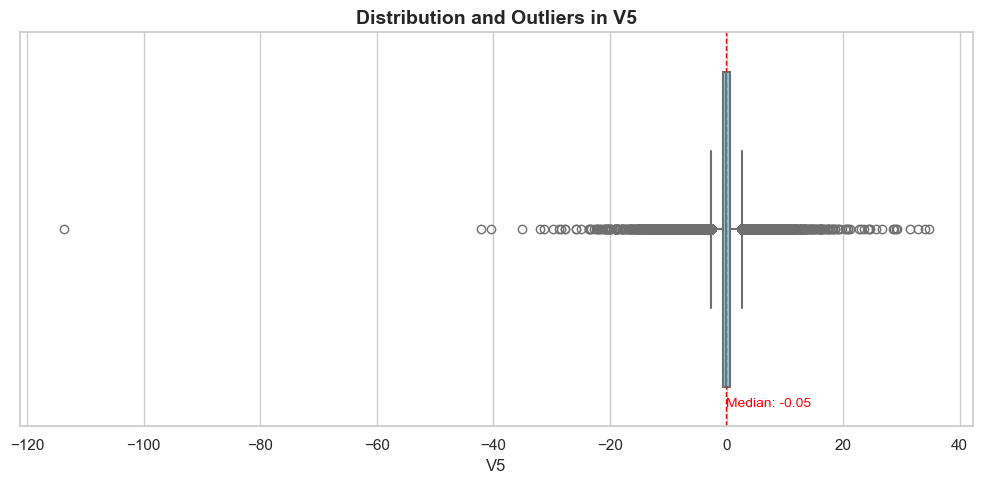

'V6' → Outliers: 22965


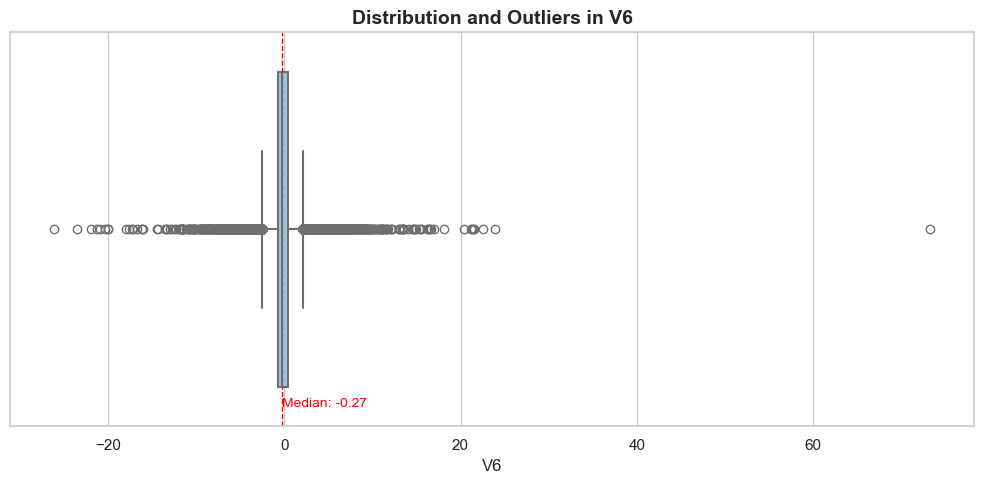

'V7' → Outliers: 8948


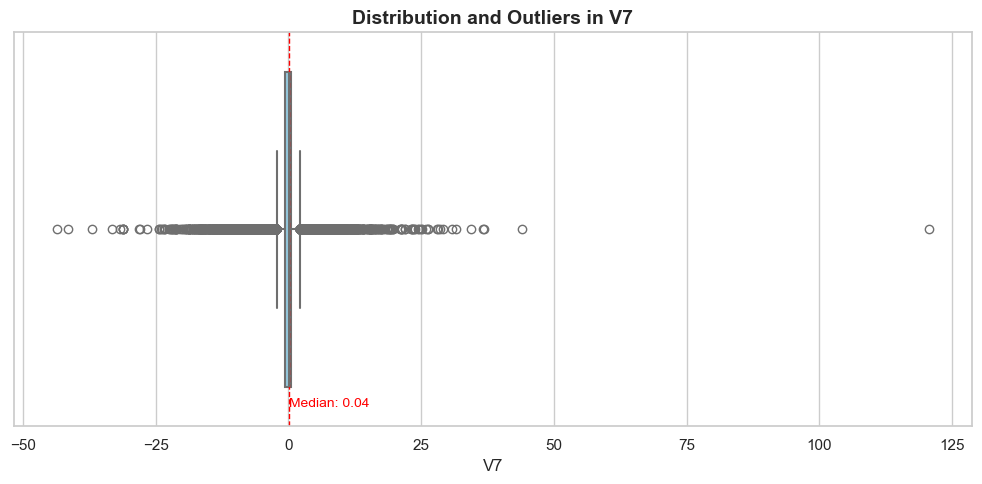

'V8' → Outliers: 24134


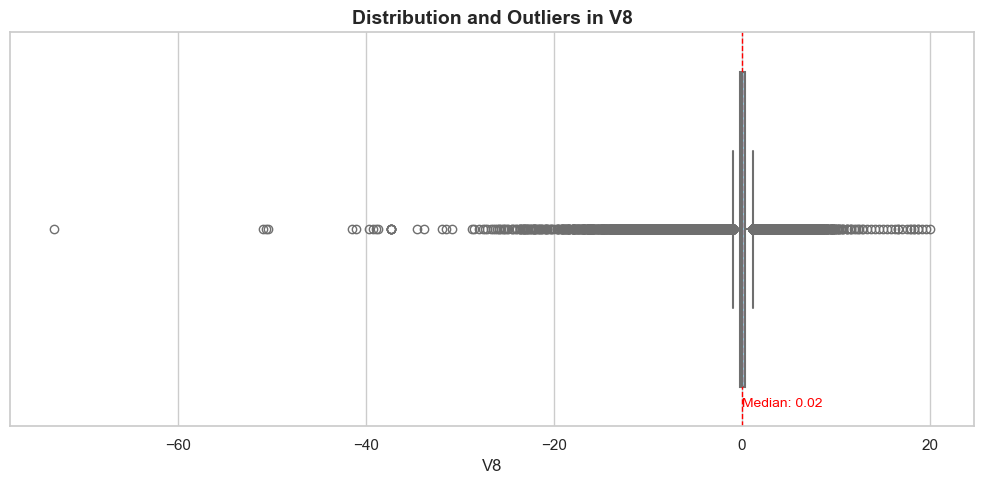

'V9' → Outliers: 8283


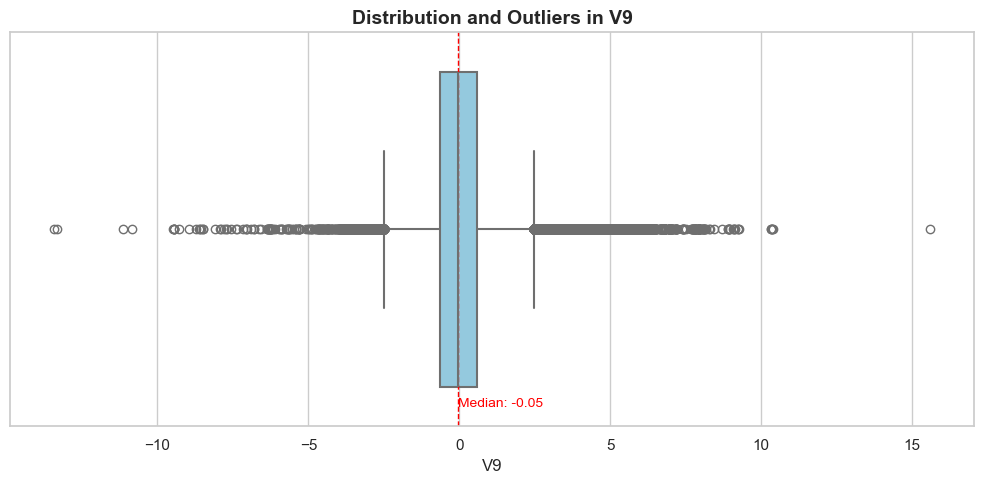

'V10' → Outliers: 9496


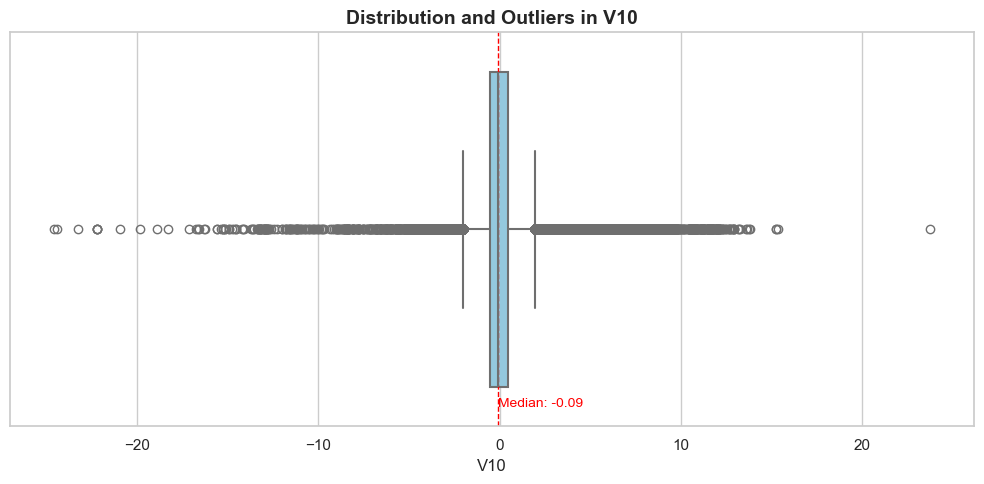

'V11' → Outliers: 780


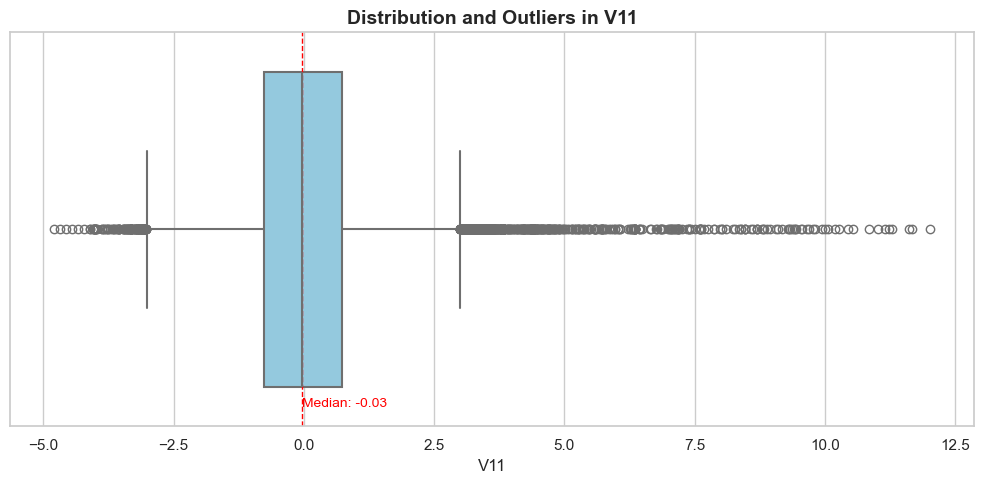

'V12' → Outliers: 15348


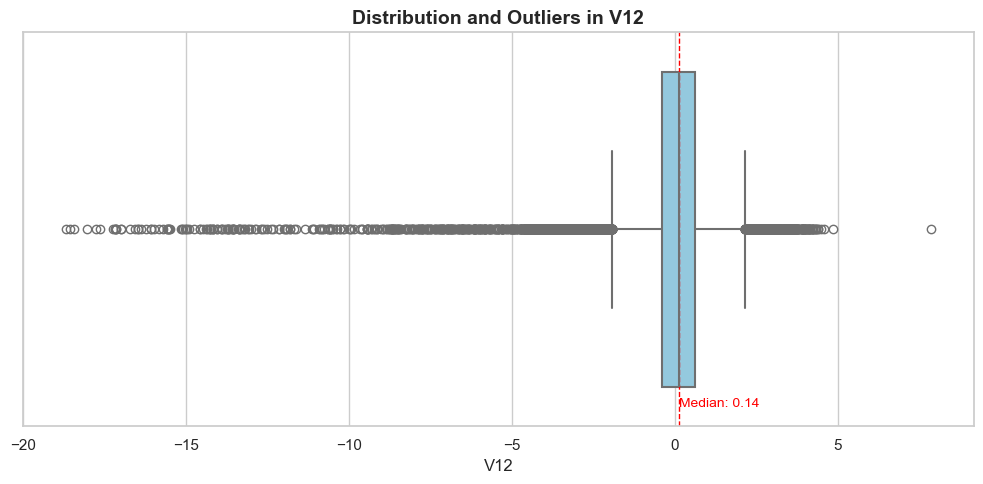

'V13' → Outliers: 3368


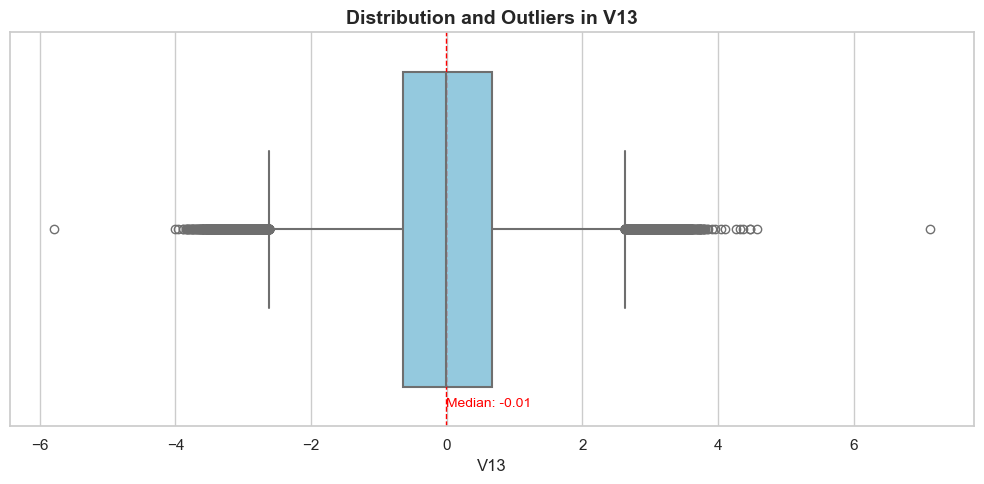

'V14' → Outliers: 14149


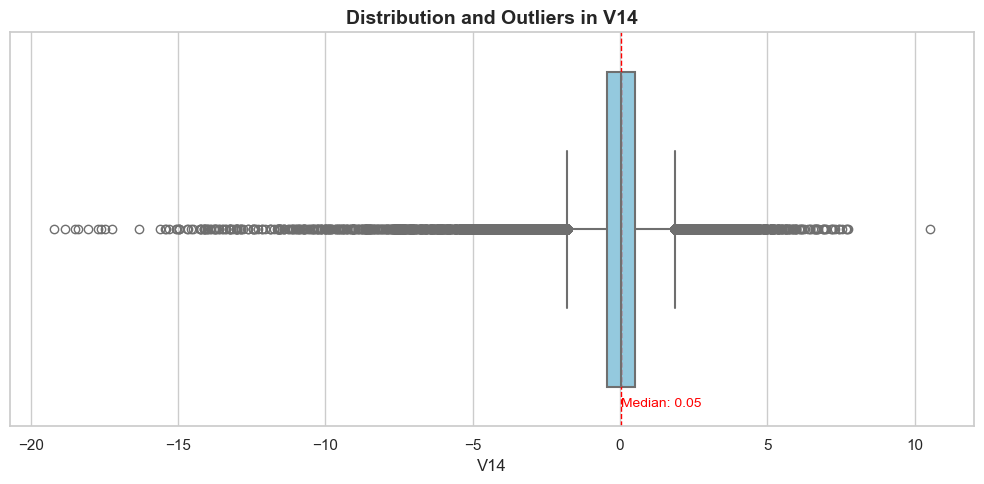

'V15' → Outliers: 2894


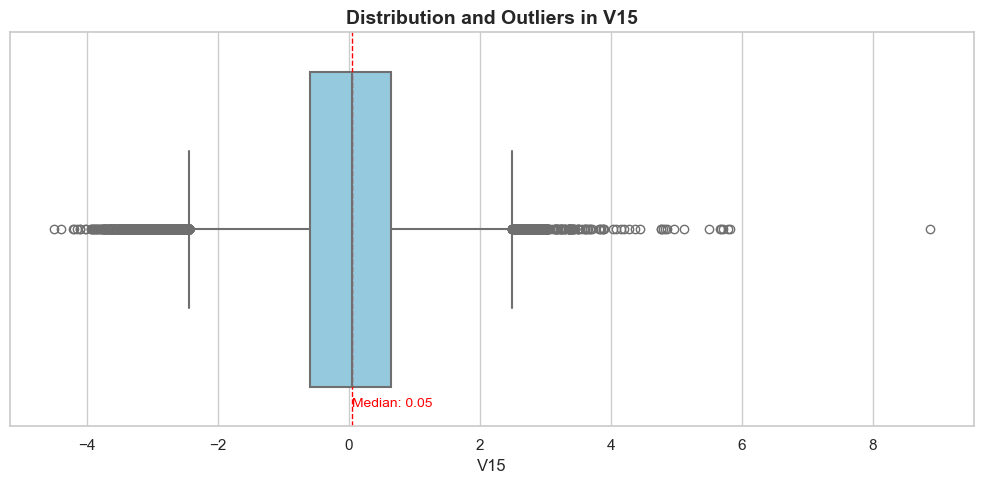

'V16' → Outliers: 8184


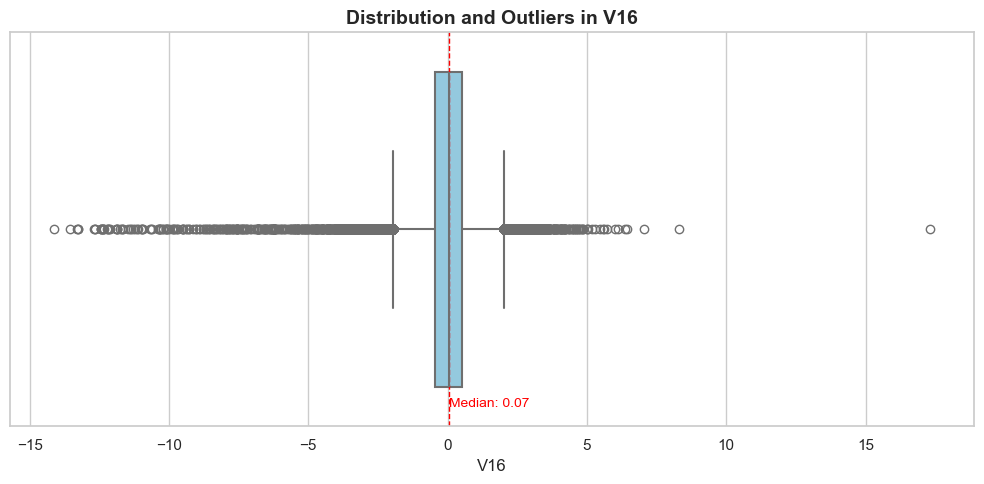

'V17' → Outliers: 7420


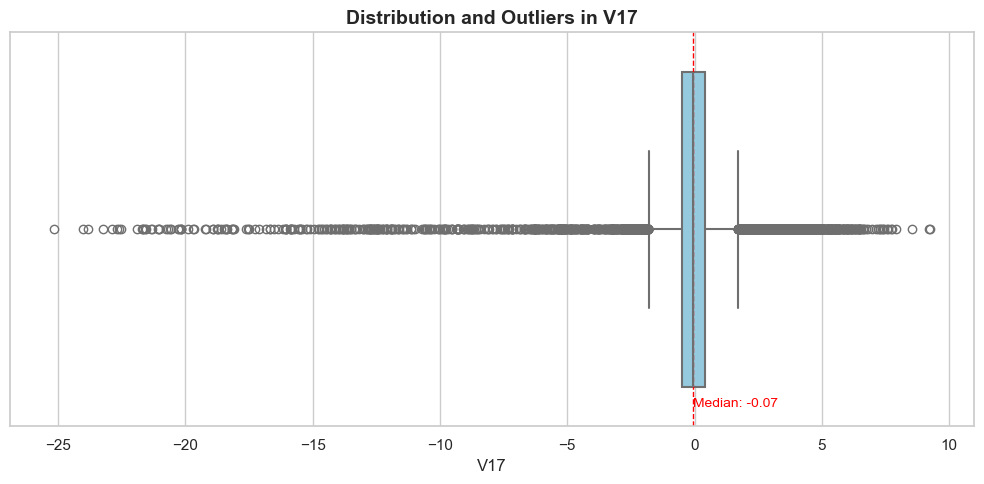

'V18' → Outliers: 7533


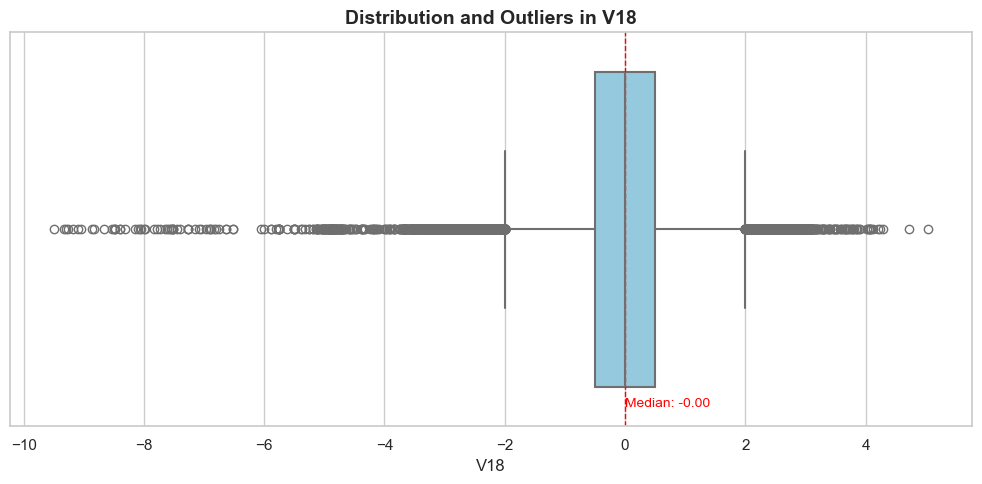

'V19' → Outliers: 10205


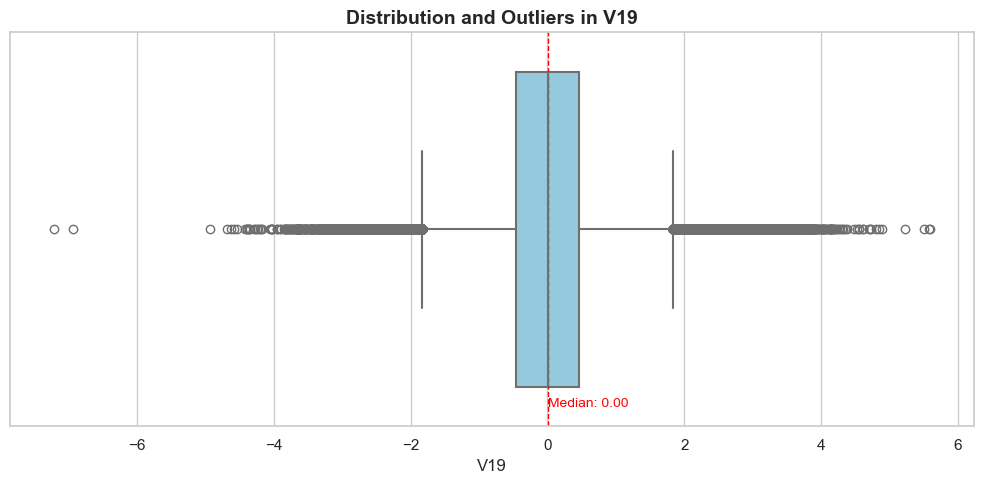

'V20' → Outliers: 27770


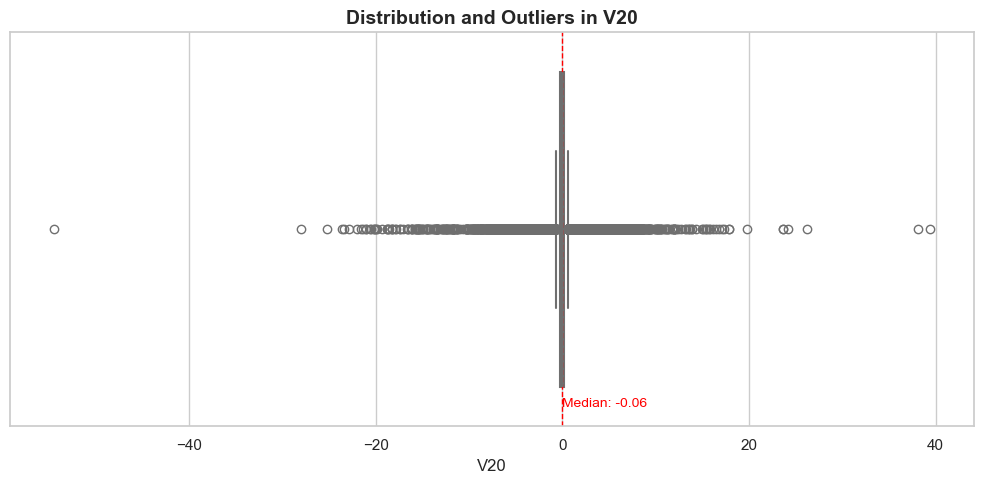

'V21' → Outliers: 14497


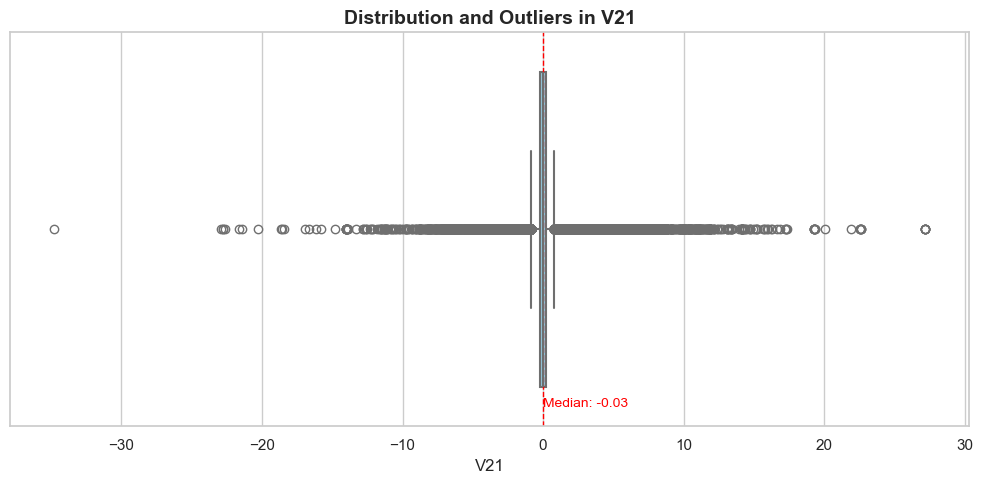

'V22' → Outliers: 1317


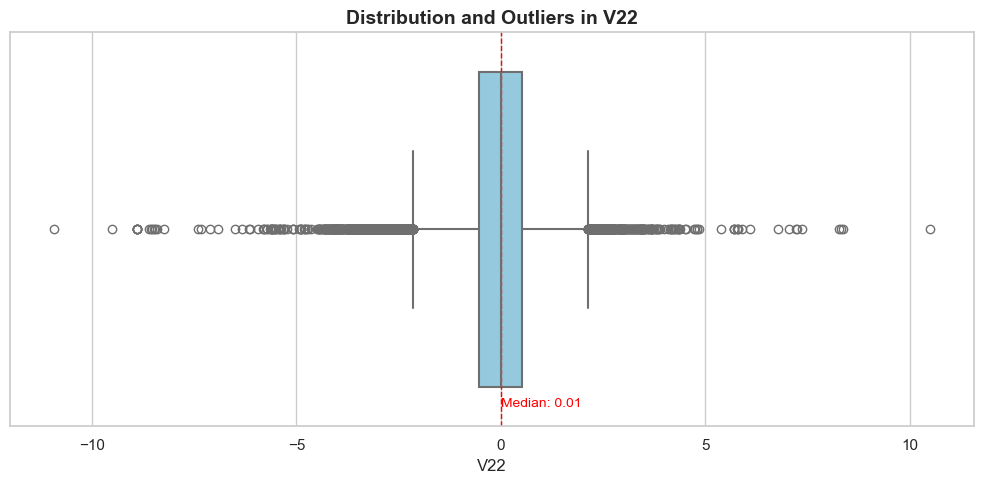

'V23' → Outliers: 18541


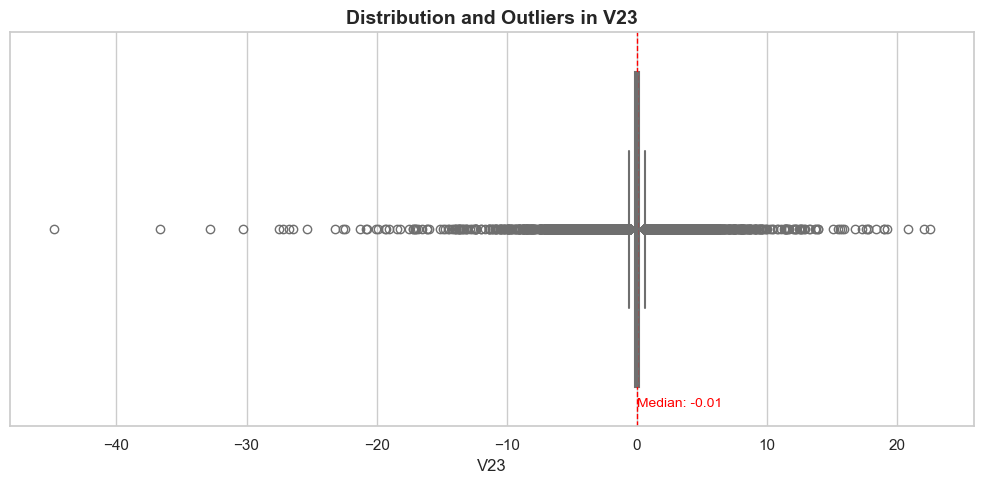

'V24' → Outliers: 4774


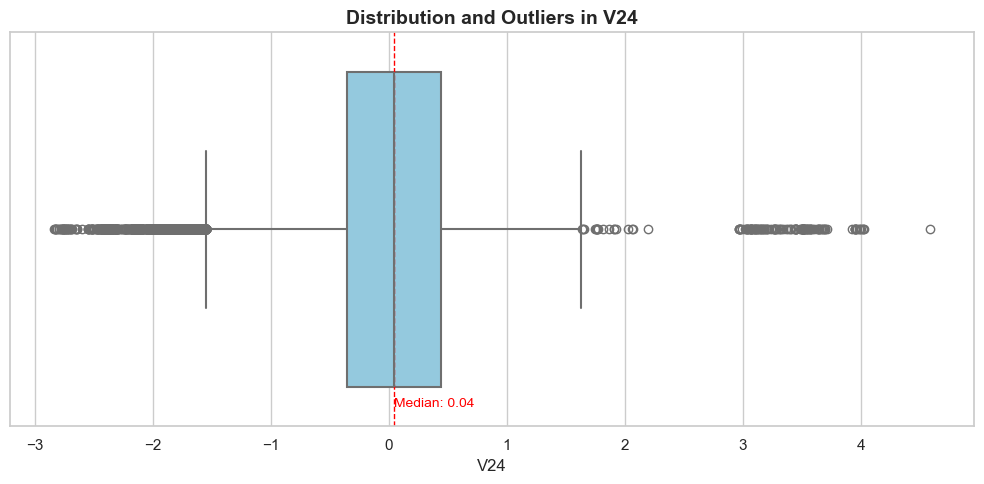

'V25' → Outliers: 5367


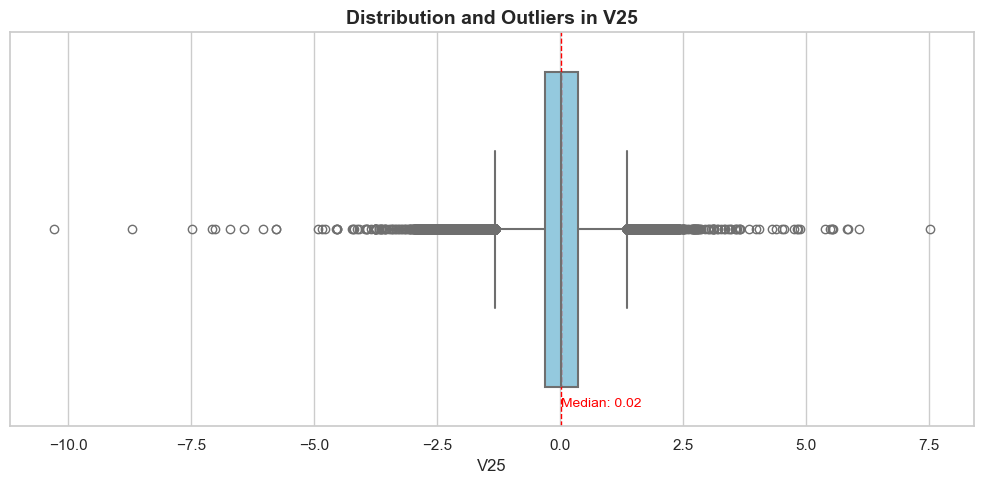

'V26' → Outliers: 5596


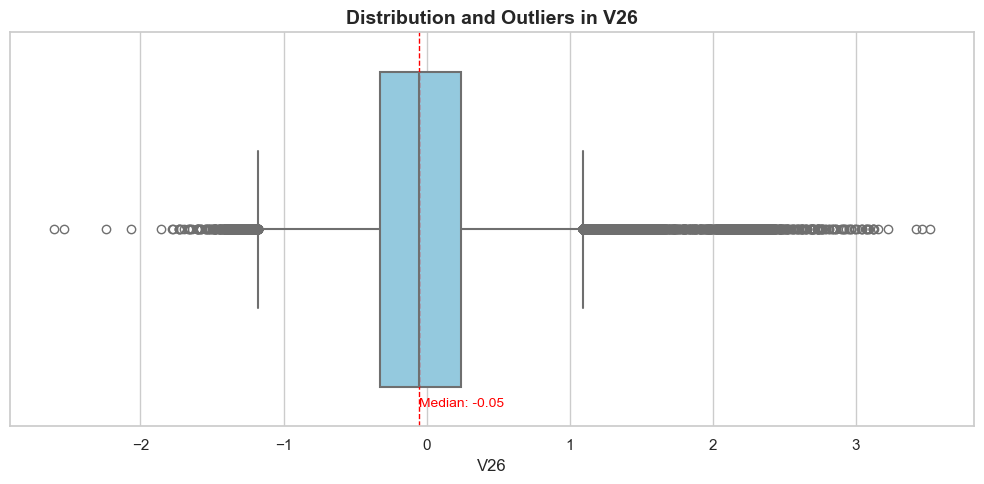

'V27' → Outliers: 39163


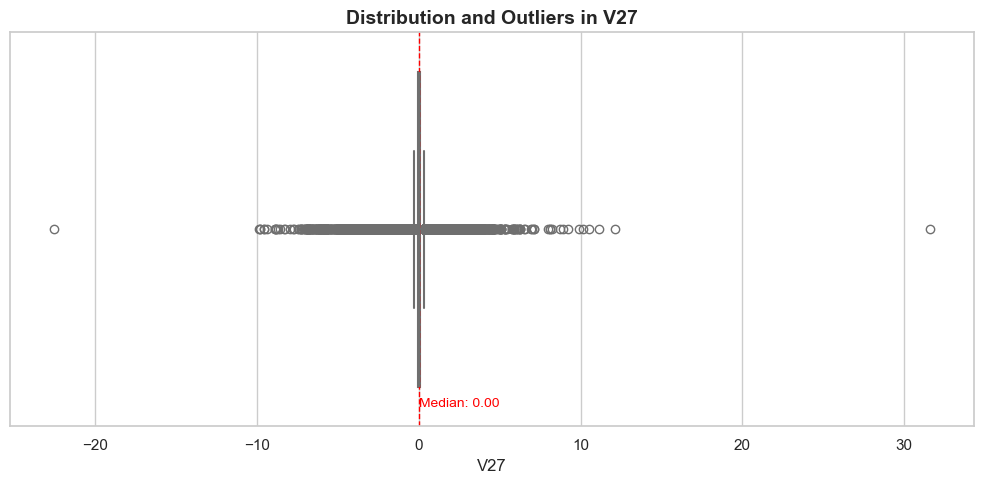

'V28' → Outliers: 30342


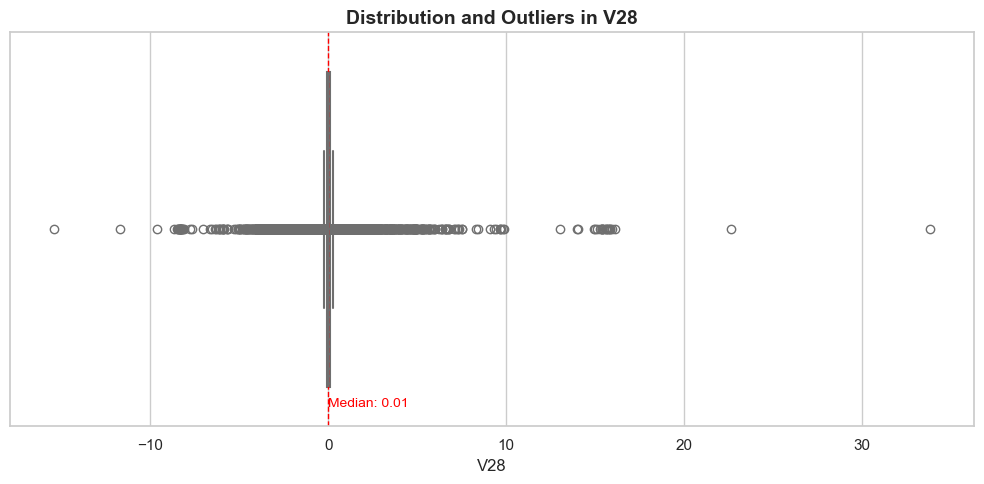

'Amount' → Outliers: 31904


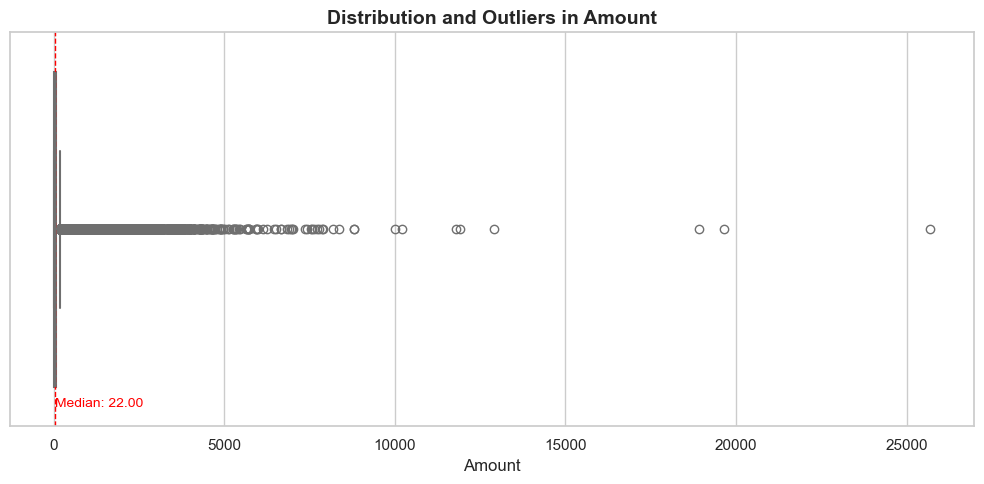

'Class' → Outliers: 492


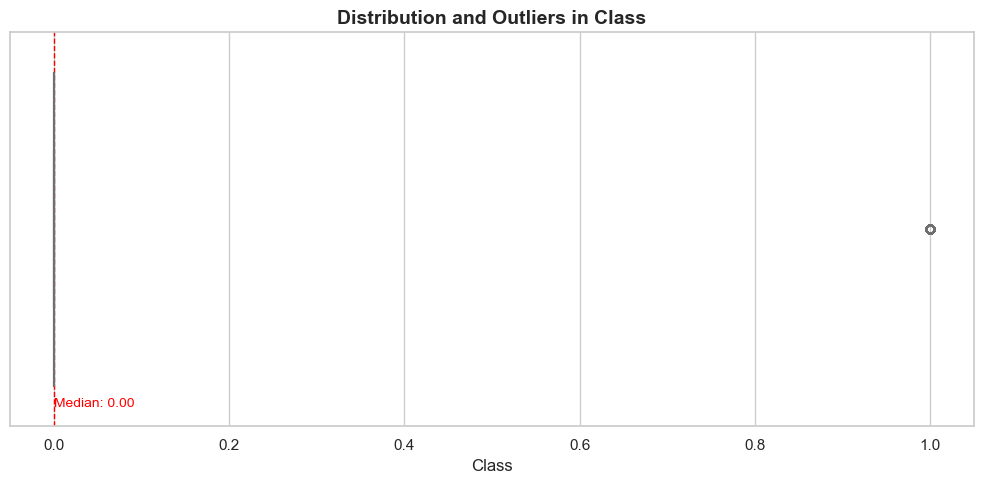

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")


for col in numerical_columns:
    
    if df[col].nunique() <= 1:
        print(f"Skipping '{col}' — only one unique value.")
        continue

    # Create the boxplot
    plt.figure(figsize=(10, 5))
    ax = sns.boxplot(x=df[col], color='skyblue', linewidth=1.5)

    # Add plot title and labels
    plt.title(f'Distribution and Outliers in {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)

    # Optional: Display median value
    median_val = df[col].median()
    plt.axvline(median_val, color='red', linestyle='--', linewidth=1)
    plt.text(median_val, 0.05, f'Median: {median_val:.2f}', color='red', fontsize=10, ha='left', transform=ax.get_xaxis_transform())

    # Optional: Count outliers and annotate
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    print(f"'{col}' → Outliers: {outlier_count}")

    # Layout adjustment
    plt.tight_layout()
    plt.show()

In [227]:
print(df.columns.tolist())


['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


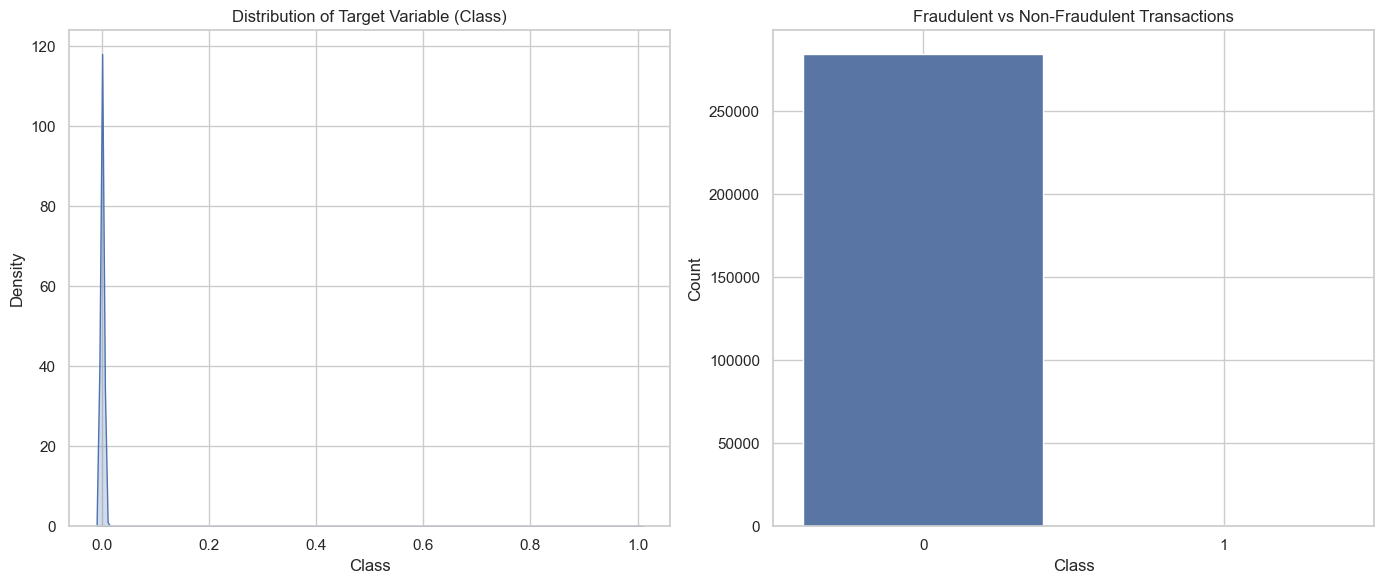

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for KDE and count plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# KDE plot for the 'Class' column
sns.kdeplot(df["Class"], fill=True, ax=axes[0])
axes[0].set_title('Distribution of Target Variable (Class)')
axes[0].set_xlabel('Class')
axes[0].grid(True)

# Count plot for the 'Class' column
sns.countplot(x='Class', data=df, ax=axes[1])
axes[1].set_title('Fraudulent vs Non-Fraudulent Transactions')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].grid(True)

# Final layout adjustment
plt.tight_layout()
plt.show()


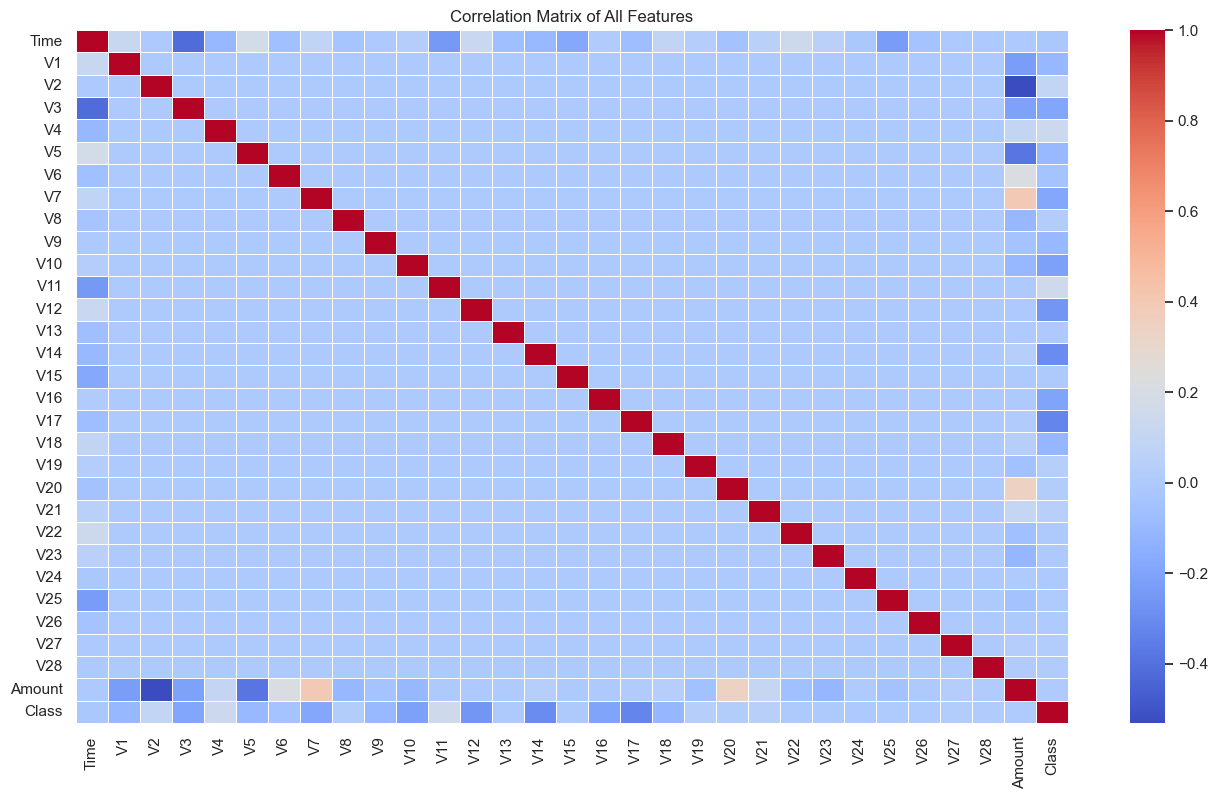

In [231]:
# Correlation heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Matrix of All Features')
plt.show()

In [233]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\Nadimul haque\Desktop\Final dissertation datasets\creditcard.csv")

# Preview
df.head()


Time    V1    V2   V3    V4    V5    V6    V7    V8    V9  ...   V21   V22  \
0  0.00 -1.36 -0.07 2.54  1.38 -0.34  0.46  0.24  0.10  0.36  ... -0.02  0.28   
1  0.00  1.19  0.27 0.17  0.45  0.06 -0.08 -0.08  0.09 -0.26  ... -0.23 -0.64   
2  1.00 -1.36 -1.34 1.77  0.38 -0.50  1.80  0.79  0.25 -1.51  ...  0.25  0.77   
3  1.00 -0.97 -0.19 1.79 -0.86 -0.01  1.25  0.24  0.38 -1.39  ... -0.11  0.01   
4  2.00 -1.16  0.88 1.55  0.40 -0.41  0.10  0.59 -0.27  0.82  ... -0.01  0.80   

    V23   V24   V25   V26   V27   V28  Amount  Class  
0 -0.11  0.07  0.13 -0.19  0.13 -0.02  149.62      0  
1  0.10 -0.34  0.17  0.13 -0.01  0.01    2.69      0  
2  0.91 -0.69 -0.33 -0.14 -0.06 -0.06  378.66      0  
3 -0.19 -1.18  0.65 -0.22  0.06  0.06  123.50      0  
4 -0.14  0.14 -0.21  0.50  0.22  0.22   69.99      0  

[5 rows x 31 columns]

In [235]:
# Step 1: Calculate correlation of all features with 'Class'
correlations = df.corr()['Class']

# Step 2: Create a copy of the DataFrame
df2 = df.copy()

# Step 3: Drop columns weakly correlated with 'Class'
for col in df.columns:
    if col != 'Class' and abs(correlations[col]) < 0.13:
        df2.drop(columns=[col], inplace=True)

# Step 4: Output remaining columns
print("Remaining columns after filtering by correlation:")
print(df2.columns.tolist())

Remaining columns after filtering by correlation:
['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'Class']


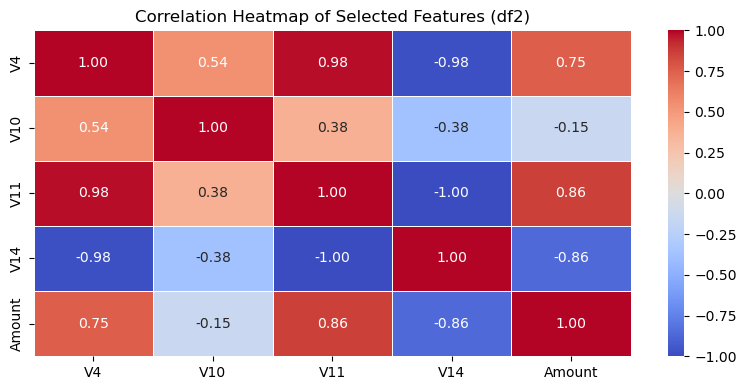

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set smaller figure size
plt.figure(figsize=(8, 4))  

# Generate the heatmap from your df2 DataFrame
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title
plt.title("Correlation Heatmap of Selected Features (df2)", fontsize=12)
plt.tight_layout()


plt.savefig("correlation_heatmap_small.png", dpi=300)
plt.show()


In [237]:
# Display the first 10 rows of the DataFrame df2
df2.head(10)


V3    V4    V7   V10   V11   V12   V14   V16   V17  Class
0  2.54  1.38  0.24  0.09 -0.55 -0.62 -0.31 -0.47  0.21      0
1  0.17  0.45 -0.08 -0.17  1.61  1.07 -0.14  0.46 -0.11      0
2  1.77  0.38  0.79  0.21  0.62  0.07 -0.17 -2.89  1.11      0
3  1.79 -0.86  0.24 -0.05 -0.23  0.18 -0.29 -1.06 -0.68      0
4  1.55  0.40  0.59  0.75 -0.82  0.54 -1.12 -0.45 -0.24      0
5  1.14 -0.17  0.48 -0.37  1.34  0.36 -0.14  0.40 -0.06      0
6  0.05  1.20 -0.01 -0.10 -1.42 -0.15  0.17 -0.44  0.00      0
7  1.07 -0.49  1.12  1.25 -0.62  0.29 -1.32 -0.08 -1.22      0
8 -0.11 -0.27  0.37 -0.41 -0.71 -0.11  0.07 -0.21 -0.50      0
9  1.04 -0.22  0.65 -0.37  1.02  0.84 -0.44  0.74 -0.54      0

In [239]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V3      284807 non-null  float64
 1   V4      284807 non-null  float64
 2   V7      284807 non-null  float64
 3   V10     284807 non-null  float64
 4   V11     284807 non-null  float64
 5   V12     284807 non-null  float64
 6   V14     284807 non-null  float64
 7   V16     284807 non-null  float64
 8   V17     284807 non-null  float64
 9   Class   284807 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 21.7 MB


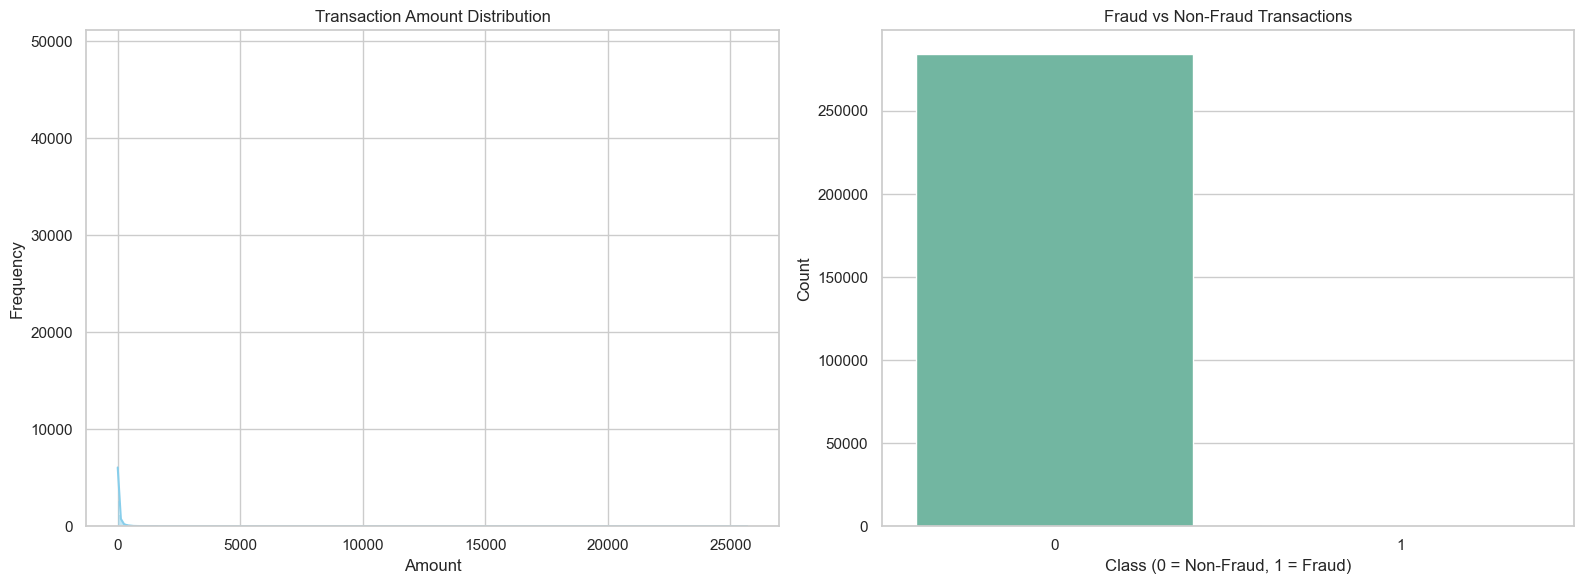

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Histogram of 'Amount'
sns.histplot(df['Amount'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Transaction Amount Distribution')
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Frequency')

# Plot 2: Count plot of 'Class' (0 = Not Fraud, 1 = Fraud)
sns.countplot(x='Class', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Fraud vs Non-Fraud Transactions')
axes[1].set_xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
axes[1].set_ylabel('Count')

# Layout adjustment
plt.tight_layout()

# Show plots
plt.show()

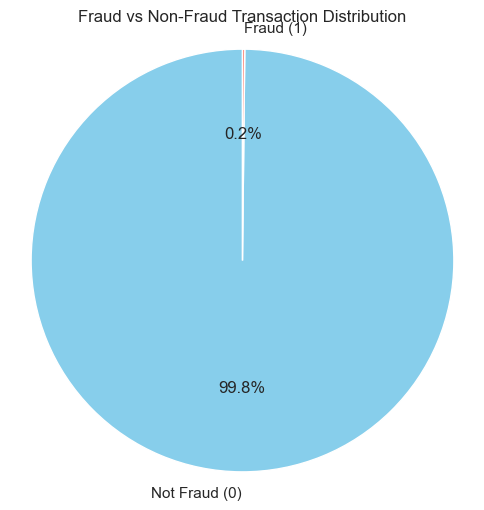

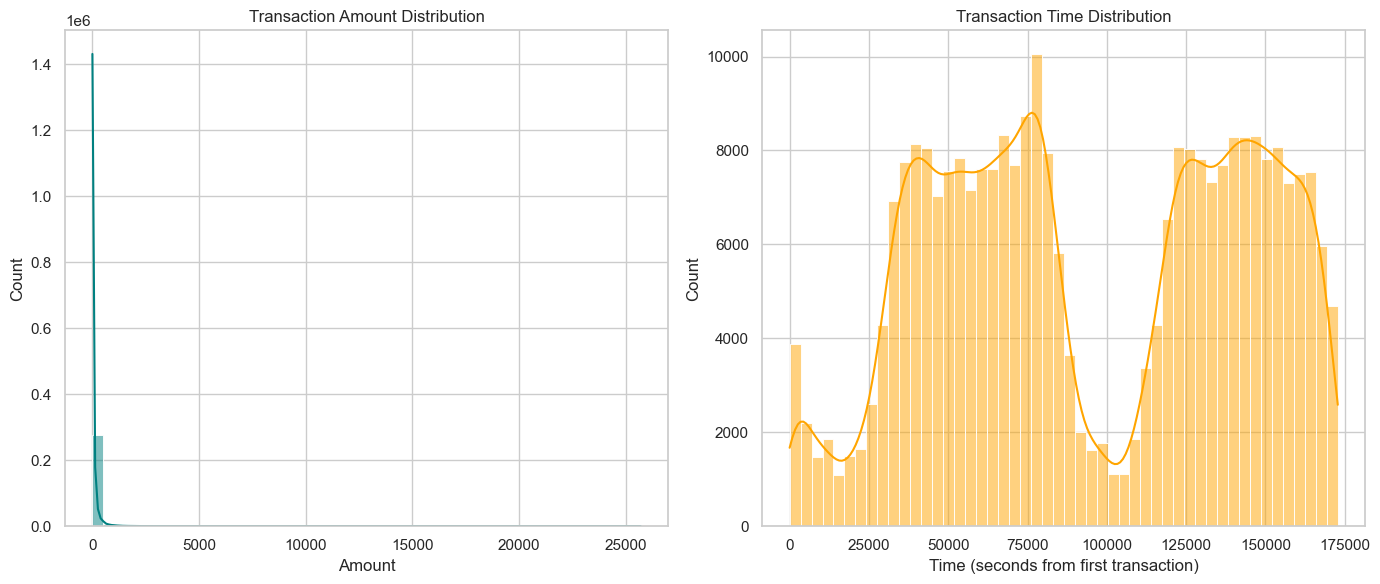

In [243]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot 1: Pie chart for class distribution
plt.figure(figsize=(6, 6))
class_counts = df['Class'].value_counts()
plt.pie(class_counts, labels=['Not Fraud (0)', 'Fraud (1)'],
        autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Fraud vs Non-Fraud Transaction Distribution')
plt.axis('equal')
plt.show()

# Plot 2: Histograms for Amount and Time
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram of 'Amount'
sns.histplot(df['Amount'], bins=50, kde=True, ax=axes[0], color='teal')
axes[0].set_title('Transaction Amount Distribution')
axes[0].set_xlabel('Amount')

# Histogram of 'Time'
sns.histplot(df['Time'], bins=50, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Transaction Time Distribution')
axes[1].set_xlabel('Time (seconds from first transaction)')

plt.tight_layout()
plt.show()


In [245]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical columns with less than 20 unique values
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if df[col].nunique() < 20]

# If no object (categorical) columns exist, just show a message
if len(categorical_cols) == 0:
    print("No categorical columns with fewer than 20 unique values found.")
else:
    # Define subplot grid
    num_cols = 3
    num_rows = (len(categorical_cols) + num_cols - 1) // num_cols  

    plt.figure(figsize=(15, 5 * num_rows))

    for i, col in enumerate(categorical_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.countplot(data=df, x=col, hue='Class')  
        plt.title(f'Fraud by {col}')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    # Print fraud rate by category
    print("Fraud Rate by Categories:")
    for col in categorical_cols:
        print(f"\n{col} Analysis:")
        print((df.groupby(col)['Class'].mean() * 100).round(2))


No categorical columns with fewer than 20 unique values found.


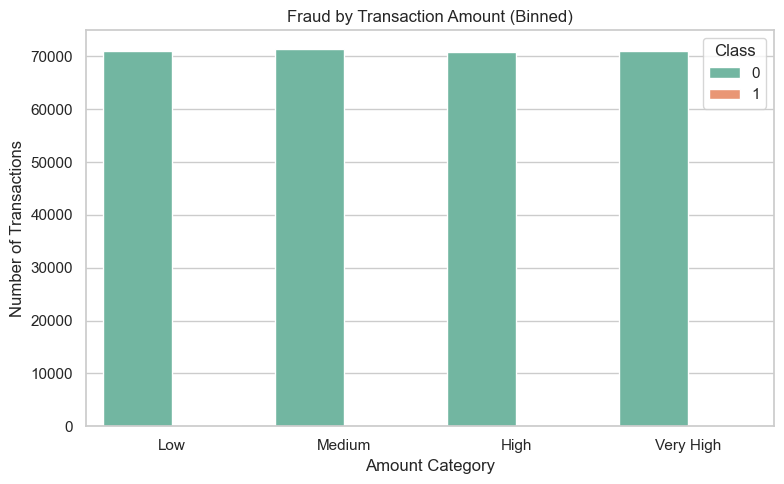

Fraud Rate by Amount Bin:
Amount_Bin
Low         0.31
Medium      0.07
High        0.07
Very High   0.24
Name: Class, dtype: float64


In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bin the 'Amount' column into 4 categories: Low, Medium, High, Very High
df['Amount_Bin'] = pd.qcut(df['Amount'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Plot fraud counts by amount bin
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Amount_Bin', hue='Class', palette='Set2')
plt.title('Fraud by Transaction Amount (Binned)')
plt.xlabel('Amount Category')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

# Print the fraud rate (%) for each bin
print("Fraud Rate by Amount Bin:")
print((df.groupby('Amount_Bin')['Class'].mean() * 100).round(2))

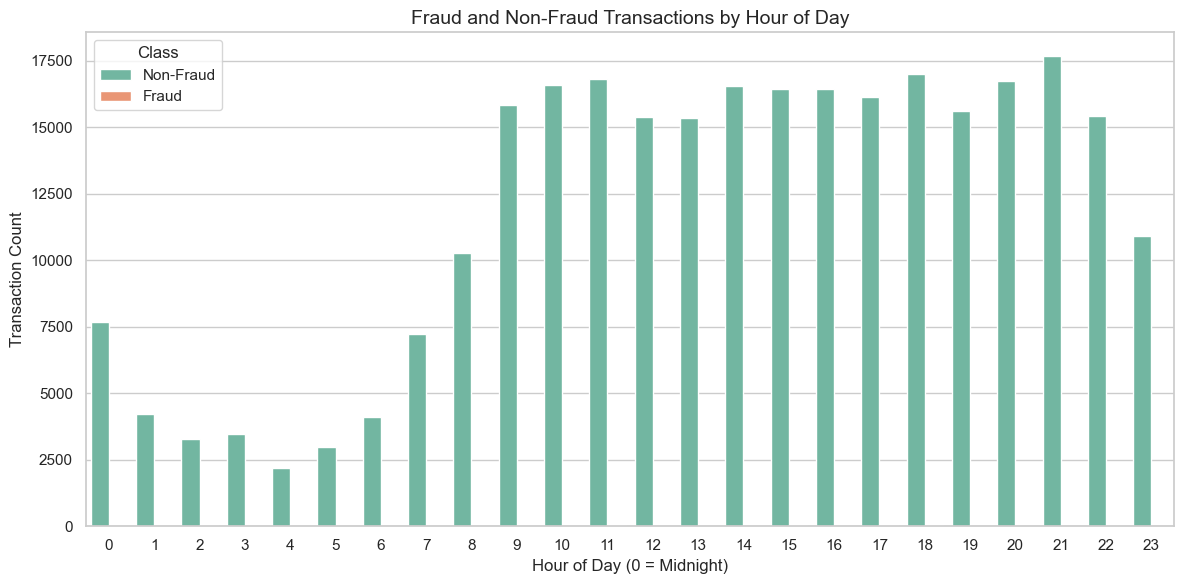

Fraud Rate by Hour of Day (%):
Hour
0     0.08
1     0.24
2     1.71
3     0.49
4     1.04
5     0.37
6     0.22
7     0.32
8     0.09
9     0.10
10    0.05
11    0.31
12    0.11
13    0.11
14    0.14
15    0.16
16    0.13
17    0.18
18    0.19
19    0.12
20    0.11
21    0.09
22    0.06
23    0.19
Name: Class, dtype: float64

 Saved high-resolution plot at: C:\Users\Nadimul haque\Desktop\Final dissertation datasets\Appendix_C3_TimeSeries_Fraud_vs_NonFraud.png


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load dataset
csv_path = r"C:\Users\Nadimul haque\Desktop\Final dissertation datasets\creditcard.csv"
df = pd.read_csv(csv_path)

# Create a new column for Hour of Day (0–23)
df['Hour'] = (df['Time'] // 3600).astype(int) % 24

# Save path
SAVE_PATH = r"C:\Users\Nadimul haque\Desktop\Final dissertation datasets\Appendix_C3_TimeSeries_Fraud_vs_NonFraud.png"
os.makedirs(os.path.dirname(SAVE_PATH), exist_ok=True)

# Plot: Number of transactions by hour with fraud overlay
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Hour', hue='Class', palette='Set2')
plt.title('Fraud and Non-Fraud Transactions by Hour of Day', fontsize=14)
plt.xlabel('Hour of Day (0 = Midnight)')
plt.ylabel('Transaction Count')
plt.xticks(range(24))
plt.legend(title='Class', labels=['Non-Fraud', 'Fraud'])
plt.tight_layout()

# Save and show
plt.savefig(SAVE_PATH, dpi=600, bbox_inches="tight")
plt.show()

# Calculate and print fraud rate per hour
fraud_rate_by_hour = (df.groupby('Hour')['Class'].mean() * 100).round(2)
print("Fraud Rate by Hour of Day (%):")
print(fraud_rate_by_hour)
print(f"\n Saved high-resolution plot at: {SAVE_PATH}")


Fraud Rate (%) by Day Type and Amount Bin:
Amount_Bin  Low  Medium  High  Very High
Day_Type                                
Weekday     0.3     0.1   0.1        0.2
Weekend     0.4     0.1   0.1        0.3


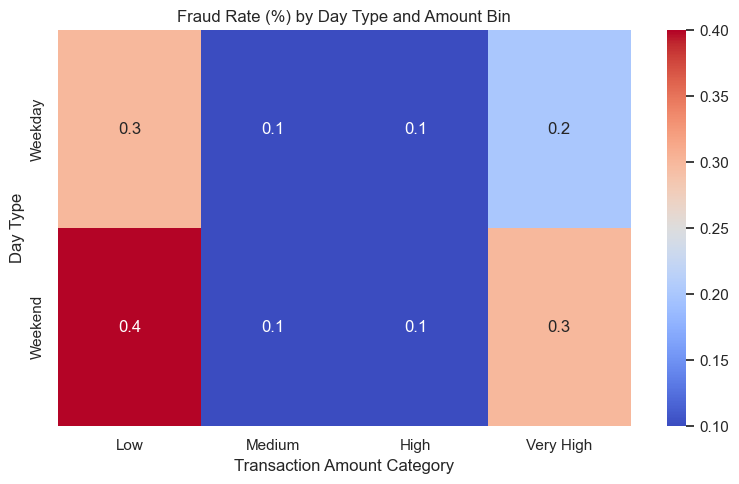

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Amount_Bin has a logical order
amount_order = ['Low', 'Medium', 'High', 'Very High']
df['Amount_Bin'] = pd.Categorical(df['Amount_Bin'], categories=amount_order, ordered=True)

# Ensure Day_Type order is Weekday first, then Weekend
day_type_order = ['Weekday', 'Weekend']
df['Day_Type'] = pd.Categorical(df['Day_Type'], categories=day_type_order, ordered=True)

# Group and calculate fraud rate (%), keeping current pandas behavior
fraud_rate_combo = (
    df.groupby(['Day_Type', 'Amount_Bin'], observed=False)['Class']
      .mean()
      .unstack()
      .round(3) * 100
)

print("Fraud Rate (%) by Day Type and Amount Bin:")
print(fraud_rate_combo)

# Heatmap for visual inspection
plt.figure(figsize=(8,5))
sns.heatmap(fraud_rate_combo, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Fraud Rate (%) by Day Type and Amount Bin")
plt.ylabel("Day Type")
plt.xlabel("Transaction Amount Category")
plt.tight_layout()
plt.show()

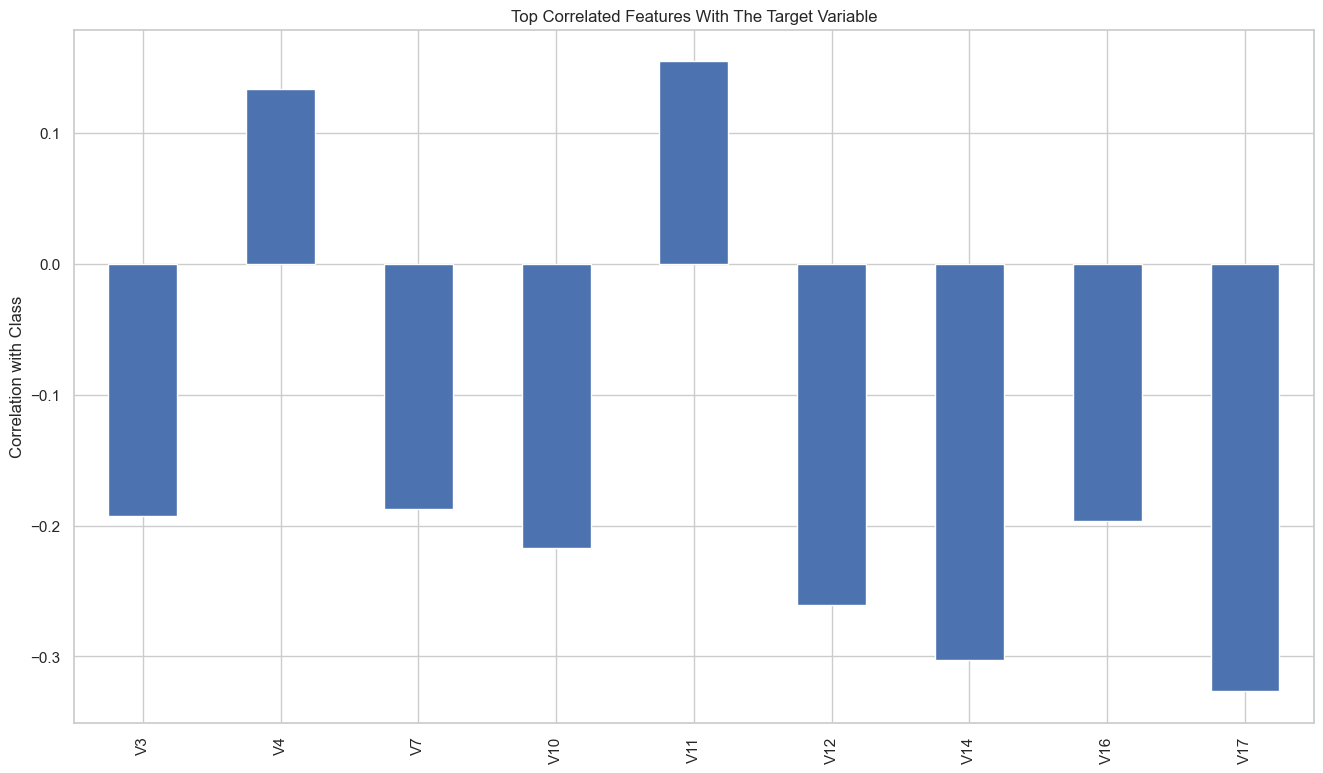

In [253]:
# Filter numeric columns only
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation values with 'Class'
corr_values = numeric_df.corr()['Class']

# Select features with absolute correlation >= 0.13
selected_columns = [col for col in corr_values.index if abs(corr_values[col]) >= 0.13]
df2 = numeric_df[selected_columns]

# Plot the top correlated features with the target variable
top_corr = df2.corr()['Class'][:9]
top_corr.plot.bar(figsize=(16, 9), title="Top Correlated Features With The Target Variable", grid=True)
plt.ylabel("Correlation with Class")
plt.show()

*** HANDLING DATA IMBALANCE ***  

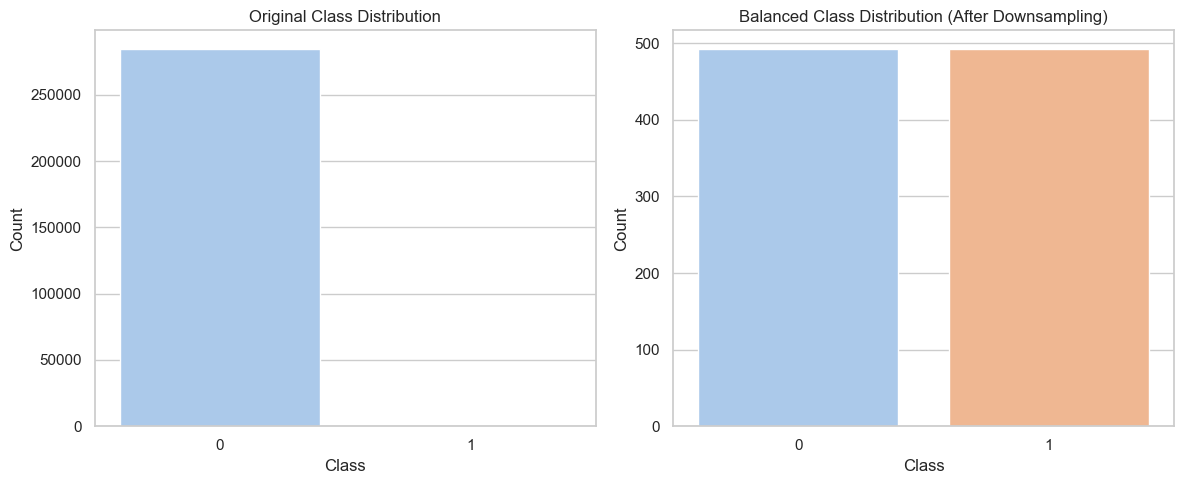

Class Distribution After Downsampling:

Class
0    492
1    492
Name: count, dtype: int64 

Summary Stats by Class:


Class        0     1
V3  mean -0.04 -7.03
    std   1.37  7.11
V4  mean -0.03  4.54
    std   1.37  2.87
V7  mean  0.01 -5.57
    std   0.93  7.21
V10 mean  0.04 -5.68
    std   1.04  4.90
V11 mean  0.01  3.80
    std   0.98  2.68
V12 mean -0.00 -6.26
    std   0.94  4.65
V14 mean  0.02 -6.97
    std   0.90  4.28
V16 mean  0.01 -4.14
    std   0.77  3.87
V17 mean  0.01 -6.67
    std   0.68  6.97

V3    V4    V7   V10   V11   V12   V14   V16   V17  Class
138028 -0.67  0.72  0.39 -0.60 -0.33 -0.22 -1.05  0.60  0.63      0
63099   0.90  0.69  0.50  0.17  0.82  0.47  0.57 -0.01 -0.50      0
73411   1.12 -1.31 -0.70  2.05  0.58 -0.59 -0.34 -0.76  0.54      0
164247 -0.99 -0.03  0.78 -1.24 -0.84 -0.59 -0.44  0.27  0.70      0
148999  0.27  3.87 -0.72  1.17  1.30 -1.92  1.32  1.32 -0.44      0
38488   0.40 -0.55 -0.42  0.66 -0.51 -0.23  0.13 -1.16 -0.06      0
153861  1.20 -1.33 -0.57  0.25  0.18 -3.34  0.78  1.39  0.59      0
20458   0.67 -1.31 -1.13  1.44 -0.63 -1.49 -0.13 -0.13  0.50      0
158719  1.12 -0.20  0.34 -0.97 -1.12 -0.41  0.17  0.46 -0.72      0
10980   0.68 -0.77 -0.68 -1.53  0.14 -1.46  1.08 -0.56  0.51      0

In [255]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Separate features and target
X = df2.drop('Class', axis=1)
y = df2['Class']

# Step 2: Visualize original class distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y, palette='pastel')
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

# Step 3: Apply Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Step 4: Combine resampled data
downsampled_df = pd.DataFrame(X_resampled, columns=X.columns)
downsampled_df['Class'] = y_resampled.astype(int)

# Step 5: Visualize balanced distribution
plt.subplot(1, 2, 2)
sns.countplot(x=downsampled_df['Class'], palette='pastel')
plt.title('Balanced Class Distribution (After Downsampling)')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Step 6: Print a detailed summary of each class
print("Class Distribution After Downsampling:\n")
print(downsampled_df['Class'].value_counts(), "\n")

print("Summary Stats by Class:")
display(downsampled_df.groupby('Class').agg(['mean', 'std']).T)

# Step 7: Show preview of the downsampled dataset
downsampled_df.head(10)

In [257]:
# Print the number of rows and columns in the downsampled dataset
rows, columns = downsampled_df.shape
print("The downsampled dataset has", rows, "rows and", columns, "columns.")

# Count how many records belong to each class
class_counts = downsampled_df['Class'].value_counts().sort_index()

# Print the number of non-fraudulent and fraudulent transactions
for class_value, count in class_counts.items():
    if class_value == 0:
        print("Number of non-fraudulent transactions:", count)
    elif class_value == 1:
        print("Number of fraudulent transactions:", count)

The downsampled dataset has 984 rows and 10 columns.
Number of non-fraudulent transactions: 492
Number of fraudulent transactions: 492


In [259]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings for clarity
warnings.filterwarnings('ignore')

# Set consistent visual style
sns.set_theme(style="ticks", palette="Set2")

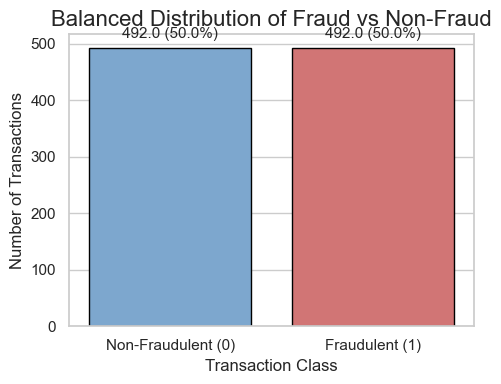

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create the count plot
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=downsampled_df, x='Class', palette=['#6FA8DC', '#E06666'], edgecolor='black')

# Add labels and percentages on bars
total = len(downsampled_df)
for container in ax.containers:
    ax.bar_label(container, labels=[
        f"{v.get_height()} ({(v.get_height()/total)*100:.1f}%)" for v in container
    ], label_type='edge', fontsize=11, padding=5)

# Customization
ax.set_title("Balanced Distribution of Fraud vs Non-Fraud", fontsize=16)
ax.set_xlabel("Transaction Class", fontsize=12)
ax.set_ylabel("Number of Transactions", fontsize=12)
ax.set_xticklabels(['Non-Fraudulent (0)', 'Fraudulent (1)'])
plt.tight_layout()
plt.show()


In [263]:
print(downsampled_df.columns.tolist())

['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'Class']


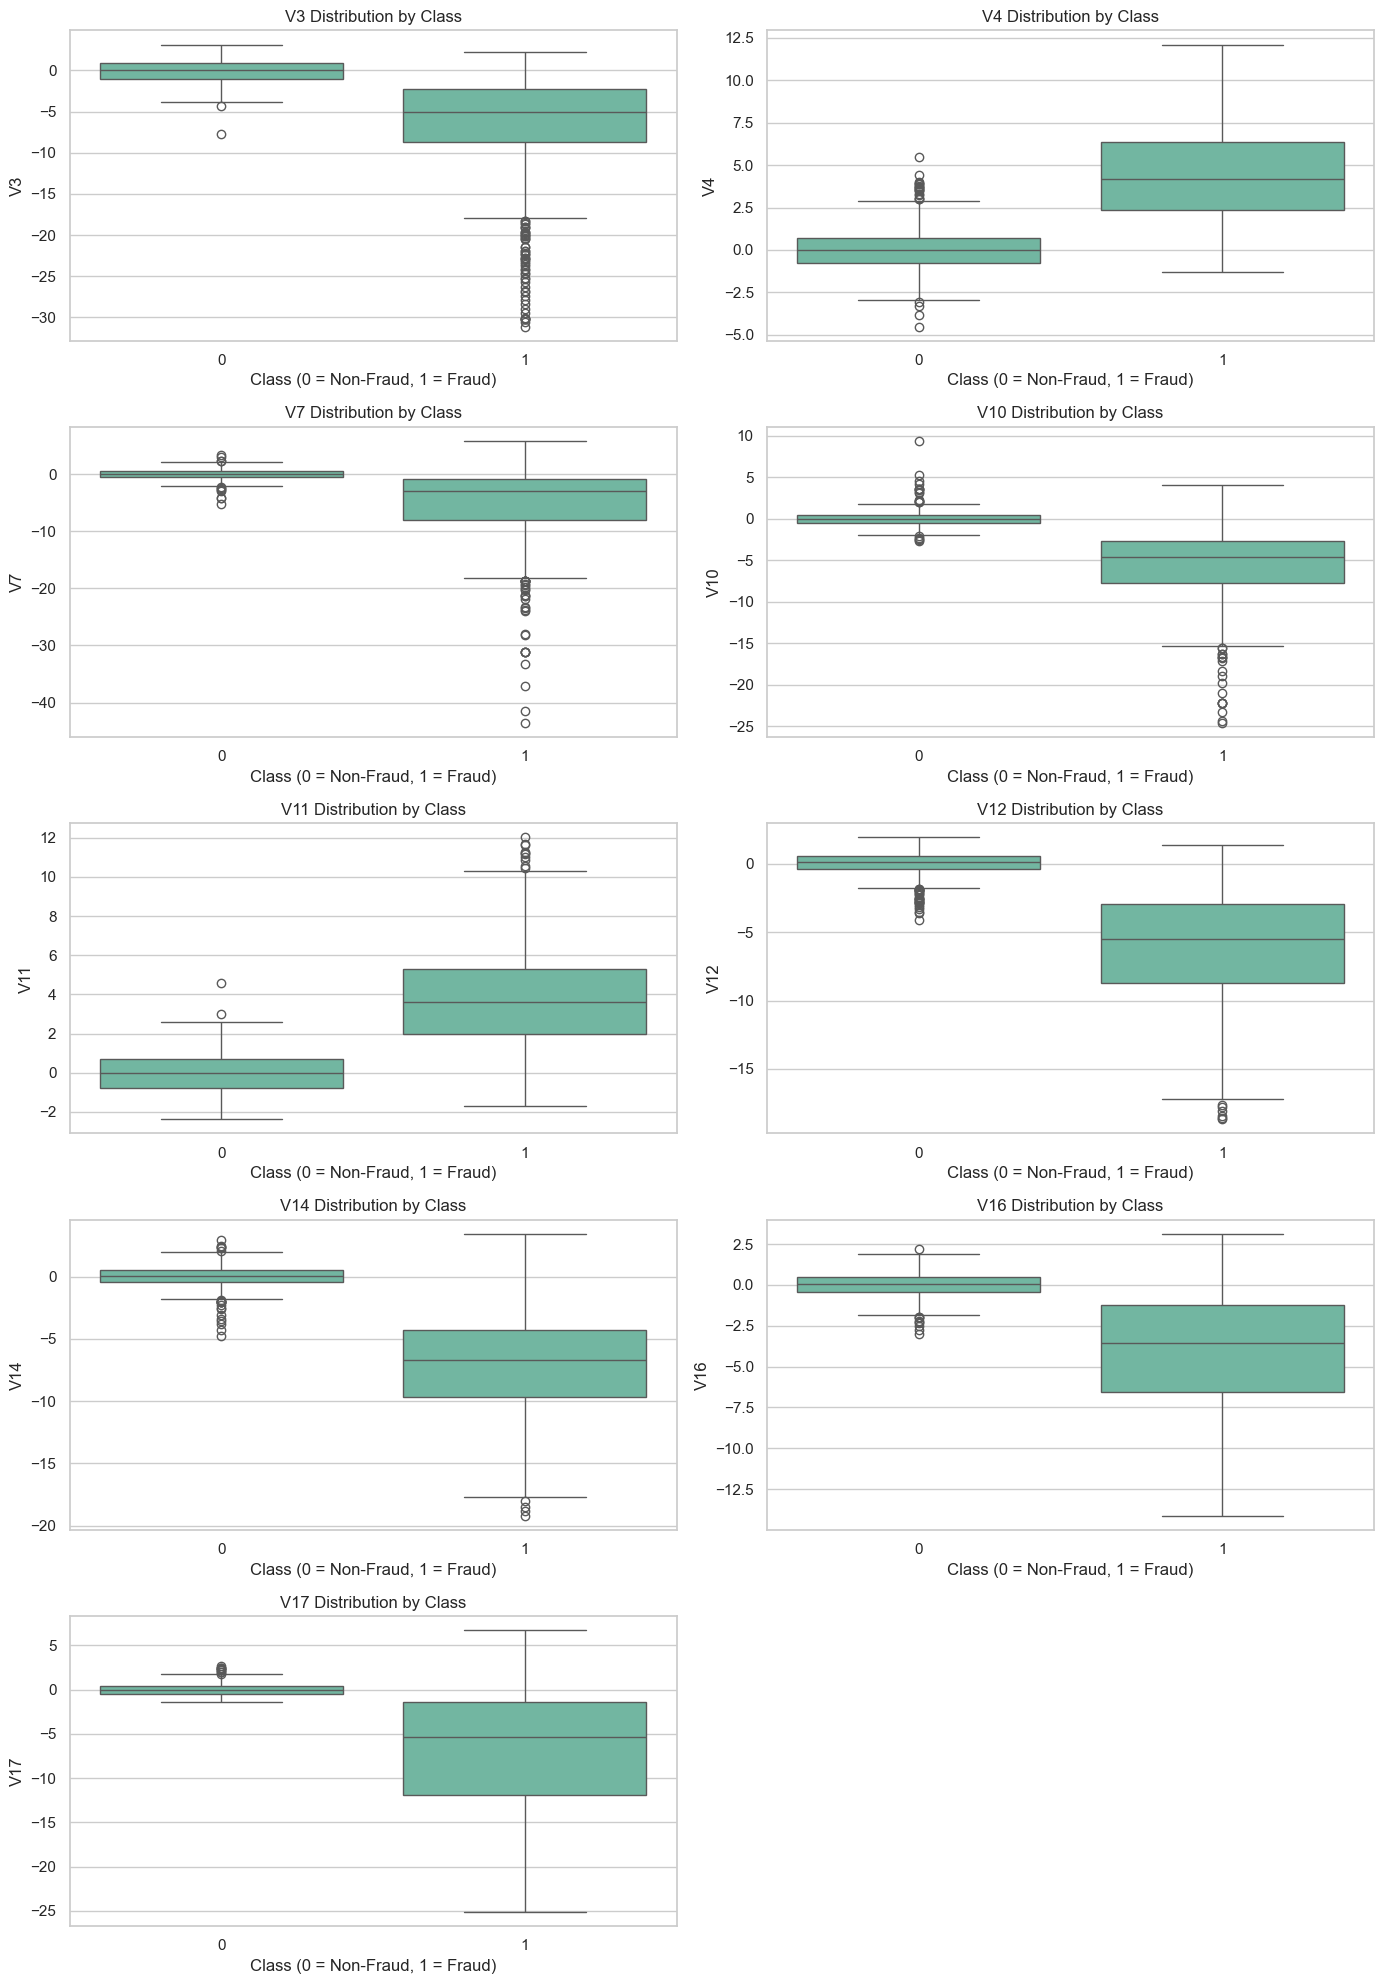

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features to visualize 
features = [col for col in downsampled_df.columns if col != 'Class']

# Set global style for all plots
sns.set(style='whitegrid', palette='Set2')

# Number of plots per row
plots_per_row = 2
total_features = len(features)
rows = (total_features + 1) // plots_per_row

# Create subplots
fig, axes = plt.subplots(rows, plots_per_row, figsize=(14, 4 * rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(data=downsampled_df, x='Class', y=feature, ax=axes[i])
    axes[i].set_title(f'{feature} Distribution by Class', fontsize=12)
    axes[i].set_xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
    axes[i].set_ylabel(feature)

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

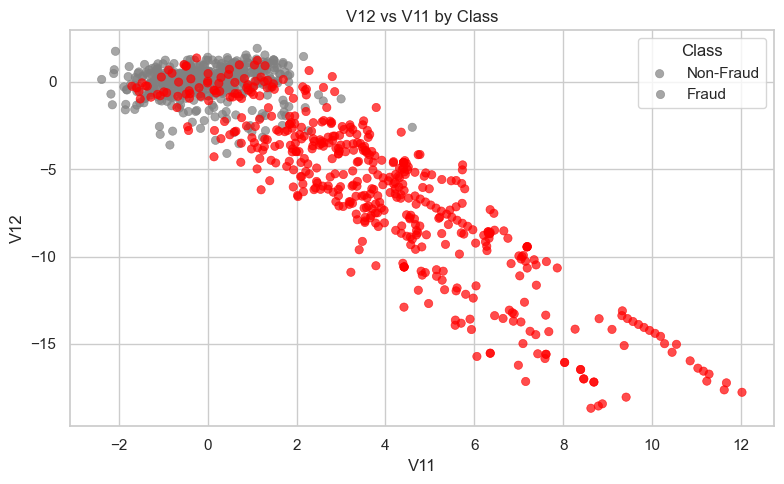

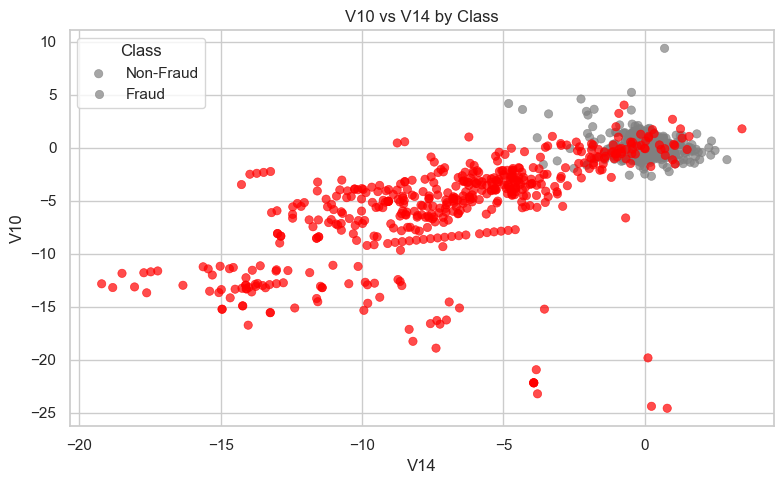

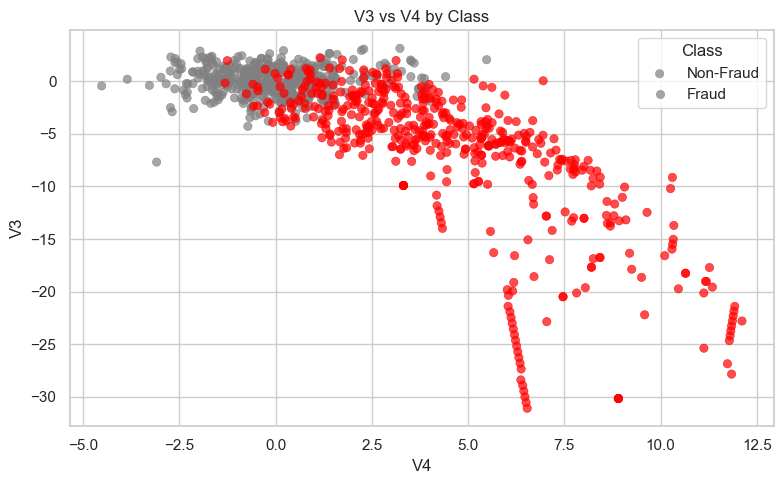

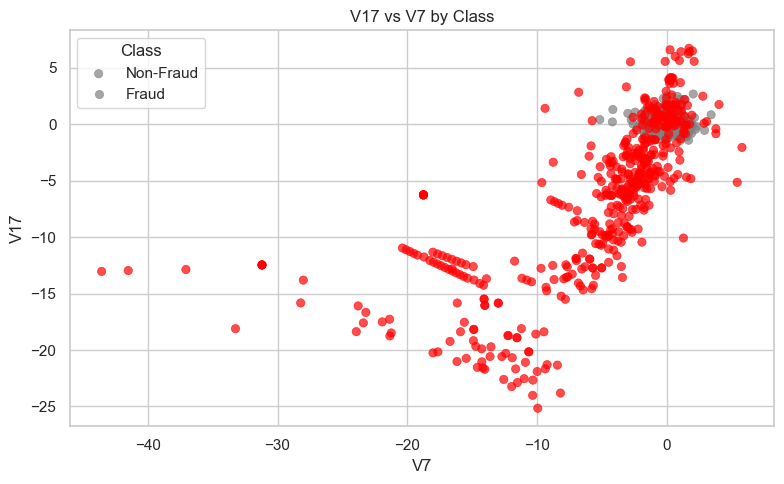

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Select relevant feature pairs that might reveal patterns
feature_pairs = [
    ('V11', 'V12'),
    ('V14', 'V10'),
    ('V4', 'V3'),
    ('V7', 'V17')
]

# Plot each pair
for x_feature, y_feature in feature_pairs:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(
        data=downsampled_df,
        x=x_feature,
        y=y_feature,
        hue='Class',
        palette={0: 'gray', 1: 'red'},
        alpha=0.7,
        edgecolor=None
    )
    plt.title(f'{y_feature} vs {x_feature} by Class')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.legend(title='Class', labels=['Non-Fraud', 'Fraud'])
    plt.tight_layout()
    plt.show()

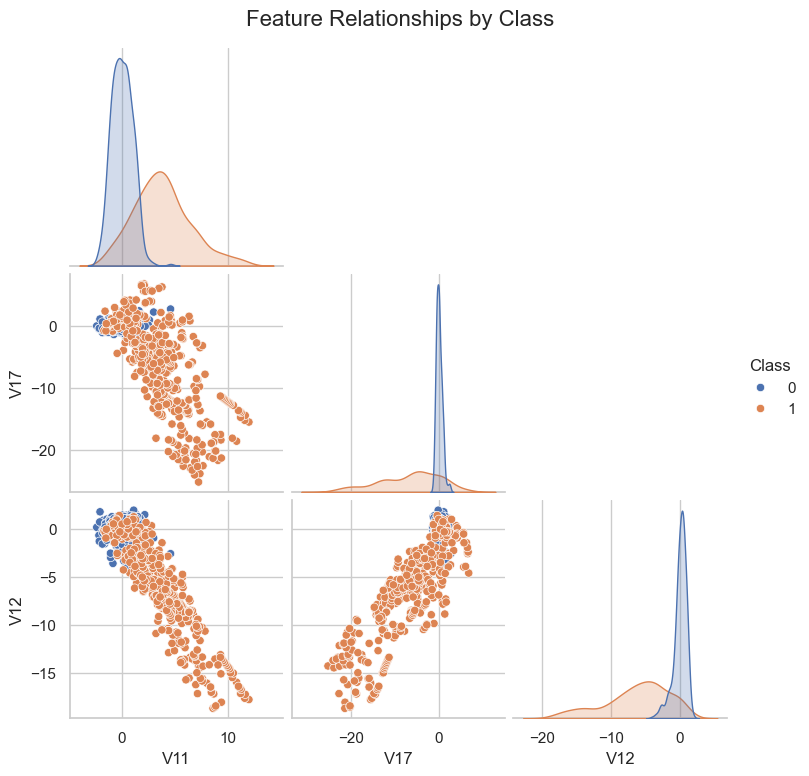

In [269]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings('ignore')

# Choose top relevant features based on correlation with 'Class'
selected_features = ['V11', 'V17', 'V12', 'Class']

# Create pairplot for selected features
sns.pairplot(data=downsampled_df[selected_features], hue='Class', corner=True, height=2.5)
plt.suptitle("Feature Relationships by Class", fontsize=16, y=1.03)
plt.show()


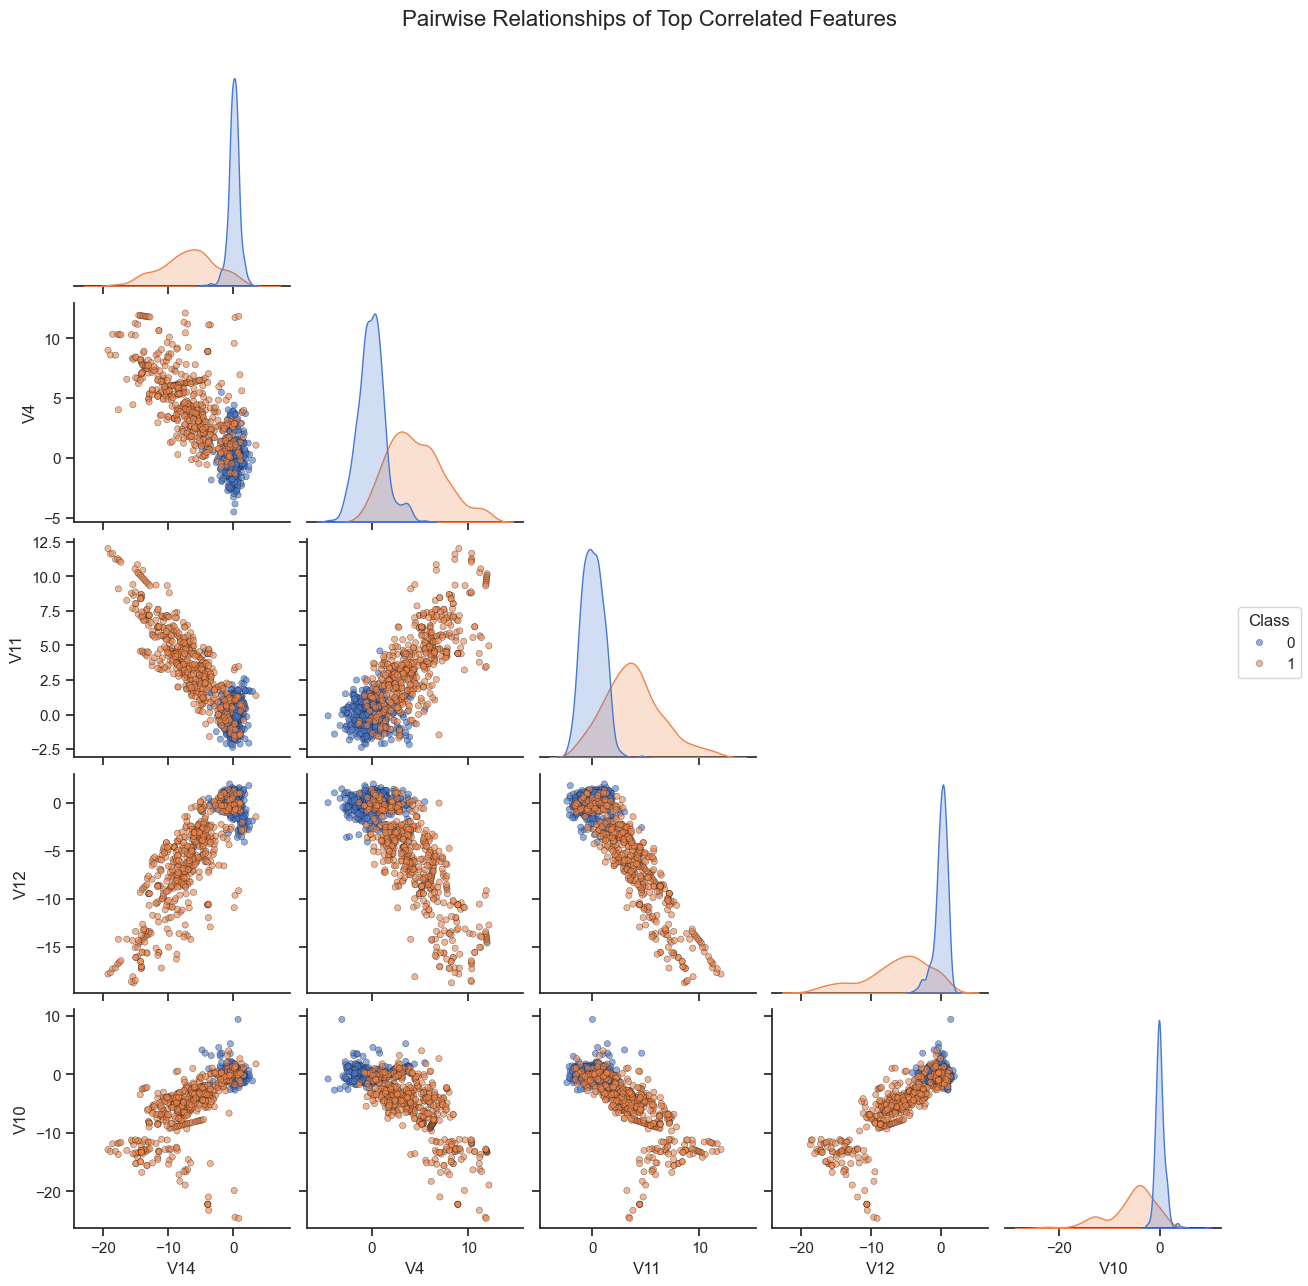

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore warnings for clean output
warnings.filterwarnings('ignore')

# Step 1: Calculate correlations with 'Class'
correlation = downsampled_df.corr()['Class'].abs().sort_values(ascending=False)

# Step 2: Get top 5 most correlated features (excluding 'Class' itself)
top_features = correlation.index[1:6].tolist()

# Step 3: Add 'Class' to the list for pairplot
selected_features = top_features + ['Class']

# Step 4: Create a focused pairplot
sns.set(style="ticks", palette="muted")
pair = sns.pairplot(
    data=downsampled_df[selected_features],
    hue='Class',
    corner=True,
    height=2.5,
    plot_kws={'alpha': 0.6, 's': 20, 'edgecolor': 'k'},
    diag_kws={'fill': True}
)

# Add title and improve legend
pair.fig.suptitle("Pairwise Relationships of Top Correlated Features", fontsize=16, y=1.03)
pair._legend.set_title("Class")
pair._legend.set_frame_on(True)

plt.show()

In [273]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import pandas as pd


X = df2.drop(columns='Class')
y = df2['Class']

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Combine X_train and y_train for resampling
train_data = X_train_orig.copy()
train_data['Class'] = y_train_orig

# Separate the majority and minority classes
majority_class = train_data[train_data['Class'] == 0]
minority_class = train_data[train_data['Class'] == 1]

# Downsample the majority class
majority_downsampled = resample(
    majority_class,
    replace=False,
    n_samples=len(minority_class),
    random_state=42
)

# Combine the downsampled majority class with the minority class
downsampled_train_data = pd.concat([majority_downsampled, minority_class])

# Step 3: Prepare final training and test sets
X_train_downsampled = downsampled_train_data.drop(columns='Class')
y_train_downsampled = downsampled_train_data['Class']

X_train_downsampled.shape, y_train_downsampled.shape, X_test_orig.shape, y_test_orig.shape

((788, 9), (788,), (56962, 9), (56962,))

In [275]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

X = df2.drop(columns='Class')
y = df2['Class']

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
...



Ellipsis

In [277]:
# SMOTE Resampling (Optional Comparison to Downsampling)

from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_orig, y_train_orig)

print("After SMOTE - class distribution:")
print(y_train_smote.value_counts())


After SMOTE - class distribution:
Class
0    227451
1    227451
Name: count, dtype: int64


In [279]:
!pip install lazypredict


In [281]:
# Import LazyClassifier from lazypredict
from lazypredict.Supervised import LazyClassifier

# Step 1: Initialize the LazyClassifier
lazy_clf = LazyClassifier(verbose=0, ignore_warnings=True, random_state=42)

# Step 2: Fit on downsampled training data and test on original test data
models, predictions = lazy_clf.fit(
    X_train_downsampled, X_test_orig,
    y_train_downsampled, y_test_orig
)

# Step 3: Show performance summary of all models
print("LazyClassifier Model Performance (Evaluated on Original Test Set):")
models.head(10)  


  0%|          | 0/29 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 394, number of negative: 394
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 788, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                         
LogisticRegression               0.97               0.95     0.95      0.99   
LinearSVC                        0.97               0.95     0.95      0.98   
SVC                              0.99               0.95     0.95      0.99   
SGDClassifier                    0.99               0.95     0.95      0.99   
CalibratedClassifierCV           0.98               0.95     0.95      0.99   
PassiveAggressiveClassifier      0.98               0.94     0.94      0.99   
ExtraTreesClassifier             0.97               0.94     0.94      0.98   
KNeighborsClassifier             0.98               0.94     0.94      0.99   
RandomForestClassifier           0.96               0.94     0.94      0.98   
XGBClassifier                    0.95               0.93     0.93      0.97   

                             Time Taken  
Model                                    
LogisticRegression                 0.07  
LinearSVC                          0.07  
SVC                                0.85  
SGDClassifier                      0.06  
CalibratedClassifierCV             0.17  
PassiveAggressiveClassifier        0.08  
ExtraTreesClassifier               0.83  
KNeighborsClassifier               2.89  
RandomForestClassifier             0.63  
XGBClassifier                      0.25

In [283]:
from lazypredict.Supervised import LazyClassifier

# Initialize the LazyClassifier
lazy_clf = LazyClassifier(verbose=0, ignore_warnings=True, random_state=42)

# Fit and compare models using downsampled training data and original test set
models, predictions = lazy_clf.fit(X_train_downsampled, X_test_orig, y_train_downsampled, y_test_orig)

# Show top 10 models
print("LazyClassifier Model Performance:")
print(models.head(10))



  0%|          | 0/29 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 394, number of negative: 394
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 788, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [285]:
# Train Logistic Regression on SMOTE Data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model_smote = LogisticRegression(max_iter=1000, class_weight='balanced')
model_smote.fit(X_train_smote, y_train_smote)

# Predict on original test set
y_pred_smote = model_smote.predict(X_test_orig)
y_probs_smote = model_smote.predict_proba(X_test_orig)[:, 1]

# Evaluation metrics
print("\nEvaluation Metrics (Logistic Regression with SMOTE):")
print(f"Accuracy : {accuracy_score(y_test_orig, y_pred_smote):.4f}")
print(f"Precision: {precision_score(y_test_orig, y_pred_smote):.4f}")
print(f"Recall   : {recall_score(y_test_orig, y_pred_smote):.4f}")
print(f"F1 Score : {f1_score(y_test_orig, y_pred_smote):.4f}")
print(f"ROC AUC  : {roc_auc_score(y_test_orig, y_probs_smote):.4f}")



Evaluation Metrics (Logistic Regression with SMOTE):
Accuracy : 0.9713
Precision: 0.0529
Recall   : 0.9286
F1 Score : 0.1002
ROC AUC  : 0.9706


In [287]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


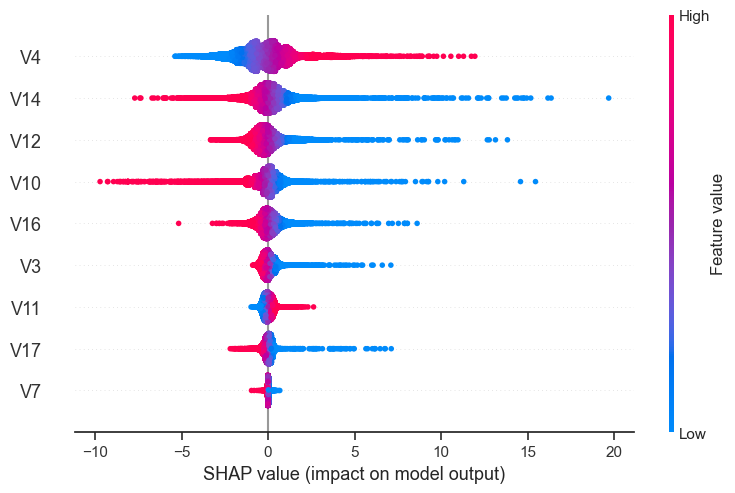

In [289]:
# SHAP Explainability for SMOTE-based Logistic Regression

import shap

explainer = shap.Explainer(model_smote, X_test_orig)
shap_values = explainer(X_test_orig)

shap.summary_plot(shap_values, X_test_orig)


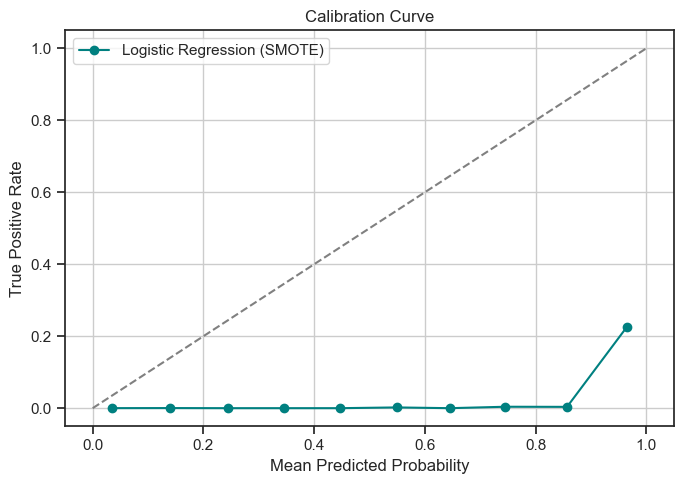

In [291]:
# Calibration Curve

from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

prob_true, prob_pred = calibration_curve(y_test_orig, y_probs_smote, n_bins=10)

plt.figure(figsize=(7, 5))
plt.plot(prob_pred, prob_true, marker='o', label='Logistic Regression (SMOTE)', color='teal')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('True Positive Rate')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




In [293]:
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score

# Initialize variables to track best threshold
best_threshold = 0.5
best_f1 = 0
metrics_list = []

# Try thresholds from 0.01 to 0.89
thresholds = np.arange(0.01, 0.90, 0.01)
for thresh in thresholds:
    y_pred_thresh = (y_probs_smote >= thresh).astype(int)
    f1 = f1_score(y_test_orig, y_pred_thresh)
    precision = precision_score(y_test_orig, y_pred_thresh)
    recall = recall_score(y_test_orig, y_pred_thresh)
    
    metrics_list.append((thresh, f1, precision, recall))
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = thresh

# Print the best threshold
print(f"\nBest Threshold: {best_threshold:.2f}")
print(f"F1 Score at Best Threshold: {best_f1:.4f}")


Best Threshold: 0.89
F1 Score at Best Threshold: 0.3308


In [295]:
# Final predictions at best threshold
y_pred_final = (y_probs_smote >= best_threshold).astype(int)

# Evaluate final metrics
print("\nFinal Evaluation at Tuned Threshold:")
print(f"Accuracy : {accuracy_score(y_test_orig, y_pred_final):.4f}")
print(f"Precision: {precision_score(y_test_orig, y_pred_final):.4f}")
print(f"Recall   : {recall_score(y_test_orig, y_pred_final):.4f}")
print(f"F1 Score : {f1_score(y_test_orig, y_pred_final):.4f}")
print(f"ROC AUC  : {roc_auc_score(y_test_orig, y_probs_smote):.4f}")



Final Evaluation at Tuned Threshold:
Accuracy : 0.9938
Precision: 0.2028
Recall   : 0.8980
F1 Score : 0.3308
ROC AUC  : 0.9706


In [297]:
import joblib

# Save the trained model
joblib.dump(model_smote, 'final_logistic_model.pkl')

# Save the threshold
with open('best_threshold.txt', 'w') as f:
    f.write(str(best_threshold))

print("\nModel and threshold saved successfully!")



Model and threshold saved successfully!


In [299]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import NuSVC
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import f1_score, precision_score, recall_score

models = {
    'BernoulliNB': BernoulliNB(),
    'NuSVC': NuSVC(probability=True),
    'NearestCentroid': NearestCentroid()
}

f1_scores = {}
precision_scores = {}
recall_scores = {}

for name, model in models.items():
    model.fit(X_train_downsampled, y_train_downsampled)
    y_pred = model.predict(X_test_orig)
    f1_scores[name] = f1_score(y_test_orig, y_pred, pos_label=1)
    precision_scores[name] = precision_score(y_test_orig, y_pred, pos_label=1)
    recall_scores[name] = recall_score(y_test_orig, y_pred, pos_label=1)

for name in models:
    print(f"{name} - F1 Score: {f1_scores[name]:.4f}, Precision: {precision_scores[name]:.4f}, Recall: {recall_scores[name]:.4f}")


BernoulliNB - F1 Score: 0.0994, Precision: 0.0527, Recall: 0.8776
NuSVC - F1 Score: 0.5950, Precision: 0.4586, Recall: 0.8469
NearestCentroid - F1 Score: 0.8144, Precision: 0.8229, Recall: 0.8061


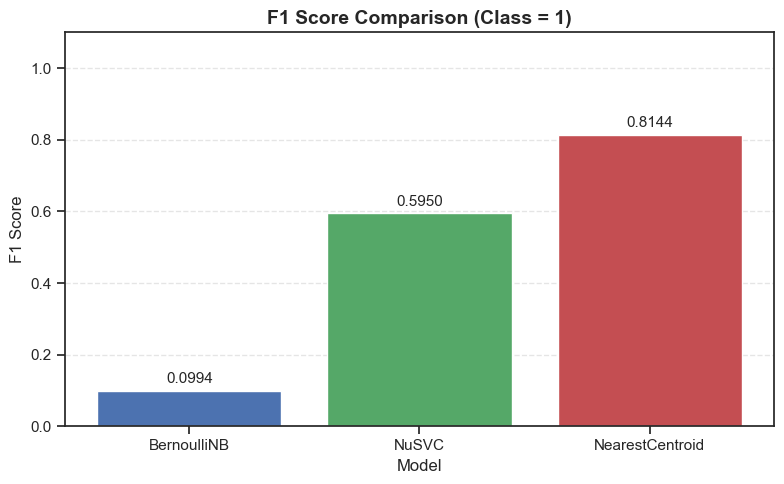

In [301]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert F1 scores dictionary to Series
f1_series = pd.Series(f1_scores)

# Create bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(
    f1_series.index,
    f1_series.values,
    color=['#4C72B0', '#55A868', '#C44E52']
)

# Add labels on top of each bar
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.02,
        f"{bar.get_height():.4f}",
        ha='center',
        fontsize=11
    )

plt.title("F1 Score Comparison (Class = 1)", fontsize=14, fontweight='bold')
plt.xlabel("Model", fontsize=12)
plt.ylabel("F1 Score", fontsize=12)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


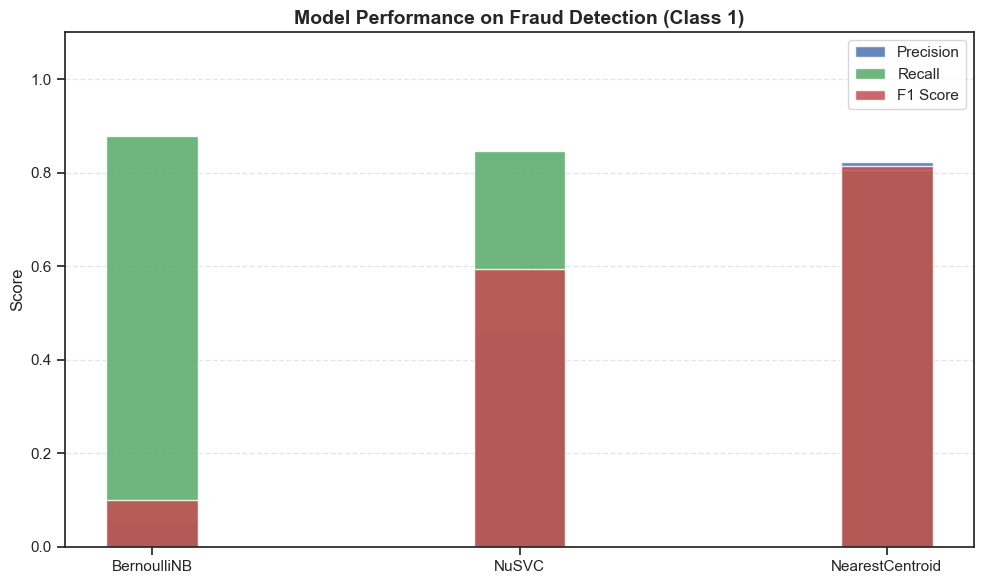

In [303]:
from sklearn.metrics import precision_score, recall_score

# Initialize dictionaries to store metrics
precision_scores = {}
recall_scores = {}
f1_scores = {}

for name, model in models.items():
    model.fit(X_train_downsampled, y_train_downsampled)
    y_pred = model.predict(X_test_orig)

    precision_scores[name] = precision_score(y_test_orig, y_pred, pos_label=1)
    recall_scores[name] = recall_score(y_test_orig, y_pred, pos_label=1)
    f1_scores[name] = f1_score(y_test_orig, y_pred, pos_label=1)

# Convert to DataFrame
import pandas as pd
metrics_df = pd.DataFrame({
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
}).T

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
colors = ['#4C72B0', '#55A868', '#C44E52']

for i, metric in enumerate(metrics_df.index):
    plt.bar(
        metrics_df.columns,
        metrics_df.loc[metric],
        alpha=0.85,
        label=metric,
        width=0.25,
        align='center',
        color=colors[i]
    )
    plt.xticks(rotation=0)

# Adjust spacing between bars
plt.title("Model Performance on Fraud Detection (Class 1)", fontsize=14, fontweight='bold')
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


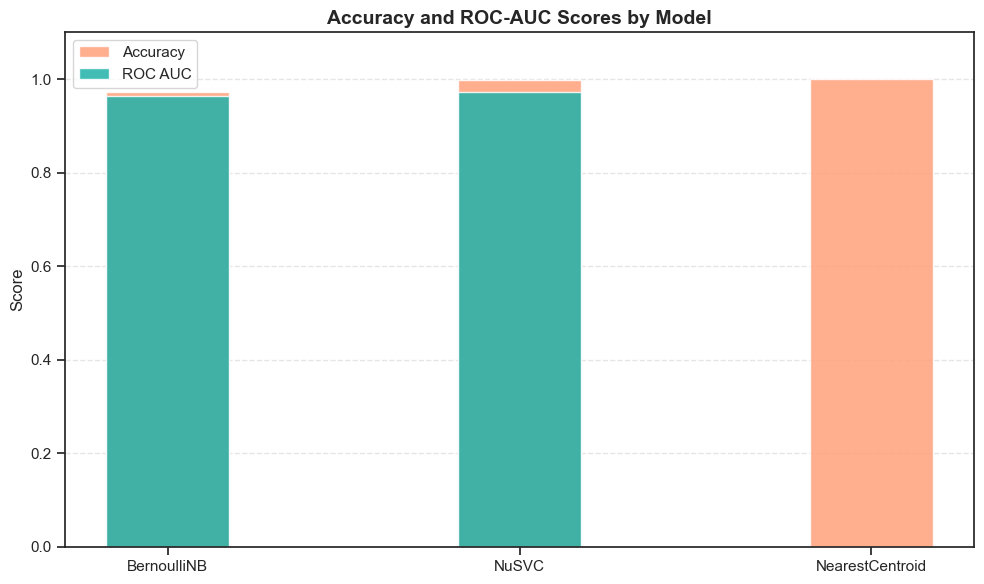

In [305]:
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

# Calculate metrics for each model
accuracy_scores = {}
roc_auc_scores = {}

for name, model in models.items():
    model.fit(X_train_downsampled, y_train_downsampled)
    y_pred = model.predict(X_test_orig)
    y_proba = model.predict_proba(X_test_orig)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy_scores[name] = accuracy_score(y_test_orig, y_pred)
    roc_auc_scores[name] = roc_auc_score(y_test_orig, y_proba) if y_proba is not None else 0

# Create DataFrame for plotting
metrics_all = pd.DataFrame({
    'Accuracy': accuracy_scores,
    'ROC AUC': roc_auc_scores
}).T

# Plotting
plt.figure(figsize=(10, 6))
colors = ['#FFA07A', '#20B2AA']

for i, metric in enumerate(metrics_all.index):
    plt.bar(
        metrics_all.columns,
        metrics_all.loc[metric],
        alpha=0.85,
        label=metric,
        width=0.35,
        align='center',
        color=colors[i]
    )

plt.title("Accuracy and ROC-AUC Scores by Model", fontsize=14, fontweight='bold')
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


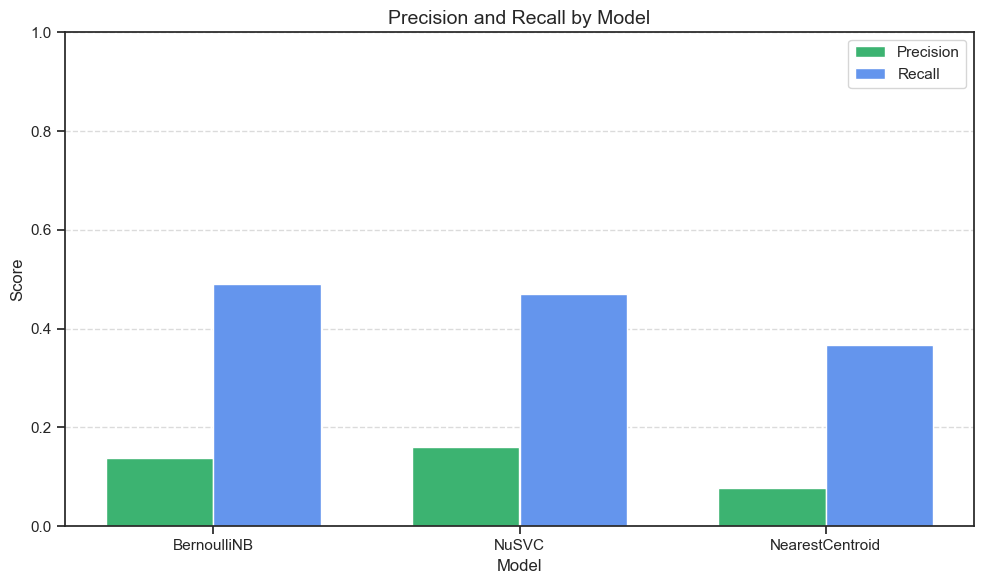

In [307]:
import matplotlib.pyplot as plt

# Precision and Recall values for each model
precision_scores = {
    'BernoulliNB': 0.1389,
    'NuSVC': 0.1600,
    'NearestCentroid': 0.0769
}

recall_scores = {
    'BernoulliNB': 0.4898,
    'NuSVC': 0.4694,
    'NearestCentroid': 0.3673
}

# Set up the plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(precision_scores))

# Create bar plots
plt.bar(index, precision_scores.values(), bar_width, label='Precision', color='mediumseagreen')
plt.bar([i + bar_width for i in index], recall_scores.values(), bar_width, label='Recall', color='cornflowerblue')

# Add labels and title
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Precision and Recall by Model', fontsize=14)
plt.xticks([i + bar_width / 2 for i in index], precision_scores.keys(), fontsize=11)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [309]:
!pip install imblearn


In [311]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_downsampled, y_train_downsampled)
    y_pred = model.predict(X_test_orig)
    y_prob = model.predict_proba(X_test_orig)[:, 1]

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test_orig, y_pred),
        "Precision": precision_score(y_test_orig, y_pred),
        "Recall": recall_score(y_test_orig, y_pred),
        "F1 Score": f1_score(y_test_orig, y_pred),
        "ROC AUC": roc_auc_score(y_test_orig, y_prob)
    })

results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print("Final Model Performance Comparison:")
print(results_df)


[LightGBM] [Info] Number of positive: 394, number of negative: 394
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 788, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Final Model Performance Comparison:
                 Model  Accuracy  Precision  Recall  F1 Score  ROC AUC
0  Logistic Regression      0.96       0.04    0.93      0.08     0.97
1        Random Forest      0.96       0.04    0.92      0.08     0.98
2              XGBo

In [313]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

# Define the hyperparameter grid param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize base model
base_model = LogisticRegression(class_weight='balanced', max_iter=1000)

# Set up GridSearchCV
grid_search = GridSearchCV(
    base_model,
    param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit on downsampled training data
grid_search.fit(X_train_downsampled, y_train_downsampled)

# Get best model
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Predict and evaluate on original test set
y_pred = best_model.predict(X_test_orig)
y_proba = best_model.predict_proba(X_test_orig)[:, 1]

# Calculate and display metrics
print("\n Improved Logistic Regression Performance:")
print(f"Accuracy  : {accuracy_score(y_test_orig, y_pred):.4f}")
print(f"Precision : {precision_score(y_test_orig, y_pred):.4f}")
print(f"Recall    : {recall_score(y_test_orig, y_pred):.4f}")
print(f"F1 Score  : {f1_score(y_test_orig, y_pred):.4f}")
print(f"ROC AUC   : {roc_auc_score(y_test_orig, y_proba):.4f}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}

 Improved Logistic Regression Performance:
Accuracy  : 0.9619
Precision : 0.0403
Recall    : 0.9286
F1 Score  : 0.0773
ROC AUC   : 0.9721


In [315]:
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

# Get fraud probabilities
y_probs = best_model.predict_proba(X_test_orig)[:, 1]

# Test different thresholds
thresholds = np.arange(0.01, 0.90, 0.01)
best_f1 = 0
best_threshold = 0.5
metrics_list = []

for thresh in thresholds:
    y_pred_thresh = (y_probs >= thresh).astype(int)
    f1 = f1_score(y_test_orig, y_pred_thresh)
    prec = precision_score(y_test_orig, y_pred_thresh)
    rec = recall_score(y_test_orig, y_pred_thresh)
    
    metrics_list.append((thresh, f1, prec, rec))
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = thresh

# Print best threshold
print(f"Best Threshold: {best_threshold:.2f}")
print(f"F1 Score at Best Threshold: {best_f1:.4f}")


Best Threshold: 0.89
F1 Score at Best Threshold: 0.2300


In [317]:
# Apply best threshold
y_pred_final = (y_probs >= best_threshold).astype(int)

# Evaluate
print("\n Final Performance at Tuned Threshold:")
print(f"Accuracy  : {accuracy_score(y_test_orig, y_pred_final):.4f}")
print(f"Precision : {precision_score(y_test_orig, y_pred_final):.4f}")
print(f"Recall    : {recall_score(y_test_orig, y_pred_final):.4f}")
print(f"F1 Score  : {f1_score(y_test_orig, y_pred_final):.4f}")
print(f"ROC AUC   : {roc_auc_score(y_test_orig, y_probs):.4f}")



 Final Performance at Tuned Threshold:
Accuracy  : 0.9895
Precision : 0.1317
Recall    : 0.9082
F1 Score  : 0.2300
ROC AUC   : 0.9721


In [321]:
import joblib

# Save the trained model
joblib.dump(best_model, 'final_logistic_model.pkl')

# Save threshold separately
with open('best_threshold.txt', 'w') as f:
    f.write(str(best_threshold))


In [323]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_test_orig, y_pred_final, digits=4))


Classification Report:

              precision    recall  f1-score   support

           0     0.9998    0.9897    0.9947     56864
           1     0.1317    0.9082    0.2300        98

    accuracy                         0.9895     56962
   macro avg     0.5657    0.9489    0.6124     56962
weighted avg     0.9983    0.9895    0.9934     56962



<Figure size 600x400 with 0 Axes>

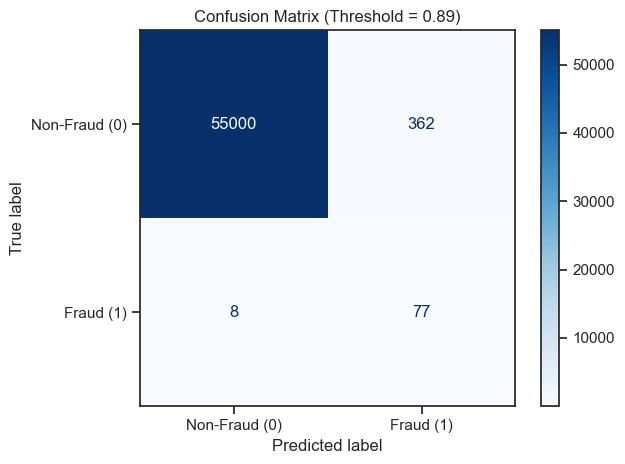

In [325]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

# Convert the list to a NumPy array for compatibility
cm_array = np.array([[55000, 362],
                     [8, 77]])

# Create and display the confusion matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm_array, display_labels=["Non-Fraud (0)", "Fraud (1)"])

plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Threshold = 0.89)")
plt.grid(False)
plt.tight_layout()
plt.show()

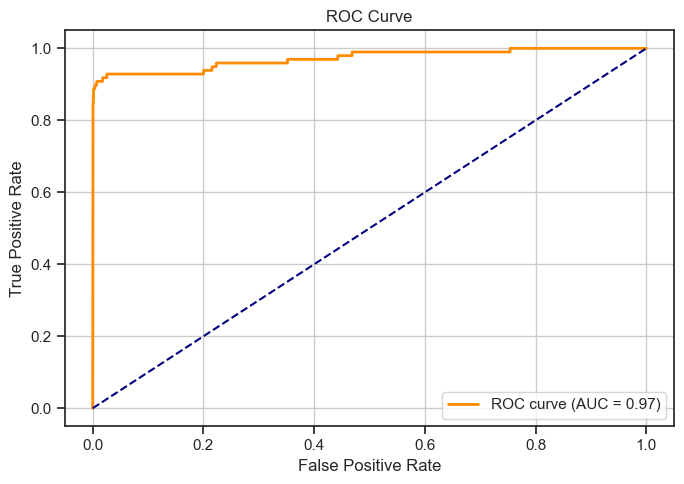

In [327]:
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


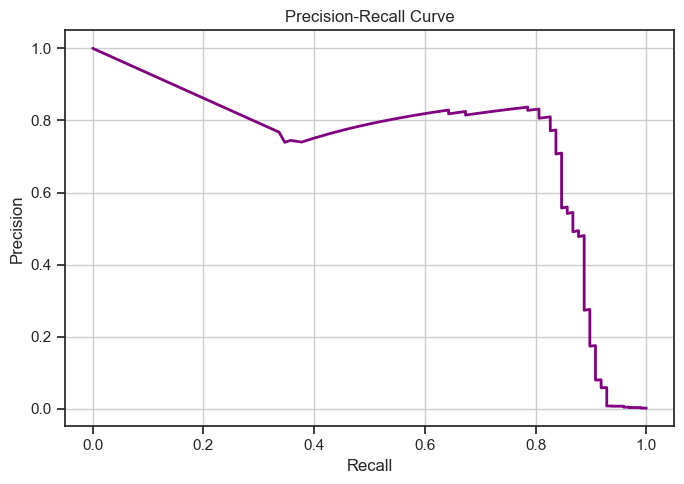

In [329]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test_orig, y_probs)

plt.figure(figsize=(7, 5))
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.tight_layout()
plt.show()


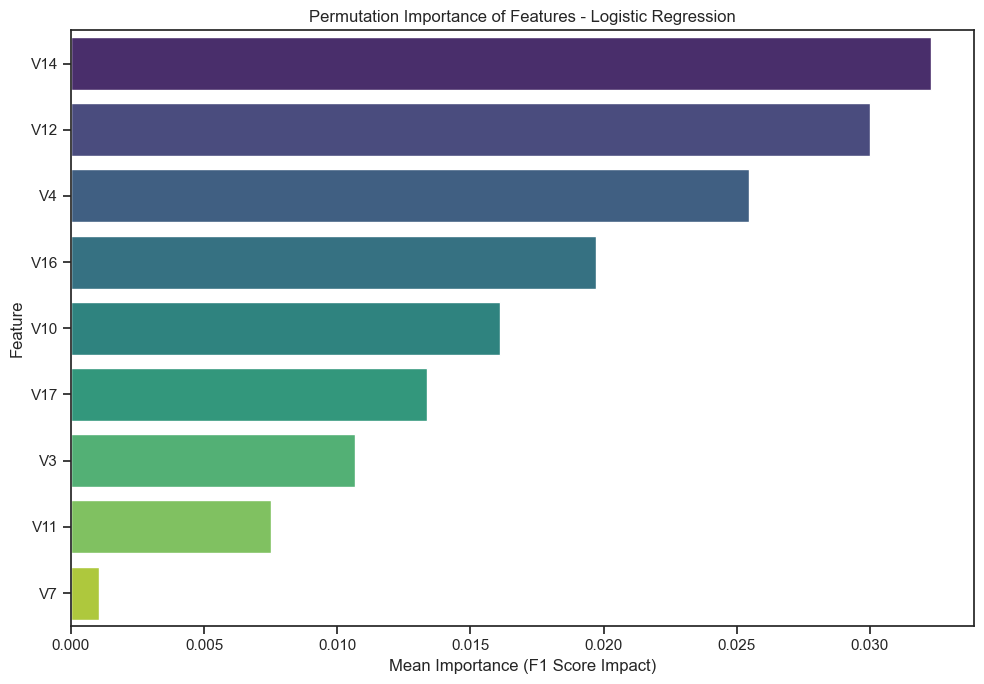

Feature Importances Table:
  Feature  Importance  Std Dev
6     V14        0.03     0.00
5     V12        0.03     0.00
1      V4        0.03     0.00
7     V16        0.02     0.00
3     V10        0.02     0.00
8     V17        0.01     0.00
0      V3        0.01     0.00
4     V11        0.01     0.00
2      V7        0.00     0.00


In [331]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

# STEP 1: Load your saved Logistic Regression model
best_model = joblib.load('final_logistic_model.pkl')  # Make sure this file is uploaded or in your working directory

# STEP 2: Compute permutation importances
result = permutation_importance(
    best_model,
    X_test_orig,
    y_test_orig,
    n_repeats=10,
    random_state=42,
    scoring='f1'
)

# STEP 3: Store importance values in a DataFrame
importance_df = pd.DataFrame({
    'Feature': X_test_orig.columns,
    'Importance': result.importances_mean,
    'Std Dev': result.importances_std
}).sort_values(by='Importance', ascending=False)

# STEP 4: Plot feature importances
plt.figure(figsize=(10, 7))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Permutation Importance of Features - Logistic Regression')
plt.xlabel('Mean Importance (F1 Score Impact)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# STEP 5: Display the DataFrame 
print("Feature Importances Table:")
print(importance_df)


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# Load data
df = pd.read_csv(r"C:\Users\Nadimul haque\Desktop\Final dissertation datasets\creditcard.csv")

# Features/target
X = df.drop(columns=["Class"])
y = df["Class"]

# Train/test split (stratified because of class imbalance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

def plot_roc_curve(y_true, y_score, label):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, linewidth=2, label=f"{label} (AUC = {roc_auc:.4f})")
    plt.plot([0, 1], [0, 1], linestyle="--", linewidth=1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve — {label}")
    plt.legend(loc="lower right")
    plt.grid(True, linewidth=0.3)
    plt.show()


*** We analyzed which features had the biggest impact on our model’s performance and found that V14, V12, and V4 were the most influential. These features played the strongest role in helping the model correctly detect fraud.***

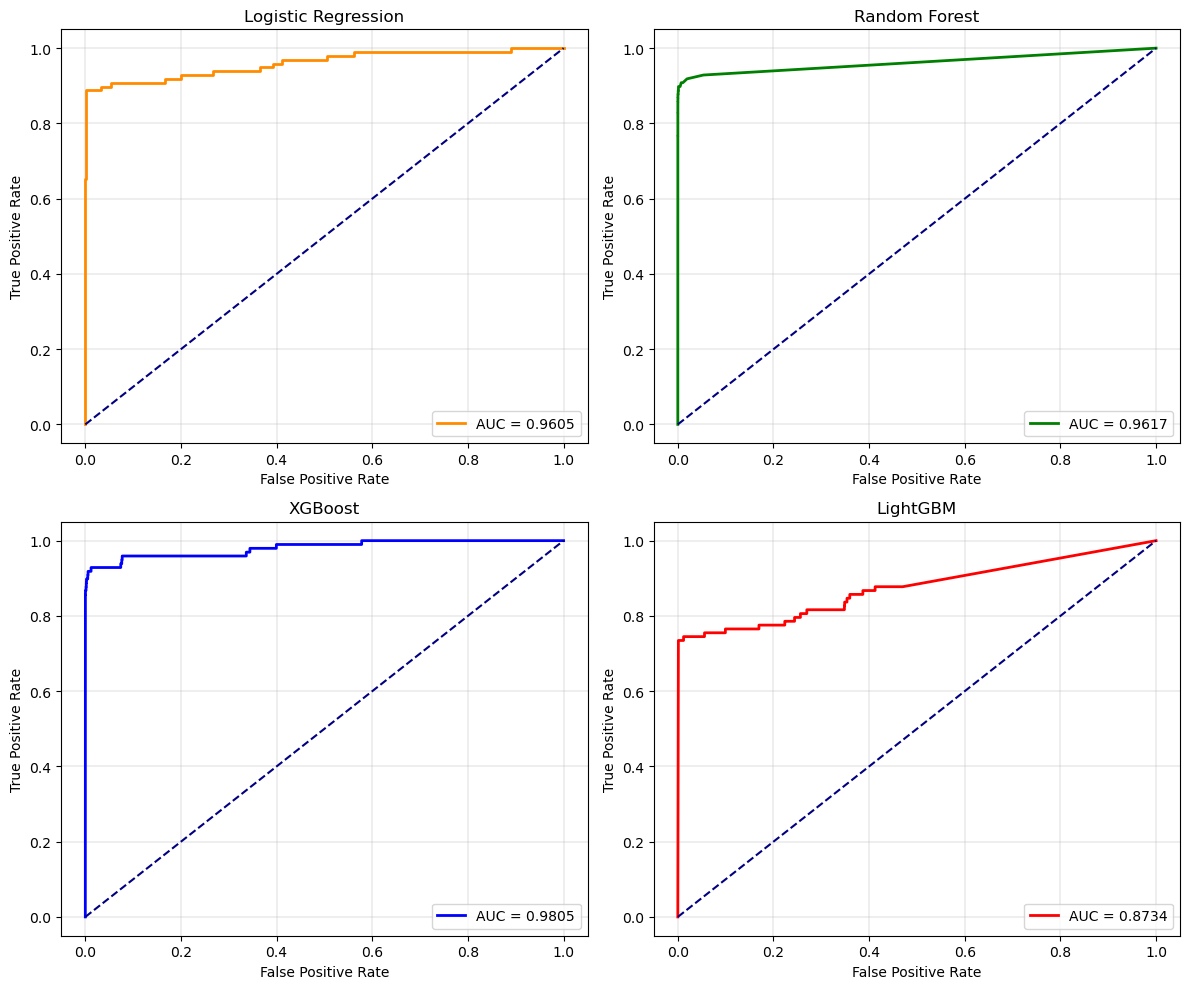

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid

# --- Logistic Regression ---
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
axes[0, 0].plot(fpr_lr, tpr_lr, color="darkorange", lw=2, label=f"AUC = {roc_auc_lr:.4f}")
axes[0, 0].plot([0, 1], [0, 1], linestyle="--", color="navy")
axes[0, 0].set_title("Logistic Regression")
axes[0, 0].set_xlabel("False Positive Rate")
axes[0, 0].set_ylabel("True Positive Rate")
axes[0, 0].legend(loc="lower right")
axes[0, 0].grid(True, linewidth=0.3)

# --- Random Forest ---
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
axes[0, 1].plot(fpr_rf, tpr_rf, color="green", lw=2, label=f"AUC = {roc_auc_rf:.4f}")
axes[0, 1].plot([0, 1], [0, 1], linestyle="--", color="navy")
axes[0, 1].set_title("Random Forest")
axes[0, 1].set_xlabel("False Positive Rate")
axes[0, 1].set_ylabel("True Positive Rate")
axes[0, 1].legend(loc="lower right")
axes[0, 1].grid(True, linewidth=0.3)

# --- XGBoost ---
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_score_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
axes[1, 0].plot(fpr_xgb, tpr_xgb, color="blue", lw=2, label=f"AUC = {roc_auc_xgb:.4f}")
axes[1, 0].plot([0, 1], [0, 1], linestyle="--", color="navy")
axes[1, 0].set_title("XGBoost")
axes[1, 0].set_xlabel("False Positive Rate")
axes[1, 0].set_ylabel("True Positive Rate")
axes[1, 0].legend(loc="lower right")
axes[1, 0].grid(True, linewidth=0.3)

# --- LightGBM ---
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_score_lgbm)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)
axes[1, 1].plot(fpr_lgbm, tpr_lgbm, color="red", lw=2, label=f"AUC = {roc_auc_lgbm:.4f}")
axes[1, 1].plot([0, 1], [0, 1], linestyle="--", color="navy")
axes[1, 1].set_title("LightGBM")
axes[1, 1].set_xlabel("False Positive Rate")
axes[1, 1].set_ylabel("True Positive Rate")
axes[1, 1].legend(loc="lower right")
axes[1, 1].grid(True, linewidth=0.3)

plt.tight_layout()

# Save high-resolution PNG
plt.savefig(r"C:\Users\Nadimul haque\Desktop\Final dissertation datasets\ROC_Curves_Subplots.png", dpi=300)

plt.show()


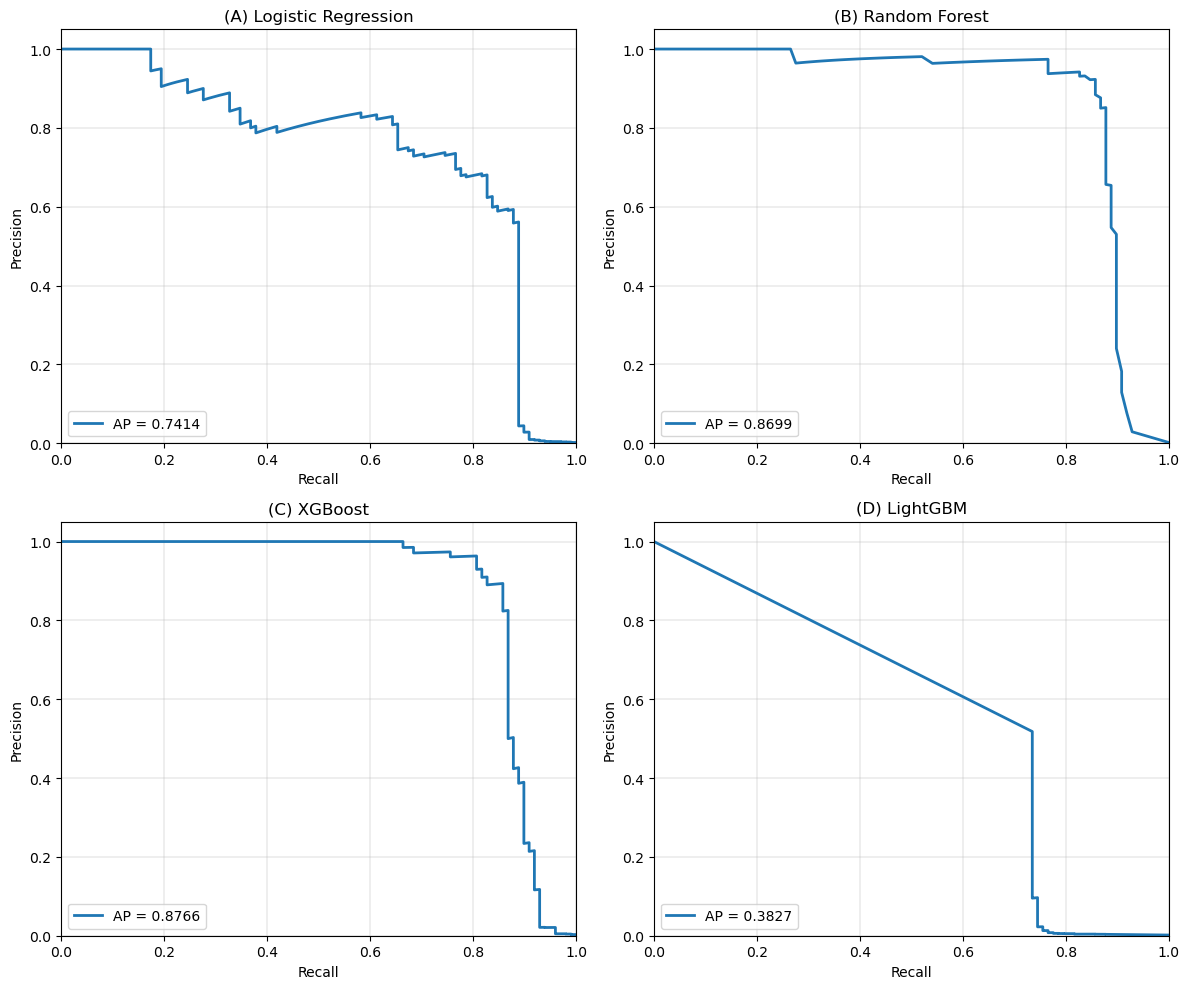

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score


def pr_points(y_true, y_scores):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    ap = average_precision_score(y_true, y_scores)
    return precision, recall, ap

# Calculate for each model
pr_data = {
    "(A) Logistic Regression": pr_points(y_test, y_score_lr),
    "(B) Random Forest":       pr_points(y_test, y_score_rf),
    "(C) XGBoost":             pr_points(y_test, y_score_xgb),
    "(D) LightGBM":            pr_points(y_test, y_score_lgbm),
}

# Plot 2×2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for ax, (title, (precision, recall, ap)) in zip(axes, pr_data.items()):
    ax.plot(recall, precision, lw=2, label=f"AP = {ap:.4f}")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1.05)
    ax.set_xlabel("Recall")
    ax.set_ylabel("Precision")
    ax.set_title(title)
    ax.legend(loc="lower left")
    ax.grid(True, linewidth=0.3)

plt.tight_layout()
plt.savefig(r"C:\Users\Nadimul haque\Desktop\Final dissertation datasets\PR_Curves_Subplots.png", dpi=300)
plt.show()


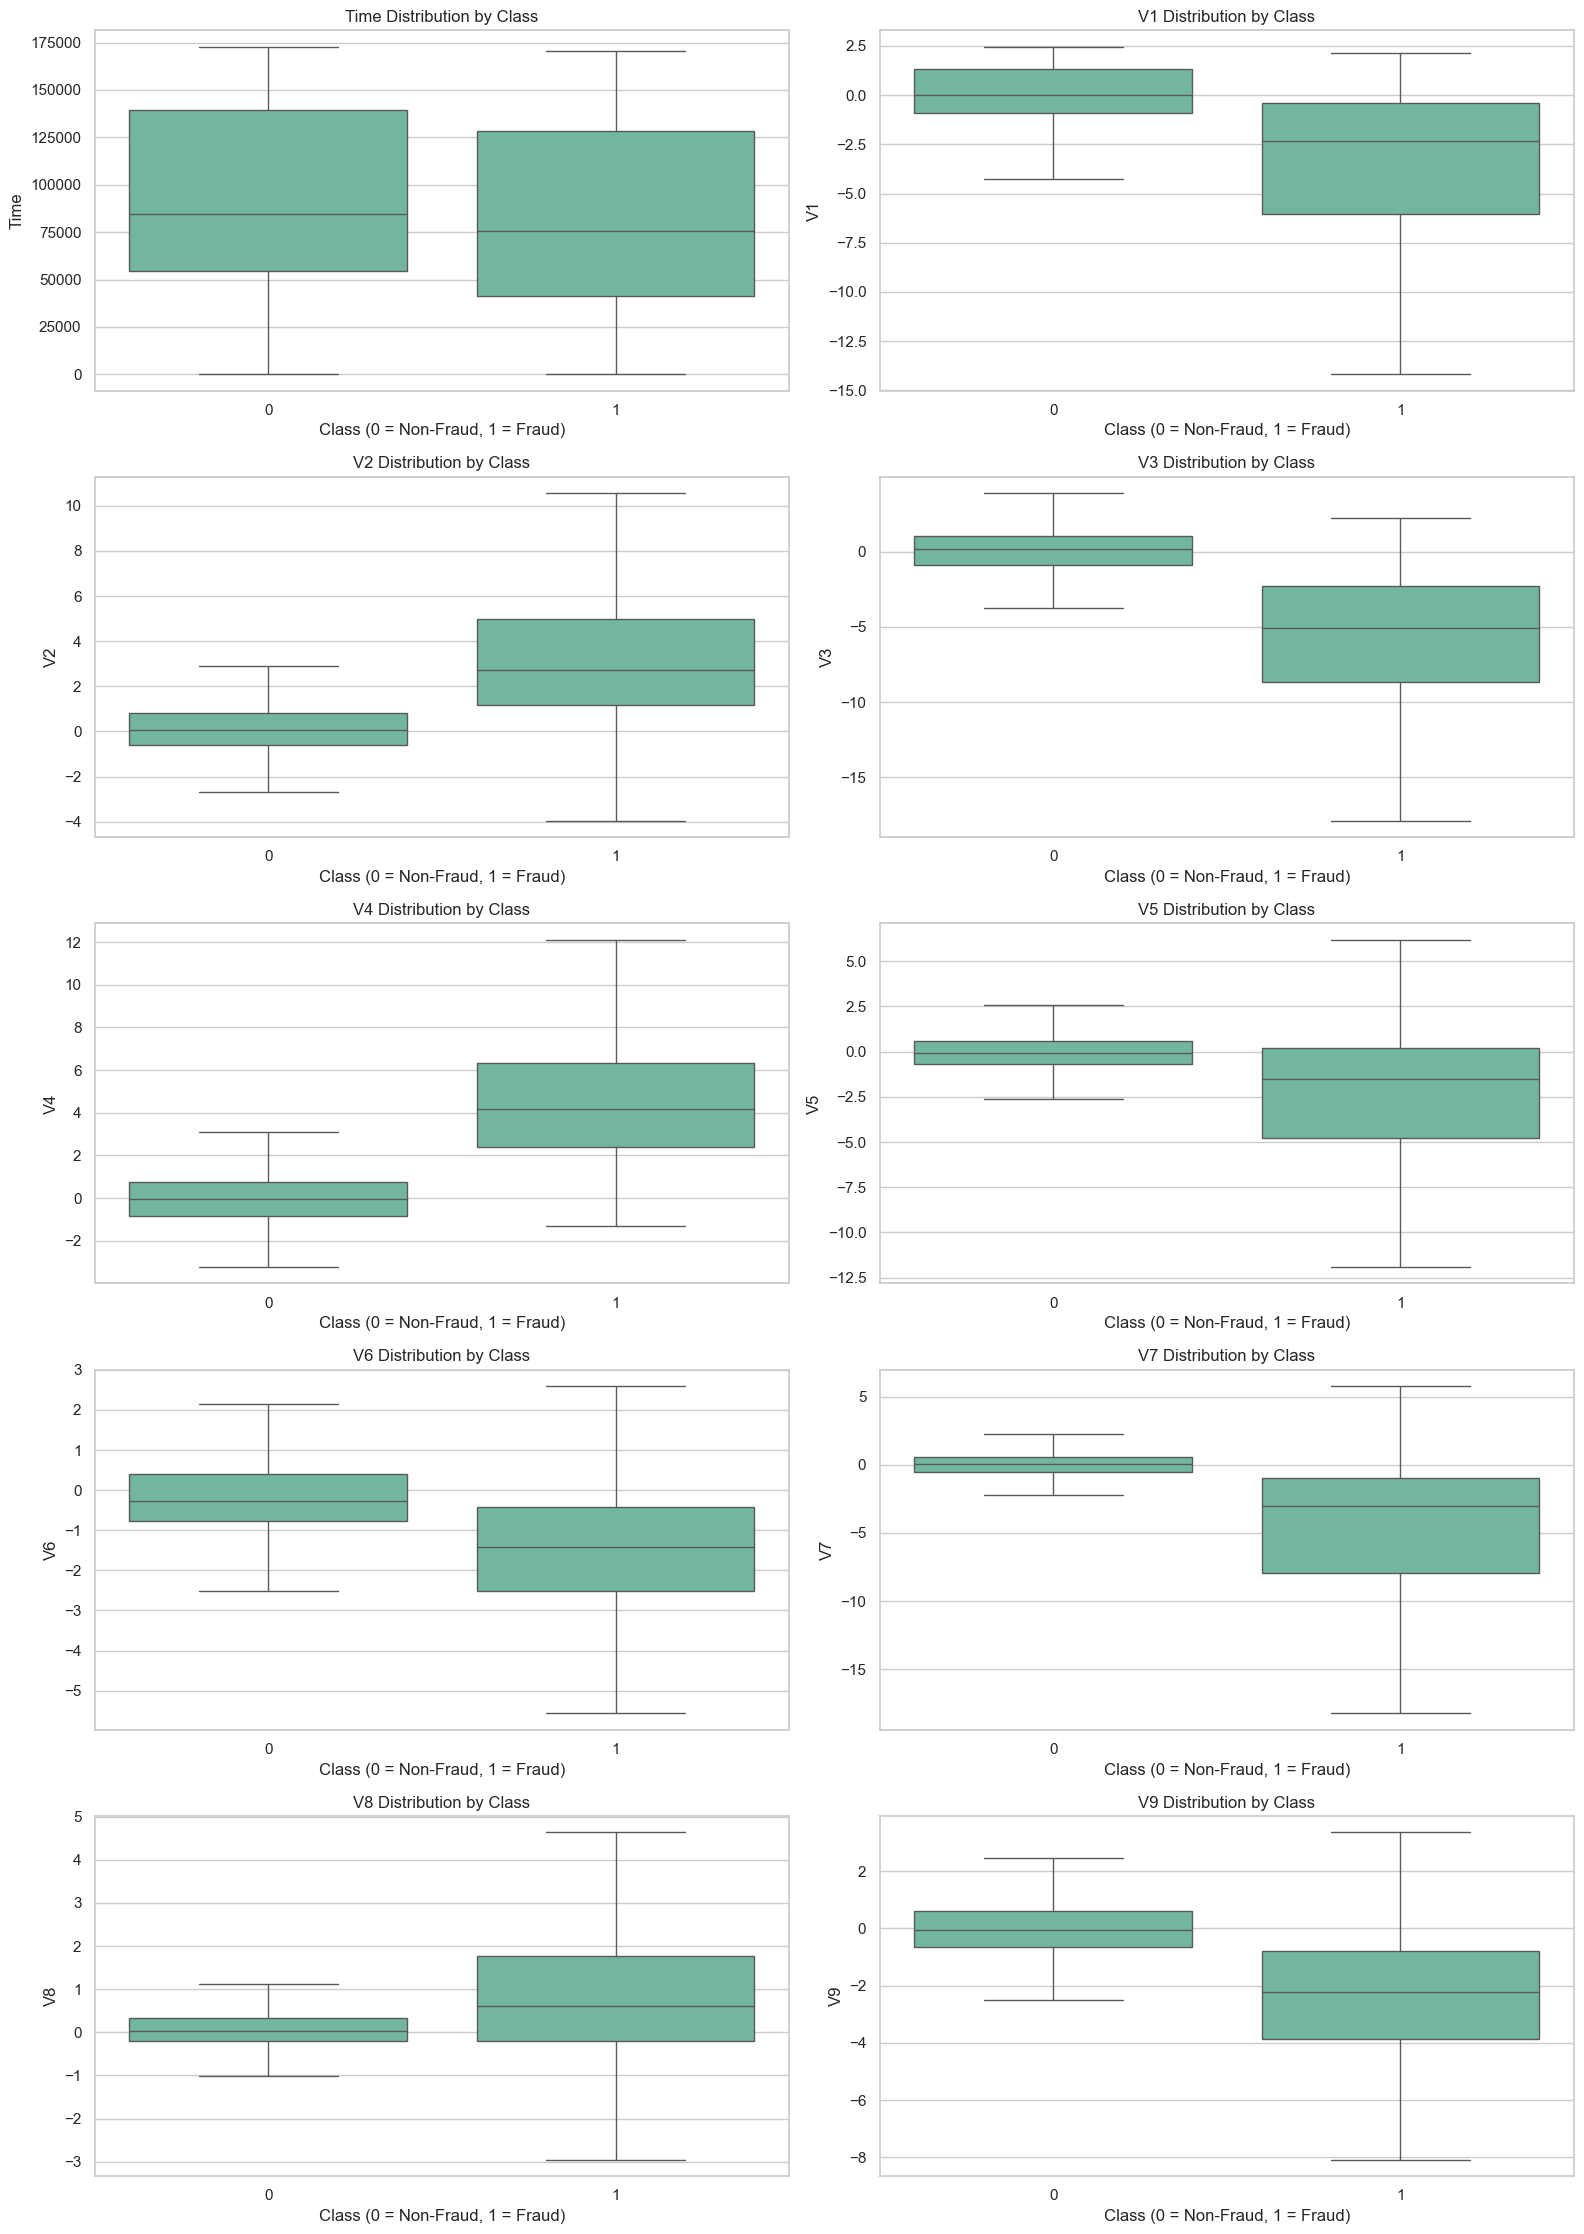

Saved: C:\Users\Nadimul haque\Desktop\Final dissertation datasets\Appendix_C1_Feature_Distributions_Page_1.png


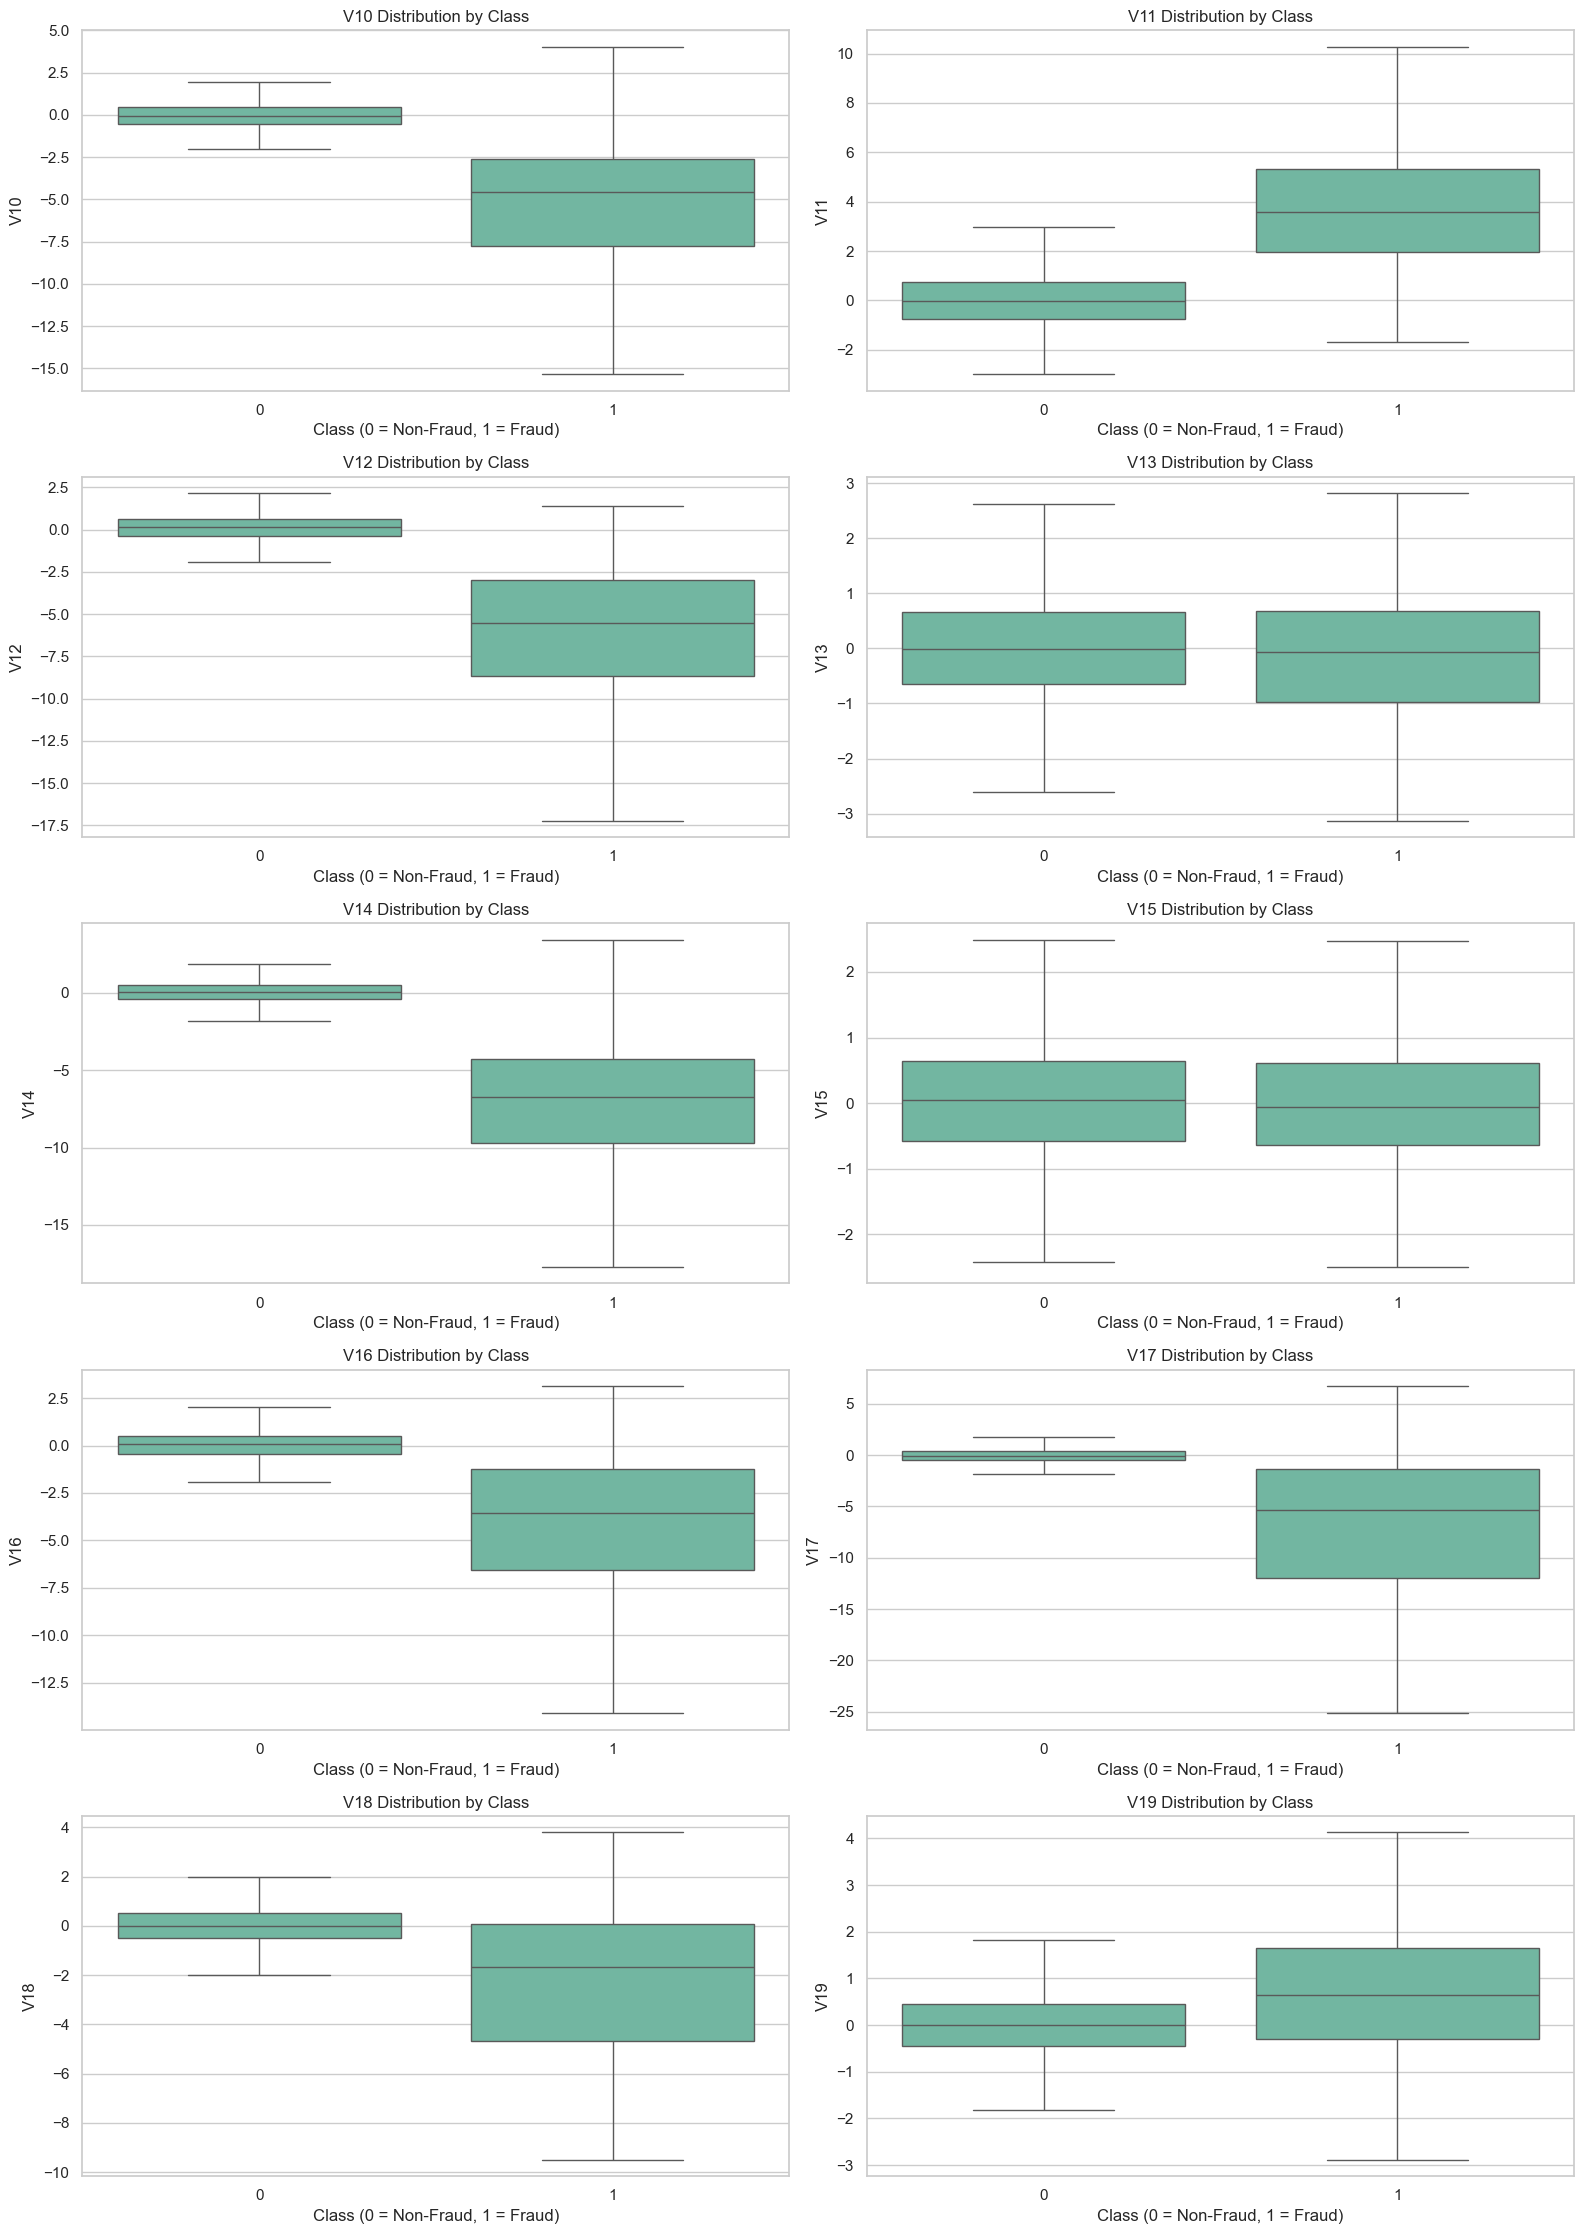

Saved: C:\Users\Nadimul haque\Desktop\Final dissertation datasets\Appendix_C1_Feature_Distributions_Page_2.png


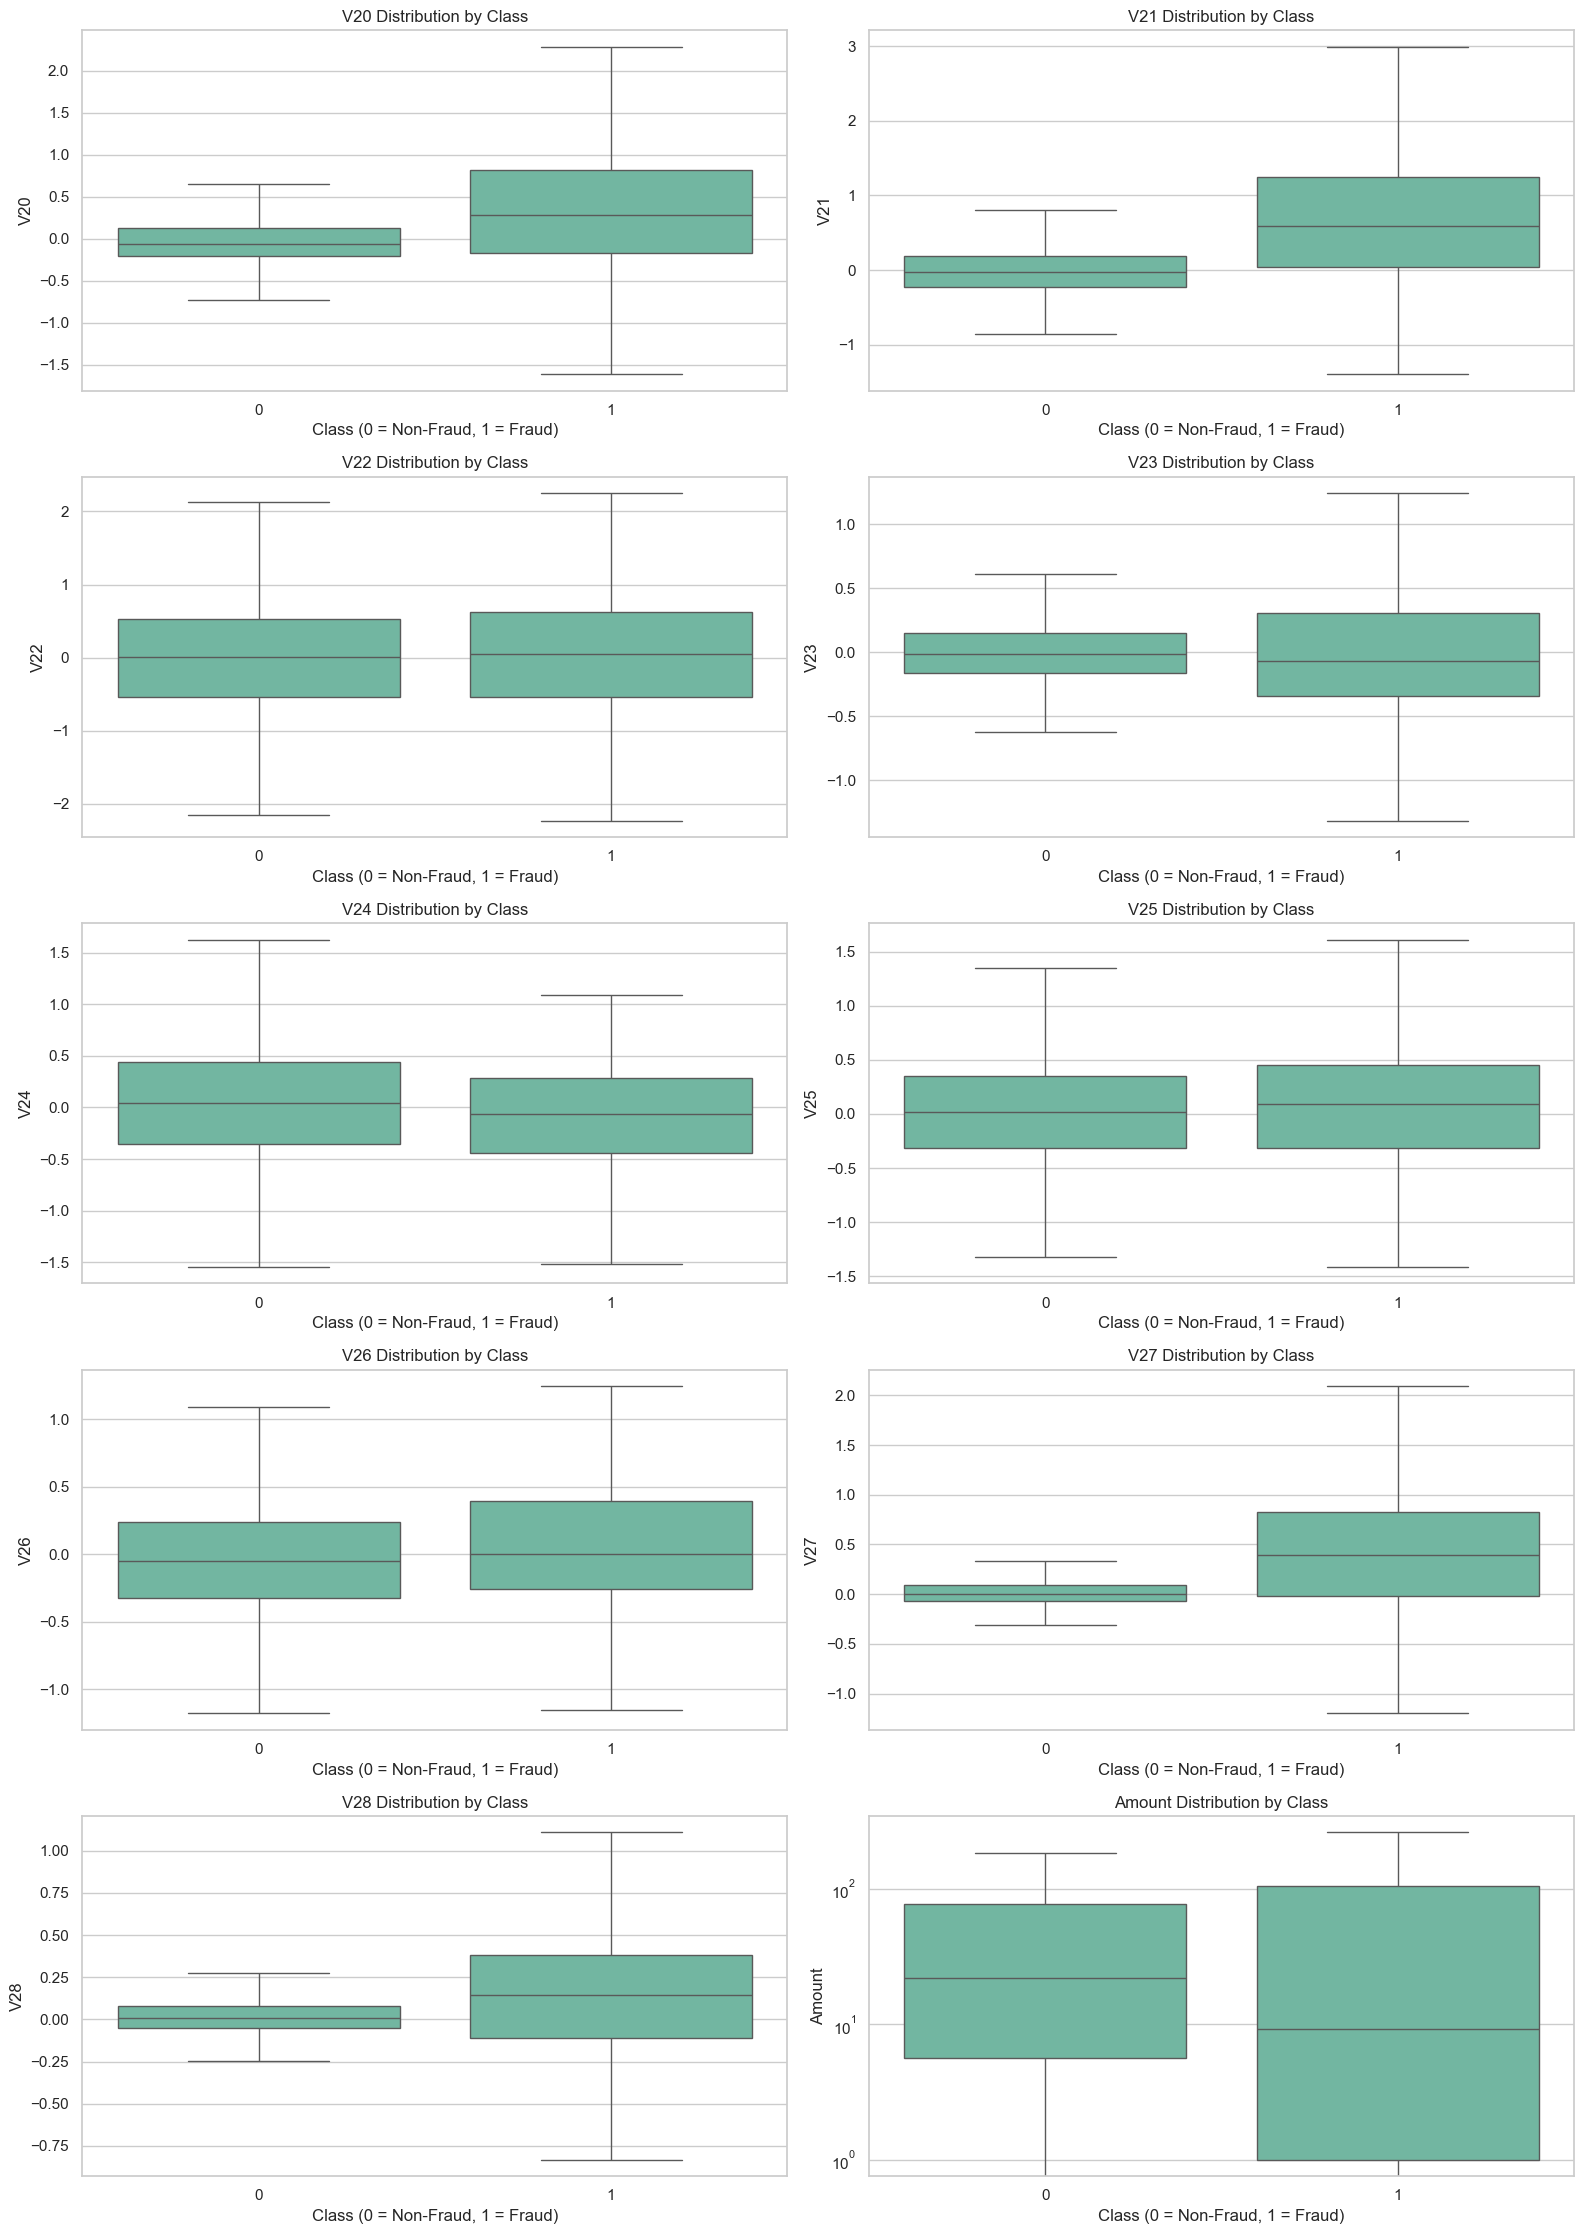

Saved: C:\Users\Nadimul haque\Desktop\Final dissertation datasets\Appendix_C1_Feature_Distributions_Page_3.png


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np, math, os

sns.set(style='whitegrid', palette='Set2')

features = [c for c in df.columns if c != 'Class']
plots_per_row = 2
per_page = 10  
chunks = [features[i:i+per_page] for i in range(0, len(features), per_page)]

out_dir = r"C:\Users\Nadimul haque\Desktop\Final dissertation datasets"
os.makedirs(out_dir, exist_ok=True)

for page, feats in enumerate(chunks, start=1):
    rows = math.ceil(len(feats)/plots_per_row)
    fig, axes = plt.subplots(rows, plots_per_row, figsize=(16, 4.5*rows))
    axes = axes.flatten()

    for i, feat in enumerate(feats):
        sns.boxplot(
            data=df, x='Class', y=feat, ax=axes[i],
            showfliers=False  
        )
        axes[i].set_title(f'{feat} Distribution by Class', fontsize=12)
        axes[i].set_xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
        axes[i].set_ylabel(feat)
        if feat.lower() == 'amount':
            axes[i].set_yscale('log')  

    for j in range(len(feats), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    save_path = os.path.join(out_dir, f"Appendix_C1_Feature_Distributions_Page_{page}.png")
    fig.savefig(save_path, dpi=600, bbox_inches="tight")
    plt.show()
    print(f"Saved: {save_path}")

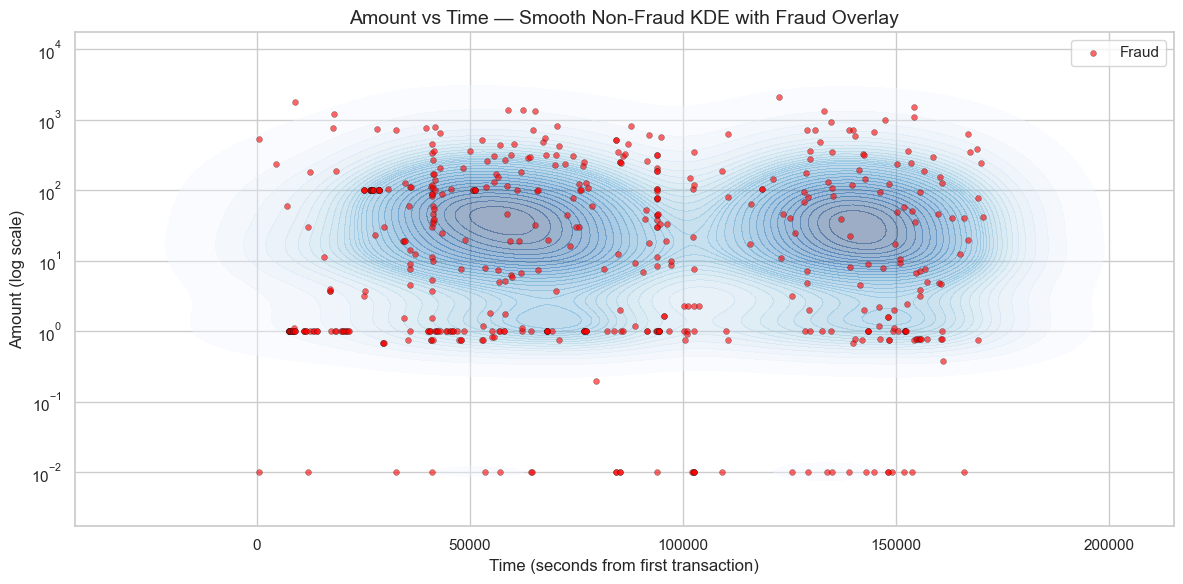

 Saved clean figure at: C:\Users\Nadimul haque\Desktop\Final dissertation datasets\Appendix_C2_Amount_vs_Time_KDE_Clean.png


In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\Nadimul haque\Desktop\Final dissertation datasets\creditcard.csv")

sns.set(style="whitegrid")

# Save path
SAVE_PATH = r"C:\Users\Nadimul haque\Desktop\Final dissertation datasets\Appendix_C2_Amount_vs_Time_KDE_Clean.png"
os.makedirs(os.path.dirname(SAVE_PATH), exist_ok=True)

# Split into fraud and non-fraud
fraud = df[df["Class"] == 1]
nonfraud = df[df["Class"] == 0]

# Clip extremes for clarity
amax = np.quantile(nonfraud["Amount"], 0.999)
tmax = np.quantile(nonfraud["Time"], 0.999)

nf = nonfraud.copy()
nf["Amount"] = np.clip(nf["Amount"], 1e-2, amax)
nf["Time"]   = np.clip(nf["Time"],   0,    tmax)

fr = fraud.copy()
fr["Amount"] = np.clip(fr["Amount"], 1e-2, amax)
fr["Time"]   = np.clip(fr["Time"],   0,    tmax)

# Sample fraud points if too many (for less clutter)
if len(fr) > 500:
    fr = fr.sample(500, random_state=42)

# Plot
plt.figure(figsize=(12, 6))

# KDE background for non-fraud (light & smooth)
sns.kdeplot(
    data=nf, x="Time", y="Amount",
    fill=True, levels=30, thresh=0.02, cmap="Blues",
    alpha=0.4, log_scale=(False, True), bw_method=0.3
)

# Fraud points
plt.scatter(fr["Time"], fr["Amount"], s=18, c="red", alpha=0.6, edgecolor="k", linewidth=0.3, label="Fraud")

# Final touches
plt.yscale("log")
plt.xlabel("Time (seconds from first transaction)")
plt.ylabel("Amount (log scale)")
plt.title("Amount vs Time — Smooth Non-Fraud KDE with Fraud Overlay", fontsize=14)
plt.legend()
plt.tight_layout()

# Save high-res
plt.savefig(SAVE_PATH, dpi=600, bbox_inches="tight")
plt.show()

print(f" Saved clean figure at: {SAVE_PATH}")


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# 1. Load your dataset
df = pd.read_csv(r"C:\Users\Nadimul haque\Desktop\Final dissertation datasets\creditcard.csv")

# 2. Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# 3. Original train-test split (70/30)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 4. Apply Random Undersampling on training set only
rus = RandomUnderSampler(random_state=42)
X_train_downsampled, y_train_downsampled = rus.fit_resample(X_train_orig, y_train_orig)

# 5. Print to verify
print("Original train set size:", X_train_orig.shape)
print("Downsampled train set size:", X_train_downsampled.shape)
print("Original test set size:", X_test_orig.shape)
print("\nClass distribution in downsampled training set:")
print(y_train_downsampled.value_counts())


Original train set size: (199364, 30)
Downsampled train set size: (688, 30)
Original test set size: (85443, 30)

Class distribution in downsampled training set:
Class
0    344
1    344
Name: count, dtype: int64


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters (Random Forest): {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Threshold (Random Forest): 0.89
F1 Score at Best Threshold: 0.7744

Final Random Forest Performance at Tuned Threshold:
Accuracy  : 0.9992
Precision : 0.7718
Recall    : 0.7770
F1 Score  : 0.7744
ROC AUC   : 0.9719


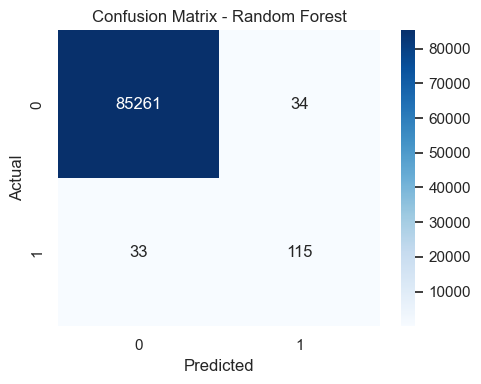

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import numpy as np

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

rf_base = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(
    rf_base,
    param_grid_rf,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train_downsampled, y_train_downsampled)
best_rf = grid_search_rf.best_estimator_

print("Best Hyperparameters (Random Forest):", grid_search_rf.best_params_)


y_probs_rf = best_rf.predict_proba(X_test_orig)[:, 1]

# Threshold tuning
thresholds = np.arange(0.01, 0.90, 0.01)
best_f1, best_threshold_rf = 0, 0.5

for thresh in thresholds:
    y_pred_thresh = (y_probs_rf >= thresh).astype(int)
    f1 = f1_score(y_test_orig, y_pred_thresh)
    if f1 > best_f1:
        best_f1, best_threshold_rf = f1, thresh

print(f"Best Threshold (Random Forest): {best_threshold_rf:.2f}")
print(f"F1 Score at Best Threshold: {best_f1:.4f}")


y_pred_final_rf = (y_probs_rf >= best_threshold_rf).astype(int)

# Metrics
print("\nFinal Random Forest Performance at Tuned Threshold:")
print(f"Accuracy  : {accuracy_score(y_test_orig, y_pred_final_rf):.4f}")
print(f"Precision : {precision_score(y_test_orig, y_pred_final_rf):.4f}")
print(f"Recall    : {recall_score(y_test_orig, y_pred_final_rf):.4f}")
print(f"F1 Score  : {f1_score(y_test_orig, y_pred_final_rf):.4f}")
print(f"ROC AUC   : {roc_auc_score(y_test_orig, y_probs_rf):.4f}")

cm = confusion_matrix(y_test_orig, y_pred_final_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.savefig("confusion_matrix_Random_Forest.png", dpi=300)
plt.show()


joblib.dump(best_rf, 'final_random_forest_model.pkl')
with open('best_threshold_rf.txt', 'w') as f:
    f.write(str(best_threshold_rf))


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\Nadimul haque\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:45:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Hyperparameters (XGBoost): {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 0.8}
Best Threshold (XGBoost): 0.89
F1 Score at Best Threshold: 0.2512

Final XGBoost Performance at Tuned Threshold:
Accuracy  : 0.9911
Precision : 0.1472
Recall    : 0.8581
F1 Score  : 0.2512
ROC AUC   : 0.9751


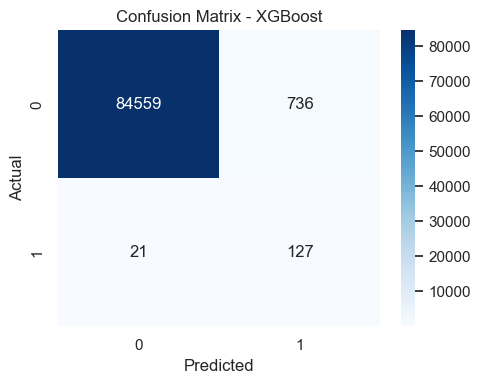

In [39]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'scale_pos_weight': [1, 10, 50],  # important for imbalance
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_base = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    use_label_encoder=False
)

grid_search_xgb = GridSearchCV(
    xgb_base,
    param_grid_xgb,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)


grid_search_xgb.fit(X_train_downsampled, y_train_downsampled)
best_xgb = grid_search_xgb.best_estimator_

print("Best Hyperparameters (XGBoost):", grid_search_xgb.best_params_)


y_probs_xgb = best_xgb.predict_proba(X_test_orig)[:, 1]
thresholds = np.arange(0.01, 0.90, 0.01)
best_f1, best_threshold_xgb = 0, 0.5

for thresh in thresholds:
    y_pred_thresh = (y_probs_xgb >= thresh).astype(int)
    f1 = f1_score(y_test_orig, y_pred_thresh)
    if f1 > best_f1:
        best_f1, best_threshold_xgb = f1, thresh

print(f"Best Threshold (XGBoost): {best_threshold_xgb:.2f}")
print(f"F1 Score at Best Threshold: {best_f1:.4f}")


y_pred_final_xgb = (y_probs_xgb >= best_threshold_xgb).astype(int)

print("\nFinal XGBoost Performance at Tuned Threshold:")
print(f"Accuracy  : {accuracy_score(y_test_orig, y_pred_final_xgb):.4f}")
print(f"Precision : {precision_score(y_test_orig, y_pred_final_xgb):.4f}")
print(f"Recall    : {recall_score(y_test_orig, y_pred_final_xgb):.4f}")
print(f"F1 Score  : {f1_score(y_test_orig, y_pred_final_xgb):.4f}")
print(f"ROC AUC   : {roc_auc_score(y_test_orig, y_probs_xgb):.4f}")


cm = confusion_matrix(y_test_orig, y_pred_final_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.tight_layout()
plt.savefig("confusion_matrix_XGBoost.png", dpi=300)
plt.show()


joblib.dump(best_xgb, 'final_xgboost_model.pkl')
with open('best_threshold_xgb.txt', 'w') as f:
    f.write(str(best_threshold_xgb))


In [43]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Define reduced parameter grid for faster tuning
param_grid_lgbm = {
    'n_estimators': [100, 200],
    'max_depth': [-1, 10],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [31, 50],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'class_weight': ['balanced']
}

# Initialize base LightGBM model
lgbm_base = LGBMClassifier(random_state=42)

# GridSearchCV setup
grid_search_lgbm = GridSearchCV(
    lgbm_base,
    param_grid_lgbm,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit on downsampled training data
grid_search_lgbm.fit(X_train_downsampled, y_train_downsampled)
best_lgbm = grid_search_lgbm.best_estimator_

print("Best Hyperparameters (LightGBM):", grid_search_lgbm.best_params_)

# ---- Threshold tuning ----
y_probs_lgbm = best_lgbm.predict_proba(X_test_orig)[:, 1]
thresholds = np.arange(0.01, 0.90, 0.01)
best_f1 = 0
best_threshold_lgbm = 0.5

for thresh in thresholds:
    y_pred_thresh = (y_probs_lgbm >= thresh).astype(int)
    f1 = f1_score(y_test_orig, y_pred_thresh)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold_lgbm = thresh

print(f"Best Threshold (LightGBM): {best_threshold_lgbm:.2f}")
print(f"F1 Score at Best Threshold: {best_f1:.4f}")

# Final evaluation at tuned threshold
y_pred_final_lgbm = (y_probs_lgbm >= best_threshold_lgbm).astype(int)
print("\nFinal LightGBM Performance at Tuned Threshold:")
print(f"Accuracy  : {accuracy_score(y_test_orig, y_pred_final_lgbm):.4f}")
print(f"Precision : {precision_score(y_test_orig, y_pred_final_lgbm):.4f}")
print(f"Recall    : {recall_score(y_test_orig, y_pred_final_lgbm):.4f}")
print(f"F1 Score  : {f1_score(y_test_orig, y_pred_final_lgbm):.4f}")
print(f"ROC AUC   : {roc_auc_score(y_test_orig, y_probs_lgbm):.4f}")



Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Info] Number of positive: 344, number of negative: 344
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6882
[LightGBM] [Info] Number of data points in the train set: 688, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

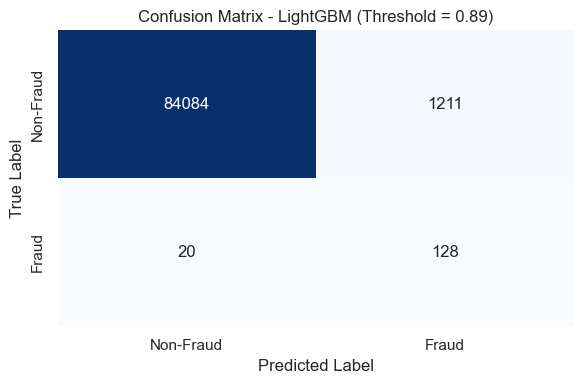

 Confusion matrix saved as 'confusion_matrix_LightGBM.png'
 Model saved as 'final_lightgbm_model.pkl'


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import joblib

# Predict with tuned threshold
y_probs_lgbm = best_lgbm.predict_proba(X_test_orig)[:, 1]
y_pred_lgbm_final = (y_probs_lgbm >= 0.89).astype(int)

# Confusion matrix
cm_lgbm = confusion_matrix(y_test_orig, y_pred_lgbm_final)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lgbm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Non-Fraud", "Fraud"],
            yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - LightGBM (Threshold = 0.89)")
plt.tight_layout()

# Save & show
plt.savefig("confusion_matrix_LightGBM.png", dpi=300)
plt.show()

# Save model
joblib.dump(best_lgbm, "final_lightgbm_model.pkl")

print(" Confusion matrix saved as 'confusion_matrix_LightGBM.png'")
print(" Model saved as 'final_lightgbm_model.pkl'")


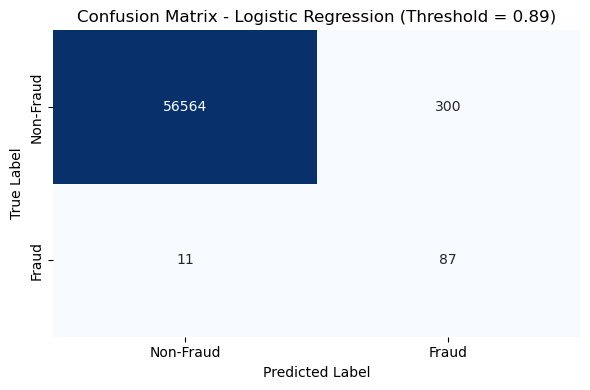

Confusion matrix saved as 'confusion_matrix_Logistic_Regression.png'
Model saved as 'final_logistic_regression_model.pkl'


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import joblib

# --- Load dataset ---
df = pd.read_csv(r"C:\Users\Nadimul haque\Desktop\Final dissertation datasets\creditcard.csv")

# --- Features and target ---
X = df.drop("Class", axis=1)
y = df["Class"]

# --- Train-test split (same random_state as dissertation) ---
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Train tuned Logistic Regression model ---
best_logreg = LogisticRegression(
    solver='liblinear',   # works well for small/medium datasets
    C=0.1,                # replace with your tuned C value if different
    max_iter=1000,
    class_weight='balanced'
)
best_logreg.fit(X_train_orig, y_train_orig)

# --- Predict with tuned threshold ---
y_probs_logreg = best_logreg.predict_proba(X_test_orig)[:, 1]
y_pred_logreg_final = (y_probs_logreg >= 0.89).astype(int)  # threshold from tuning

# --- Confusion matrix ---
cm_logreg = confusion_matrix(y_test_orig, y_pred_logreg_final)

# --- Plot ---
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Non-Fraud", "Fraud"],
            yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression (Threshold = 0.89)")
plt.tight_layout()

# --- Save & show ---
plt.savefig("confusion_matrix_Logistic_Regression.png", dpi=300)
plt.show()

# --- Save model ---
joblib.dump(best_logreg, "final_logistic_regression_model.pkl")

print("Confusion matrix saved as 'confusion_matrix_Logistic_Regression.png'")
print("Model saved as 'final_logistic_regression_model.pkl'")
